In [1]:
#Importing the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import datetime as dt

In [3]:
#supress scientific notation of values
pd.options.display.float_format = '{:.2f}'.format
#increasing max number of columns and rows  displayed with pandas.
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

In [4]:
#Loading data set file in to data frame.
file_path = 'loan.csv'
#using low memory flag to load columns with multiple data types.
data = pd.read_csv(file_path, low_memory=False)
data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000          4975.00   36 months   
1  1077430    1314167       2500         2500          2500.00   60 months   
2  1077175    1313524       2400         2400          2400.00   36 months   
3  1076863    1277178      10000        10000         10000.00   36 months   
4  1075358    1311748       3000         3000          3000.00   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT    24000.00            Verified  Dec-11   Fully Paid   
1           RENT    30000.00     Source Verified  Dec-11  Charged Off   
2           RENT    12252.00        Not Verified  Dec-11   Fully Paid   
3           RENT    49200.00     Source Verified  Dec-11   Fully Paid   
4           RENT    80000.00     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state   dti  delinq_2yrs  \
0              Computer    860xx         AZ 27.65            0   
1                  bike    309xx         GA  1.00            0   
2  real estate business    606xx         IL  8.72            0   
3              personel    917xx         CA 20.00            0   
4              Personal    972xx         OR 17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                   35.00   
4           Jan-96               0                   38.00   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   f       0.00           0.00      5863.16          5833.84   
1                   f       0.00           0.00      1008.71          1008.71   
2                   f       0.00           0.00      3005.67          3005.67   
3                   f       0.00           0.00     12231.89         12231.89   
4                   f     524.06         524.06      3513.33          3513.33   

   total_rec_prncp  total_rec_int  tota

In [5]:
#shape of data frame
data.shape

(39717, 111)

In [6]:
#Lower rows of data frame
data.tail()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
39712  92187      92174       2500         2500          1075.00   36 months   
39713  90665      90607       8500         8500           875.00   36 months   
39714  90395      90390       5000         5000          1325.00   36 months   
39715  90376      89243       5000         5000           650.00   36 months   
39716  87023      86999       7500         7500           800.00   36 months   

      int_rate  installment grade sub_grade                   emp_title  \
39712    8.07%        78.42     A        A4             FiSite Research   
39713   10.28%       275.38     C        C1  Squarewave Solutions, Ltd.   
39714    8.07%       156.84     A        A4                         NaN   
39715    7.43%       155.38     A        A2                         NaN   
39716   13.75%       255.43     E        E2            Evergreen Center   

      emp_length home_ownership  annual_inc verification_status issue_d  \
39712    4 years       MORTGAGE   110000.00        Not Verified  Jul-07   
39713    3 years           RENT    18000.00        Not Verified  Jul-07   
39714   < 1 year       MORTGAGE   100000.00        Not Verified  Jul-07   
39715   < 1 year       MORTGAGE   200000.00        Not Verified  Jul-07   
39716   < 1 year            OWN    22000.00        Not Verified  Jun-07   

      loan_status pymnt_plan  \
39712  Fully Paid          n   
39713  Fully Paid          n   
39714  Fully Paid          n   
39715  Fully Paid          n   
39716  Fully Paid          n   

                                                     url  \
39712  https://lendingclub.com/browse/loanDetail.acti...   
39713  https://lendingclub.com/browse/loanDetail.acti...   
39714  https://lendingclub.com/browse/loanDetail.acti...   
39715  https://lendingclub.com/browse/loanDetail.acti...   
39716  https://lendingclub.com/browse/loanDetail.acti...   

                                                    desc             purpose  \
39712  Our current gutter system on our home is old a...    home_improvement   
39713  The rate of interest and fees incurred by carr...         credit_card   
39714                                                NaN  debt_consolidation   
39715                                                NaN               other   
39716  I plan to consolidate over $7,000 of debt: a c...  debt_consolidation   

                           title zip_code addr_state   dti  delinq_2yrs  \
39712           Home Improvement    802xx         CO 11.33            0   
39713  Retiring credit card debt    274xx         NC  6.40            1   
39714     MBA Loan Consolidation    017xx         MA  2.30            0   
39715                   JAL Loan    208xx         MD  3.72            0   
39716         Consolidation Loan    027xx         MA 14.29            1   

      earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
39712           Nov-90               0                    0.00   
39713           Dec-86               1                    5.00   
39714           Oct-98               0                    0.00   
39715           Nov-88               0                    0.00   
39716           Oct-03               0                   11.00   

       mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  \
39712                    0.00        13        0       7274     13.10%   
39713                    0.00         6        0       8847     26.90%   
39714                    0.00        11        0       9698     19.40%   
39715                    0.00        17        0      85607      0.70%   
39716                    0.00         7        0       4175     51.50%   

       total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
39712         40                   f       0.00           0.00      2822.97   
39713          9                   f       0.00           0.00      9913.49   
39714         20                   f       0.00           0.00

# Basic information about the data

In [7]:
#Basic information about the data
## Number of rows and columns
print('Number of Columns:',data.shape[1])
print('Number of Rows:',data.shape[0])
## Number of missing values
print('Number of missing values:',data.isnull().sum().sum())
## Number of unique values
print('Number of unique values:',data.nunique().sum())
## Number of duplicates
print('Number of duplicates:',data.duplicated().sum())

Number of Columns: 111
Number of Rows: 39717
Number of missing values: 2263364
Number of unique values: 416801
Number of duplicates: 0


In [8]:
# Basic infomation about the dataframe
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [9]:
# Columns in the dataframe
print(data.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


In [10]:
# Describing the dataframe
print(data.describe())

              id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
count   39717.00   39717.00   39717.00     39717.00         39717.00   
mean   683131.91  850463.56   11219.44     10947.71         10397.45   
std    210694.13  265678.31    7456.67      7187.24          7128.45   
min     54734.00   70699.00     500.00       500.00             0.00   
25%    516221.00  666780.00    5500.00      5400.00          5000.00   
50%    665665.00  850812.00   10000.00      9600.00          8975.00   
75%    837755.00 1047339.00   15000.00     15000.00         14400.00   
max   1077501.00 1314167.00   35000.00     35000.00         35000.00   

       installment  annual_inc      dti  delinq_2yrs  inq_last_6mths  \
count     39717.00    39717.00 39717.00     39717.00        39717.00   
mean        324.56    68968.93    13.32         0.15            0.87   
std         208.87    63793.77     6.68         0.49            1.07   
min          15.69     4000.00     0.00         0.00           

# Cleaning the large null value columns and rows

In [11]:
## Checking for missing values
print(data.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [12]:
# Checking column with large amount of null values(in percentage) and irrelevant columns
Null_perc = ((data.isnull().sum()/data.shape[0]*100).round(2).sort_values(ascending=False))

print(Null_perc)

verification_status_joint   100.00
annual_inc_joint            100.00
mo_sin_old_rev_tl_op        100.00
mo_sin_old_il_acct          100.00
bc_util                     100.00
                             ...  
delinq_amnt                   0.00
policy_code                   0.00
earliest_cr_line              0.00
delinq_2yrs                   0.00
id                            0.00
Length: 111, dtype: float64


In [13]:
Null_perc[Null_perc>30]

verification_status_joint        100.00
annual_inc_joint                 100.00
mo_sin_old_rev_tl_op             100.00
mo_sin_old_il_acct               100.00
bc_util                          100.00
bc_open_to_buy                   100.00
avg_cur_bal                      100.00
acc_open_past_24mths             100.00
inq_last_12m                     100.00
total_cu_tl                      100.00
inq_fi                           100.00
total_rev_hi_lim                 100.00
all_util                         100.00
max_bal_bc                       100.00
open_rv_24m                      100.00
open_rv_12m                      100.00
il_util                          100.00
total_bal_il                     100.00
mths_since_rcnt_il               100.00
open_il_24m                      100.00
open_il_12m                      100.00
open_il_6m                       100.00
open_acc_6m                      100.00
tot_cur_bal                      100.00
tot_coll_amt                     100.00


In [14]:
Null_perc[ Null_perc > 30 ].index

Index(['verification_status_joint', 'annual_inc_joint', 'mo_sin_old_rev_tl_op',
       'mo_sin_old_il_acct', 'bc_util', 'bc_open_to_buy', 'avg_cur_bal',
       'acc_open_past_24mths', 'inq_last_12m', 'total_cu_tl', 'inq_fi',
       'total_rev_hi_lim', 'all_util', 'max_bal_bc', 'open_rv_24m',
       'open_rv_12m', 'il_util', 'total_bal_il', 'mths_since_rcnt_il',
       'open_il_24m', 'open_il_12m', 'open_il_6m', 'open_acc_6m',
       'tot_cur_bal', 'tot_coll_amt', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'num_rev_tl_bal_gt_0', 'total_bc_limit',
       'total_bal_ex_mort', 'tot_hi_cred_lim', 'percent_bc_gt_75',
       'pct_tl_nvr_dlq', 'num_tl_op_past_12m', 'num_tl_90g_dpd_24m',
       'num_tl_30dpd', 'num_tl_120dpd_2m', 'num_sats', 'num_rev_accts',
       'mths_since_recent_bc', 'num_op_rev_tl', 'num_il_tl', 'num_bc_tl',
       'num_bc_sats', 'num_actv_rev_tl', 'num_actv_bc_tl',
       'num_accts_ever_120_pd', 'mths_since_recent_revol_delinq',
       'mths_since_rec

In [15]:
#Removing columns which has more than 30% null values in it.
data.drop(Null_perc[ Null_perc > 30 ].index, axis=1, inplace=True)

In [16]:
## Number of rows and columns
print('Number of Columns:',data.shape[1])
print('Number of Rows:',data.shape[0])
## Number of missing values
print('Number of missing values:',data.isnull().sum().sum())
## Number of unique values
print('Number of unique values:',data.nunique().sum())
## Number of duplicates
print('Number of duplicates:',data.duplicated().sum())

Number of Columns: 53
Number of Rows: 39717
Number of missing values: 4516
Number of unique values: 390066
Number of duplicates: 0


In [17]:
# Checking for missing values across the rows
print((data.isnull().sum(axis=1)).max())

5


# Columns having unque value

In [18]:
data.nunique().sort_values().head(15)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
initial_list_status           1
pymnt_plan                    1
term                          2
pub_rec_bankruptcies          3
verification_status           3
loan_status                   3
pub_rec                       5
home_ownership                5
dtype: int64

In [19]:
data['home_ownership'].unique()


array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [20]:
data['tax_liens'].unique()

array([ 0., nan])

In [21]:
data['pymnt_plan'].unique()

array(['n'], dtype=object)

'tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan' columns have only one unique value in all the rows, which will not give any usefull info for us. so, lets remove them.

In [22]:
data.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [24]:
#Finding number of unique values, printing high unique valued columns
data.nunique().sort_values(ascending=False)

id                         39717
url                        39717
member_id                  39717
total_pymnt                37850
total_pymnt_inv            37518
total_rec_int              35148
last_pymnt_amnt            34930
emp_title                  28820
revol_bal                  21711
title                      19615
installment                15383
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
out_prncp                   1137
revol_util                  1089
funded_amnt                 1041
loan_amnt                    885
zip_code                     823
earliest_cr_line             526
int_rate                     371
last_credit_pull_d           106
last_pymnt_d                 101
total_acc                     82
issue_d                       55
addr_state

# Dropping the columns which are not important

Loan Status Column has 3 distict values out of them we need only Fully Paid and Charged Off. So, we will remove the rows with Current values in loan status.

In [25]:
#Removing current loan status rows
data = data[data.loan_status != 'Current']

In [26]:
df1= data[['id','url','member_id']]

In [27]:
df1.head()

id                                                url  member_id
0  1077501  https://lendingclub.com/browse/loanDetail.acti...    1296599
1  1077430  https://lendingclub.com/browse/loanDetail.acti...    1314167
2  1077175  https://lendingclub.com/browse/loanDetail.acti...    1313524
3  1076863  https://lendingclub.com/browse/loanDetail.acti...    1277178
5  1075269  https://lendingclub.com/browse/loanDetail.acti...    1311441

URL and memberid have no influence on loan approval or identifying the risky applicant. So we can drop these.

In [28]:
data.drop(['url','member_id'], axis=1, inplace=True)

In [29]:

data.shape

(38577, 42)

In [30]:
df2 = data[['emp_title','title']]

In [31]:
df2.head()

emp_title                                  title
0                   NaN                               Computer
1                 Ryder                                   bike
2                   NaN                   real estate business
3   AIR RESOURCES BOARD                               personel
5  Veolia Transportaton  My wedding loan I promise to pay back

In [32]:
data.drop(['emp_title','title'], axis=1, inplace=True)

In [33]:
data.shape

(38577, 40)

In [34]:
# Removing zip_code as it is a masked data and cannot be used as input for the analysis
data=data.drop(['zip_code'],axis=1)

In [35]:
data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

total_rec_int, total_rec_prncp, total_rec_late_fee, recoveries, collection_recovery_fee, last_credit_pull_d, last_pymnt_d, out_prncp, out_prncp_inv variables are valid for barrowers who already took loan. As we are only interested only in loan application details these columns can be removed. recoveries, collection_recovery_fee columns are only valid for charged off loans. Will removed these colomns

In [36]:
data.drop(['total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d'], axis=1, inplace=True)
data.drop(['out_prncp', 'out_prncp_inv'], axis=1, inplace=True)

In [37]:
data.shape

(38577, 30)

In [38]:
data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'last_pymnt_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')

In [39]:

#Checking unique values for term column
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [40]:
#Stripping empty space in values in term
data['term'] = data.term.str.strip()
data.term.unique()

array(['36 months', '60 months'], dtype=object)

In [41]:
data.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
last_pymnt_amnt         float64
pub_rec_bankruptcies    float64
dtype: object

In [42]:
data[['int_rate','revol_util']]

int_rate revol_util
0       10.65%     83.70%
1       15.27%      9.40%
2       15.96%     98.50%
3       13.49%        21%
5        7.90%     28.30%
...        ...        ...
39712    8.07%     13.10%
39713   10.28%     26.90%
39714    8.07%     19.40%
39715    7.43%      0.70%
39716   13.75%     51.50%

[38577 rows x 2 columns]

# Change of Data Type of different variable

int_rate and revol_util are having '%' symbol values and having data type of object. Let's remove % at the end and convert to float

In [43]:
#stripping '%' value
data['int_rate'] = data.int_rate.str.strip('%')
data['revol_util'] = data.revol_util.str.strip('%')

In [44]:
data['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: object

In [45]:
data['int_rate'].dtypes

dtype('O')

In [46]:
data['int_rate']= data['int_rate'].astype(float)

In [47]:
data['revol_util']= data['revol_util'].astype(float)

In [48]:
data['issue_d']

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 38577, dtype: object

In [49]:
data['earliest_cr_line']

0        Jan-85
1        Apr-99
2        Nov-01
3        Feb-96
5        Nov-04
          ...  
39712    Nov-90
39713    Dec-86
39714    Oct-98
39715    Nov-88
39716    Oct-03
Name: earliest_cr_line, Length: 38577, dtype: object

# Converting Date time

In [50]:
#converting to date type
data['issue_d'] = pd.to_datetime(data.issue_d, format='%b-%y')

In [51]:
data['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

In [52]:
data['earliest_cr_line'] = pd.to_datetime(data.earliest_cr_line, format='%b-%y')

In [53]:
data['earliest_cr_line']

0       1985-01-01
1       1999-04-01
2       2001-11-01
3       1996-02-01
5       2004-11-01
           ...    
39712   1990-11-01
39713   1986-12-01
39714   1998-10-01
39715   1988-11-01
39716   2003-10-01
Name: earliest_cr_line, Length: 38577, dtype: datetime64[ns]

In [54]:
data.dtypes

id                               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line        datetime64[ns]
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util                     float64
total_acc                

# Derived Variables

In [55]:
#issue_d column
data['issue_d_year'] = data.issue_d.dt.year
data['issue_d_month'] = data.issue_d.dt.strftime('%b')
data['issue_d_weekday'] = data.issue_d.dt.weekday
data['issue_d_weekday_name']= data.issue_d.dt.day_name()

In [56]:
#earliest_cr_line
data['earliest_cr_line_year'] = data.earliest_cr_line.dt.year
data['earliest_cr_line_month'] = data.earliest_cr_line.dt.strftime('%b')

In [57]:
data.head()

id  loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  \
0  1077501       5000         5000          4975.00  36 months     10.65   
1  1077430       2500         2500          2500.00  60 months     15.27   
2  1077175       2400         2400          2400.00  36 months     15.96   
3  1076863      10000        10000         10000.00  36 months     13.49   
5  1075269       5000         5000          5000.00  36 months      7.90   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT    24000.00   
1        59.83     C        C4   < 1 year           RENT    30000.00   
2        84.33     C        C5  10+ years           RENT    12252.00   
3       339.31     C        C1  10+ years           RENT    49200.00   
5       156.46     A        A4    3 years           RENT    36000.00   

  verification_status    issue_d  loan_status         purpose addr_state  \
0            Verified 2011-12-01   Fully Paid     credit_card         AZ   
1     Source Verified 2011-12-01  Charged Off             car         GA   
2        Not Verified 2011-12-01   Fully Paid  small_business         IL   
3     Source Verified 2011-12-01   Fully Paid           other         CA   
5     Source Verified 2011-12-01   Fully Paid         wedding         AZ   

    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  \
0 27.65            0       1985-01-01               1         3        0   
1  1.00            0       1999-04-01               5         3        0   
2  8.72            0       2001-11-01               2         2        0   
3 20.00            0       1996-02-01               1        10        0   
5 11.20            0       2004-11-01               3         9        0   

   revol_bal  revol_util  total_acc  total_pymnt  total_pymnt_inv  \
0      13648       83.70          9      5863.16          5833.84   
1       1687        9.40          4      1008.71          1008.71   
2       2956       98.50         10      3005.67          3005.67   
3       5598       21.00         37     12231.89         12231.89   
5       7963       28.30         12      5632.21          5632.21   

   last_pymnt_amnt  pub_rec_bankruptcies  issue_d_year issue_d_month  \
0           171.62                  0.00          2011           Dec   
1           119.66                  0.00          2011           Dec   
2           649.91                  0.00          2011           Dec   
3           357.48                  0.00          2011           Dec   
5           161.03                  0.00          2011           Dec   

   issue_d_weekday issue_d_weekday_name  earliest_cr_line_year  \
0                3             Thursday                   1985   
1                3             Thursday                   1999   
2                3             Thursday                   2001   
3                3             Thursday                   1996   
5                3             Thursday                   2004   

  earliest_cr_line_month  
0                    Jan  
1                    Apr  
2                    Nov  
3                    Feb  
5                    Nov

In [58]:
data.dtypes

id                                 int64
loan_amnt                          int64
funded_amnt                        int64
funded_amnt_inv                  float64
term                              object
int_rate                         float64
installment                      float64
grade                             object
sub_grade                         object
emp_length                        object
home_ownership                    object
annual_inc                       float64
verification_status               object
issue_d                   datetime64[ns]
loan_status                       object
purpose                           object
addr_state                        object
dti                              float64
delinq_2yrs                        int64
earliest_cr_line          datetime64[ns]
inq_last_6mths                     int64
open_acc                           int64
pub_rec                            int64
revol_bal                          int64
revol_util      

In [59]:
#data type conversion of year and weekday
data['issue_d_year'] = data['issue_d_year'].astype(object)
data['issue_d_weekday'] = data['issue_d_weekday'].astype(object)
data['earliest_cr_line_year'] = data['earliest_cr_line_year'].astype(object)

In [60]:
data.dtypes

id                                 int64
loan_amnt                          int64
funded_amnt                        int64
funded_amnt_inv                  float64
term                              object
int_rate                         float64
installment                      float64
grade                             object
sub_grade                         object
emp_length                        object
home_ownership                    object
annual_inc                       float64
verification_status               object
issue_d                   datetime64[ns]
loan_status                       object
purpose                           object
addr_state                        object
dti                              float64
delinq_2yrs                        int64
earliest_cr_line          datetime64[ns]
inq_last_6mths                     int64
open_acc                           int64
pub_rec                            int64
revol_bal                          int64
revol_util      

Creating Approved Loan amount ratio which is a ratio of Funded Amount by investor to Requested Loan amount.

In [61]:
data['approved_loan_amnt_ratio'] = round(data.funded_amnt_inv*100/data.loan_amnt,2)

In [62]:
data.head()

id  loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  \
0  1077501       5000         5000          4975.00  36 months     10.65   
1  1077430       2500         2500          2500.00  60 months     15.27   
2  1077175       2400         2400          2400.00  36 months     15.96   
3  1076863      10000        10000         10000.00  36 months     13.49   
5  1075269       5000         5000          5000.00  36 months      7.90   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT    24000.00   
1        59.83     C        C4   < 1 year           RENT    30000.00   
2        84.33     C        C5  10+ years           RENT    12252.00   
3       339.31     C        C1  10+ years           RENT    49200.00   
5       156.46     A        A4    3 years           RENT    36000.00   

  verification_status    issue_d  loan_status         purpose addr_state  \
0            Verified 2011-12-01   Fully Paid     credit_card         AZ   
1     Source Verified 2011-12-01  Charged Off             car         GA   
2        Not Verified 2011-12-01   Fully Paid  small_business         IL   
3     Source Verified 2011-12-01   Fully Paid           other         CA   
5     Source Verified 2011-12-01   Fully Paid         wedding         AZ   

    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  \
0 27.65            0       1985-01-01               1         3        0   
1  1.00            0       1999-04-01               5         3        0   
2  8.72            0       2001-11-01               2         2        0   
3 20.00            0       1996-02-01               1        10        0   
5 11.20            0       2004-11-01               3         9        0   

   revol_bal  revol_util  total_acc  total_pymnt  total_pymnt_inv  \
0      13648       83.70          9      5863.16          5833.84   
1       1687        9.40          4      1008.71          1008.71   
2       2956       98.50         10      3005.67          3005.67   
3       5598       21.00         37     12231.89         12231.89   
5       7963       28.30         12      5632.21          5632.21   

   last_pymnt_amnt  pub_rec_bankruptcies issue_d_year issue_d_month  \
0           171.62                  0.00         2011           Dec   
1           119.66                  0.00         2011           Dec   
2           649.91                  0.00         2011           Dec   
3           357.48                  0.00         2011           Dec   
5           161.03                  0.00         2011           Dec   

  issue_d_weekday issue_d_weekday_name earliest_cr_line_year  \
0               3             Thursday                  1985   
1               3             Thursday                  1999   
2               3             Thursday                  2001   
3               3             Thursday                  1996   
5               3             Thursday                  2004   

  earliest_cr_line_month  approved_loan_amnt_ratio  
0                    Jan                     99.50  
1                    Apr                    100.00  
2                    Nov                    100.00  
3                    Feb                    100.00  
5                    Nov                    100.00

In [63]:
data['approved_loan_amnt_ratio'].dtypes

dtype('float64')

In [64]:
import warnings #warning
warnings.filterwarnings('ignore')

# Univariate Analysis

In [65]:
data.describe().T

count      mean       std      min       25%  \
id                       38577.00 676378.71 209263.90 54734.00 512033.00   
loan_amnt                38577.00  11047.03   7348.44   500.00   5300.00   
funded_amnt              38577.00  10784.06   7090.31   500.00   5200.00   
funded_amnt_inv          38577.00  10222.48   7022.72     0.00   5000.00   
int_rate                 38577.00     11.93      3.69     5.42      8.94   
installment              38577.00    322.47    208.64    15.69    165.74   
annual_inc               38577.00  68777.97  64218.68  4000.00  40000.00   
dti                      38577.00     13.27      6.67     0.00      8.13   
delinq_2yrs              38577.00      0.15      0.49     0.00      0.00   
inq_last_6mths           38577.00      0.87      1.07     0.00      0.00   
open_acc                 38577.00      9.28      4.40     2.00      6.00   
pub_rec                  38577.00      0.06      0.24     0.00      0.00   
revol_bal                38577.00  13289.49  15866.49     0.00   3650.00   
revol_util               38527.00     48.70     28.36     0.00     25.20   
total_acc                38577.00     22.05     11.43     2.00     13.00   
total_pymnt              38577.00  11866.97   8809.86     0.00   5513.50   
total_pymnt_inv          38577.00  11271.20   8700.85     0.00   5019.59   
last_pymnt_amnt          38577.00   2746.24   4494.65     0.00    217.42   
pub_rec_bankruptcies     37880.00      0.04      0.20     0.00      0.00   
approved_loan_amnt_ratio 38577.00     93.79     17.33     0.00     98.25   

                               50%       75%        max  
id                       656423.00 829146.00 1077501.00  
loan_amnt                  9600.00  15000.00   35000.00  
funded_amnt                9550.00  15000.00   35000.00  
funded_amnt_inv            8733.44  14000.00   35000.00  
int_rate                     11.71     14.38      24.40  
installment                 277.86    425.55    1305.19  
annual_inc                58868.00  82000.00 6000000.00  
dti                          13.37     18.56      29.99  
delinq_2yrs                   0.00      0.00      11.00  
inq_last_6mths                1.00      1.00       8.00  
open_acc                      9.00     12.00      44.00  
pub_rec                       0.00      0.00       4.00  
revol_bal                  8762.00  16912.00  149588.00  
revol_util                   49.10     72.30      99.90  
total_acc                    20.00     29.00      90.00  
total_pymnt                9674.05  16136.95   58563.68  
total_pymnt_inv            9066.66  15329.78   58563.68  
last_pymnt_amnt             568.26   3447.25   36115.20  
pub_rec_bankruptcies          0.00      0.00       2.00  
approved_loan_amnt_ratio     99.93    100.00     100.00

# Loan Amount

<AxesSubplot:>

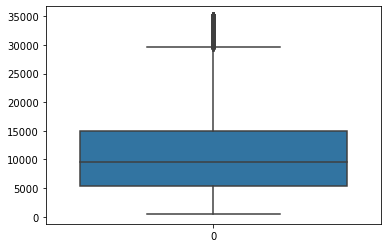

In [66]:
#Box plot
sns.boxplot(data=data.loan_amnt)

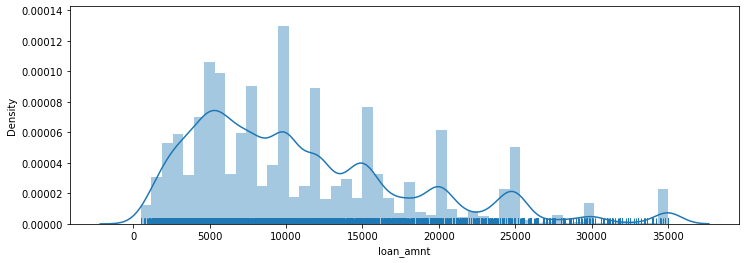

In [67]:
plt.figure(figsize=(12,4))

sns.distplot(a=data.loan_amnt, rug=True)

plt.show()

In [68]:
#Stats of laon amount
data.loan_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   38577.00
mean    11047.03
std      7348.44
min       500.00
5%       2400.00
10%      3090.00
25%      5300.00
50%      9600.00
75%     15000.00
90%     21600.00
95%     25000.00
99%     35000.00
max     35000.00
Name: loan_amnt, dtype: float64

Observations:
From the above plots, more number of people took loan amount of 9600, and also meadian of distribution is 10000. And very few people took more than 30000 loan amount.

# Creating a subset of data where Loan amount >30 k

In [69]:
data_loan_amount_GreaterThan30K=data[data['loan_amnt']>=30000]

In [70]:
data_loan_amount_GreaterThan30K

id  loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  \
31     1069539      31825        31825         31825.00  36 months      7.90   
80     1068994      35000        22075         22050.00  60 months     17.27   
128    1068159      35000        35000         35000.00  36 months      8.90   
185    1067084      35000        35000         35000.00  36 months     10.65   
268    1066155      35000        26825         26800.00  60 months     18.64   
...        ...        ...          ...              ...        ...       ...   
19800   669297      32000        32000         31684.90  60 months     20.85   
19811   666337      32000        32000         31569.14  60 months     19.74   
19825   668841      30000        30000         29094.62  60 months     16.40   
19838   668594      30000        30000         30000.00  60 months     17.88   
19857   668166      35000        35000         34682.60  60 months     20.48   

       installment grade sub_grade emp_length home_ownership  annual_inc  \
31          995.82     A        A4    5 years       MORTGAGE    75000.00   
80          551.84     D        D3    3 years       MORTGAGE   150000.00   
128        1111.37     A        A5    6 years       MORTGAGE   125000.00   
185        1140.07     B        B2    2 years       MORTGAGE   168000.00   
268         690.56     E        E1    8 years       MORTGAGE    85000.00   
...            ...   ...       ...        ...            ...         ...   
19800       863.01     G        G3    5 years           RENT    62400.00   
19811       843.19     F        F5    8 years           RENT    93500.00   
19825       735.94     E        E1    6 years       MORTGAGE   110000.00   
19838       759.85     E        E5  10+ years       MORTGAGE   360000.00   
19857       936.66     G        G2    2 years       MORTGAGE   250000.00   

      verification_status    issue_d loan_status             purpose  \
31               Verified 2011-12-01  Fully Paid  debt_consolidation   
80               Verified 2011-12-01  Fully Paid    home_improvement   
128              Verified 2011-12-01  Fully Paid  debt_consolidation   
185              Verified 2011-12-01  Fully Paid  debt_consolidation   
268              Verified 2011-12-01  Fully Paid  debt_consolidation   
...                   ...        ...         ...                 ...   
19800            Verified 2011-02-01  Fully Paid  debt_consolidation   
19811            Verified 2011-02-01  Fully Paid  debt_consolidation   
19825        Not Verified 2011-02-01  Fully Paid  debt_consolidation   
19838     Source Verified 2011-02-01  Fully Paid  debt_consolidation   
19857            Verified 2011-02-01  Fully Paid         credit_card   

      addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
31            NJ 14.03            0       1981-11-01               0   
80            NY  7.51            0       2003-06-01               1   
128           CA 22.71            0       2000-08-01               0   
185           TX  3.17            1       2002-12-01               1   
268           IL 12.00            0       1995-01-01               1   
...          ...   ...          ...              ...             ...   
19800         MA 13.04            0       2003-04-01               0   
19811         NY 16.36            0       2004-05-01               0   
19825         NY  9.03            0       1999-12-01               0   
19838         NY 11.35            0       2067-04-01               3   
19857         NC 20.64            1       1983-08-01               0   

       open_acc  pub_rec  revol_bal  revol_util  total_acc  total_pymnt  \
31           12        0      23151       27.40         26     34886.91   
80           11        0       7334       53.30         31     28887.10   
128           8        0       9051       34.80         32     40009.01   
185          16        0       1099        1.40         22     38061.50   
268          16        0      310

In [71]:
data_loan_amount_GreaterThan30K.describe().T

count      mean       std       min       25%  \
id                       1072.00 861277.29 119627.99 551238.00 762066.25   
loan_amnt                1072.00  33112.17   2297.24  30000.00  30000.00   
funded_amnt              1072.00  31573.83   4263.58  18225.00  30000.00   
funded_amnt_inv          1072.00  30513.24   5453.91   2525.00  29725.00   
int_rate                 1072.00     15.78      4.06      5.99     12.42   
installment              1072.00    860.63    190.81    422.25    744.53   
annual_inc               1072.00 126012.50  80361.02  43200.00  80000.00   
dti                      1072.00     13.52      6.52      0.00      8.55   
delinq_2yrs              1072.00      0.14      0.42      0.00      0.00   
inq_last_6mths           1072.00      0.98      1.25      0.00      0.00   
open_acc                 1072.00     10.76      4.21      2.00      8.00   
pub_rec                  1072.00      0.03      0.17      0.00      0.00   
revol_bal                1072.00  26479.11  23715.43      0.00  10451.00   
revol_util               1072.00     50.66     28.05      0.00     27.58   
total_acc                1072.00     29.18     11.32      4.00     21.00   
total_pymnt              1072.00  35181.69  12262.30      0.00  30337.16   
total_pymnt_inv          1072.00  33946.00  12477.42      0.00  28487.69   
last_pymnt_amnt          1072.00  10395.12  10302.85      0.00    924.47   
pub_rec_bankruptcies     1072.00      0.02      0.15      0.00      0.00   
approved_loan_amnt_ratio 1072.00     92.24     15.47      7.21     95.41   

                               50%       75%        max  
id                       849936.50 981633.00 1069539.00  
loan_amnt                 35000.00  35000.00   35000.00  
funded_amnt               33000.00  35000.00   35000.00  
funded_amnt_inv           31540.01  34950.00   35000.00  
int_rate                     16.40     19.03      23.91  
installment                 845.42    970.06    1305.19  
annual_inc               103000.00 143000.00  900000.00  
dti                          13.73     18.54      29.56  
delinq_2yrs                   0.00      0.00       4.00  
inq_last_6mths                1.00      2.00       8.00  
open_acc                     10.00     13.00      30.00  
pub_rec                       0.00      0.00       2.00  
revol_bal                 21204.00  35218.50  147750.00  
revol_util                   52.10     73.83      99.90  
total_acc                    28.00     36.00      79.00  
total_pymnt               38197.68  43162.46   58563.68  
total_pymnt_inv           37229.96  42209.74   58563.68  
last_pymnt_amnt            7978.91  18318.83   36115.20  
pub_rec_bankruptcies          0.00      0.00       1.00  
approved_loan_amnt_ratio     99.80     99.96     100.00

# funded_amnt
The total amount committed to that loan at that point in time.



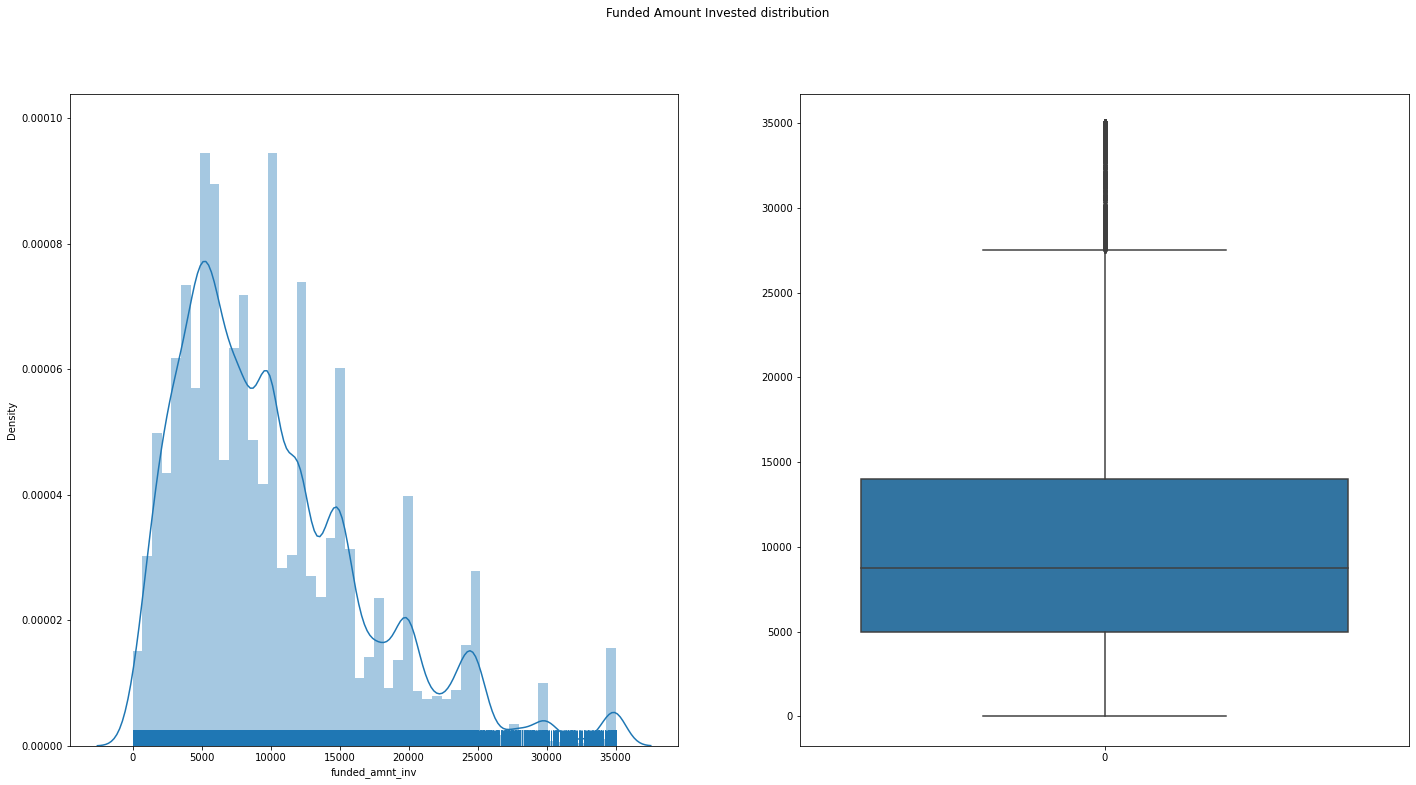

In [72]:
plt.figure(figsize=(24,12))
plt.subplot(1,2,1)
sns.distplot(a=data.funded_amnt_inv, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=data.funded_amnt_inv)
plt.suptitle('Funded Amount Invested distribution')
plt.show()

In [73]:
data.funded_amnt_inv.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   38577.00
mean    10222.48
std      7022.72
min         0.00
5%       1800.00
10%      2825.00
25%      5000.00
50%      8733.44
75%     14000.00
90%     19975.00
95%     24500.07
99%     34715.01
max     35000.00
Name: funded_amnt_inv, dtype: float64

In [74]:
data[['funded_amnt_inv','loan_amnt','funded_amnt']].describe()

funded_amnt_inv  loan_amnt  funded_amnt
count         38577.00   38577.00     38577.00
mean          10222.48   11047.03     10784.06
std            7022.72    7348.44      7090.31
min               0.00     500.00       500.00
25%            5000.00    5300.00      5200.00
50%            8733.44    9600.00      9550.00
75%           14000.00   15000.00     15000.00
max           35000.00   35000.00     35000.00

# Approved Loan Amount Ratio

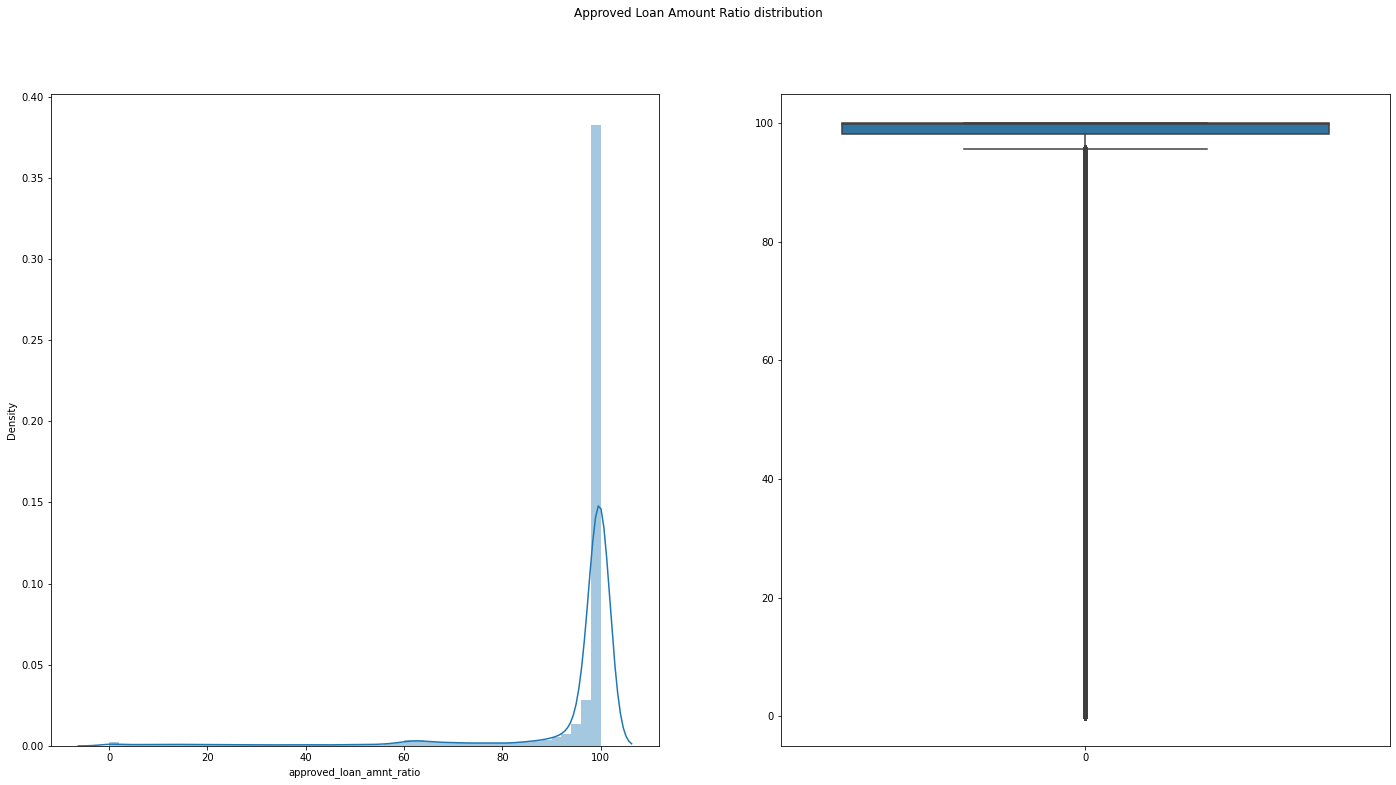

In [75]:
plt.figure(figsize=(24,12))
plt.subplot(1,2,1)
sns.distplot(a=data.approved_loan_amnt_ratio)
plt.subplot(1,2,2)
sns.boxplot(data=data.approved_loan_amnt_ratio)
plt.suptitle('Approved Loan Amount Ratio distribution')
plt.show()

In [76]:
data['approved_loan_amnt_ratio'].describe()

count   38577.00
mean       93.79
std        17.33
min         0.00
25%        98.25
50%        99.93
75%       100.00
max       100.00
Name: approved_loan_amnt_ratio, dtype: float64

Observation:
    1. 100% loan has been approved
    2. 70% of borrowers got loan approval

# Interest Rate

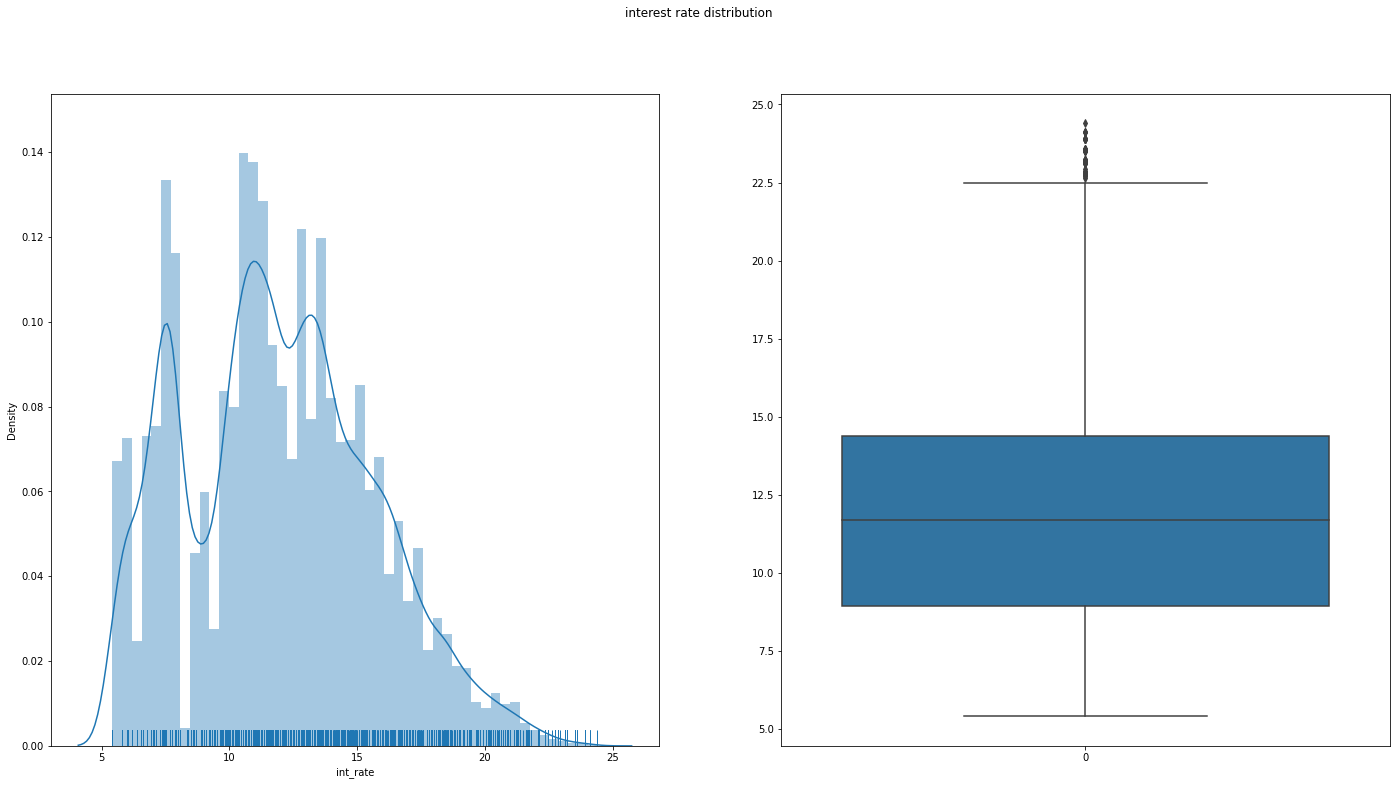

In [77]:
plt.figure(figsize=(24,12))
plt.subplot(1,2,1)
sns.distplot(a=data.int_rate, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=data.int_rate)
plt.suptitle('interest rate distribution')
plt.show()

# Creating data set having higher loan interest rate

In [78]:
data_loan_amount_InterestRate_GreaterThan22 = data[data['int_rate']>=22.00]

In [79]:
data_loan_amount_InterestRate_GreaterThan22

id  loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  \
223    1060644      24250        18100         18075.00  60 months     23.91   
601    1058624      12375        12375         12375.00  60 months     23.13   
616    1061914      22400        22400         22400.00  60 months     22.74   
733    1060753      24925        24925         24900.00  60 months     23.91   
926    1057201      10400        10400         10400.00  60 months     22.35   
...        ...        ...          ...              ...        ...       ...   
15271   751923      25000        22200         22200.00  60 months     22.48   
15322   610893      30000        30000         29725.00  60 months     22.48   
15414   747449      16000        16000         16000.00  60 months     23.59   
15457   748503      24000        20850         20850.00  60 months     22.11   
15710   685852      30000        30000         29975.00  60 months     22.11   

       installment grade sub_grade emp_length home_ownership  annual_inc  \
223         519.76     G        G4    7 years       MORTGAGE   120000.00   
601         349.79     G        G2    5 years           RENT    40000.00   
616         628.13     G        G1    6 years           RENT    85000.00   
733         715.75     G        G4    4 years           RENT    60000.00   
926         289.32     F        F5    3 years       MORTGAGE    72000.00   
...            ...   ...       ...        ...            ...         ...   
15271       619.22     G        G2    5 years           RENT    63144.00   
15322       836.78     G        G2    3 years       MORTGAGE    64000.00   
15414       456.49     G        G5    5 years            OWN    35088.00   
15457       577.16     G        G1    6 years           RENT    98000.00   
15710       830.45     G        G1    4 years       MORTGAGE   156600.00   

      verification_status    issue_d  loan_status             purpose  \
223              Verified 2011-12-01   Fully Paid  debt_consolidation   
601          Not Verified 2011-12-01  Charged Off               other   
616          Not Verified 2011-12-01  Charged Off         credit_card   
733              Verified 2011-12-01   Fully Paid         credit_card   
926       Source Verified 2011-12-01  Charged Off  debt_consolidation   
...                   ...        ...          ...                 ...   
15271            Verified 2011-05-01   Fully Paid      major_purchase   
15322            Verified 2011-05-01   Fully Paid  debt_consolidation   
15414     Source Verified 2011-05-01   Fully Paid      major_purchase   
15457     Source Verified 2011-05-01   Fully Paid    home_improvement   
15710            Verified 2011-05-01   Fully Paid  debt_consolidation   

      addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
223           AZ 12.96            0       2000-04-01               3   
601           FL 20.88            0       1996-01-01               0   
616           NY  7.02            2       1972-12-01               1   
733           FL 17.74            0       2004-05-01               2   
926           CA  8.82            0       2005-04-01               0   
...          ...   ...          ...              ...             ...   
15271         OR 18.66            0       1995-09-01               0   
15322         GA 17.36            0       1996-12-01               0   
15414         WY 18.33            0       2000-12-01               1   
15457         CA 14.63            3       2003-11-01               0   
15710         VA 16.32            0       1992-06-01               0   

       open_acc  pub_rec  revol_bal  revol_util  total_acc  total_pymnt  \
223           7        0      31992       99.00         20     22206.82   
601          27        0      13768       22.50         31      8530.26   
616          14        0      13773       58.70         16     26376.52   
733          19        0      14265       98.90         26     37823.37   
926           8      

In [80]:
data_loan_amount_InterestRate_GreaterThan22.describe().T

count      mean       std       min       25%  \
id                       157.00 915763.63 109179.38 610893.00 817854.00   
loan_amnt                157.00  22671.18   9132.32   1400.00  15000.00   
funded_amnt              157.00  22387.58   9063.35   1400.00  14650.00   
funded_amnt_inv          157.00  21965.63   9162.77   1400.00  14400.00   
int_rate                 157.00     22.64      0.60     22.06     22.11   
installment              157.00    632.63    251.29     53.52    422.37   
annual_inc               157.00 100521.82  77662.38  17652.00  60000.00   
dti                      157.00     14.82      5.80      0.00      9.95   
delinq_2yrs              157.00      0.39      0.82      0.00      0.00   
inq_last_6mths           157.00      1.06      1.07      0.00      0.00   
open_acc                 157.00     11.52      7.18      2.00      6.00   
pub_rec                  157.00      0.09      0.29      0.00      0.00   
revol_bal                157.00  21738.99  22038.52      0.00   9334.00   
revol_util               156.00     76.26     23.90      0.00     59.85   
total_acc                157.00     26.06     13.83      5.00     17.00   
total_pymnt              157.00  23691.77  15447.43    498.49   9828.83   
total_pymnt_inv          157.00  23236.00  15107.28    401.03   9697.16   
last_pymnt_amnt          157.00   7867.91   9665.42      0.00    520.57   
pub_rec_bankruptcies     157.00      0.06      0.23      0.00      0.00   
approved_loan_amnt_ratio 157.00     96.99     10.74     36.28     99.56   

                               50%        75%        max  
id                       966843.00 1012281.00 1061914.00  
loan_amnt                 22600.00   30000.00   35000.00  
funded_amnt               22000.00   30000.00   35000.00  
funded_amnt_inv           21600.00   29950.00   35000.00  
int_rate                     22.48      23.13      24.40  
installment                 619.55     841.24    1005.06  
annual_inc                80000.00  110000.00  725000.00  
dti                          15.83      19.09      24.60  
delinq_2yrs                   0.00       0.00       4.00  
inq_last_6mths                1.00       2.00       3.00  
open_acc                     10.00      15.00      30.00  
pub_rec                       0.00       0.00       1.00  
revol_bal                 15733.00   25000.00  125558.00  
revol_util                   84.50      96.48      99.90  
total_acc                    24.00      35.00      63.00  
total_pymnt               21029.97   35758.96   58563.68  
total_pymnt_inv           20896.16   35590.09   58563.68  
last_pymnt_amnt            2112.73   15085.30   34675.92  
pub_rec_bankruptcies          0.00       0.00       1.00  
approved_loan_amnt_ratio     99.92     100.00     100.00

# Installment
The monthly payment owed by the borrower if the loan originates.

In [81]:
data['installment']

0       162.87
1        59.83
2        84.33
3       339.31
5       156.46
         ...  
39712    78.42
39713   275.38
39714   156.84
39715   155.38
39716   255.43
Name: installment, Length: 38577, dtype: float64

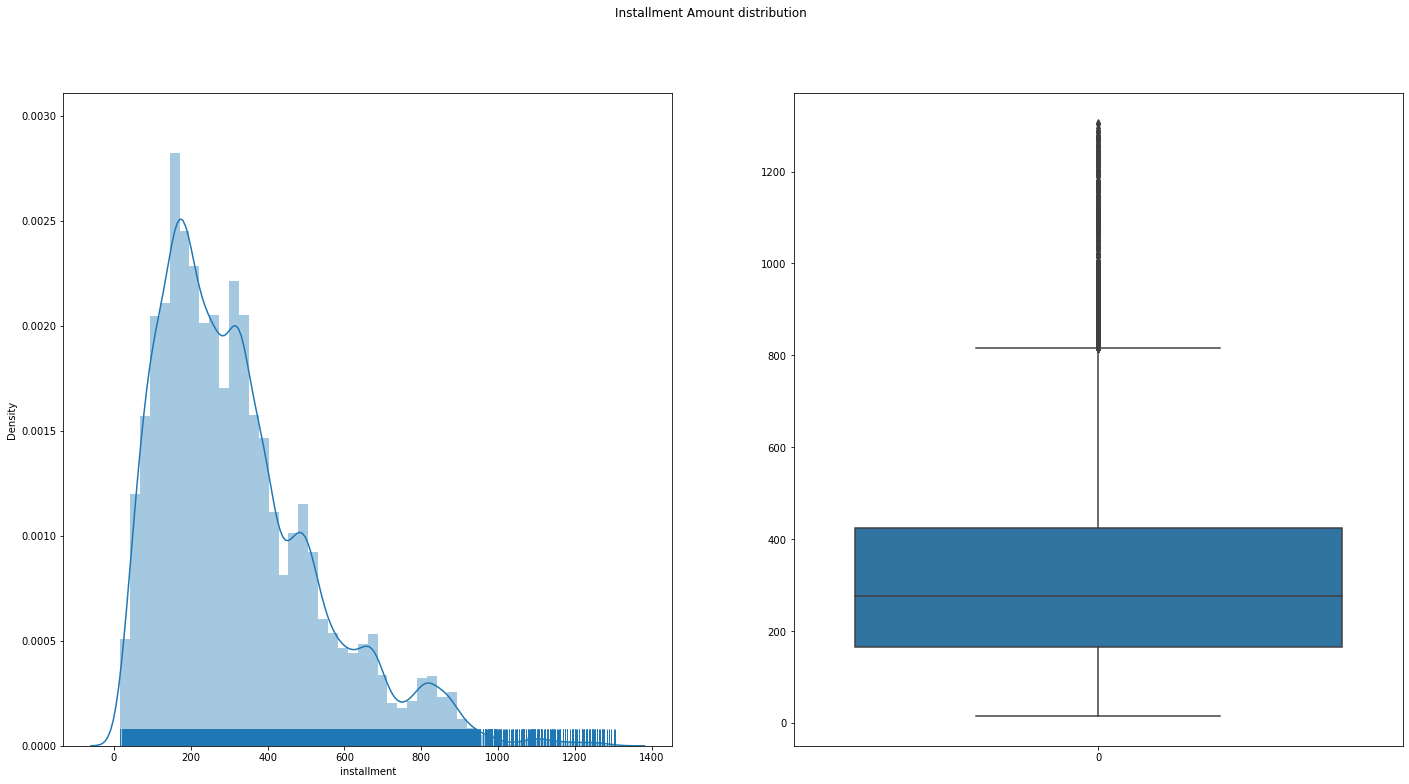

In [82]:
installment = data.installment
plt.figure(figsize=(24,12))
plt.subplot(1,2,1)
sns.distplot(a=installment, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=installment)
plt.suptitle('Installment Amount distribution')
plt.show()

In [83]:
data.installment.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   38577.00
mean      322.47
std       208.64
min        15.69
5%         70.61
10%        98.99
25%       165.74
50%       277.86
75%       425.55
90%       620.90
95%       760.82
99%       931.09
max      1305.19
Name: installment, dtype: float64

# annual_inc
The self-reported annual income provided by the borrower during registration.

In [84]:
data.annual_inc

0        24000.00
1        30000.00
2        12252.00
3        49200.00
5        36000.00
           ...   
39712   110000.00
39713    18000.00
39714   100000.00
39715   200000.00
39716    22000.00
Name: annual_inc, Length: 38577, dtype: float64

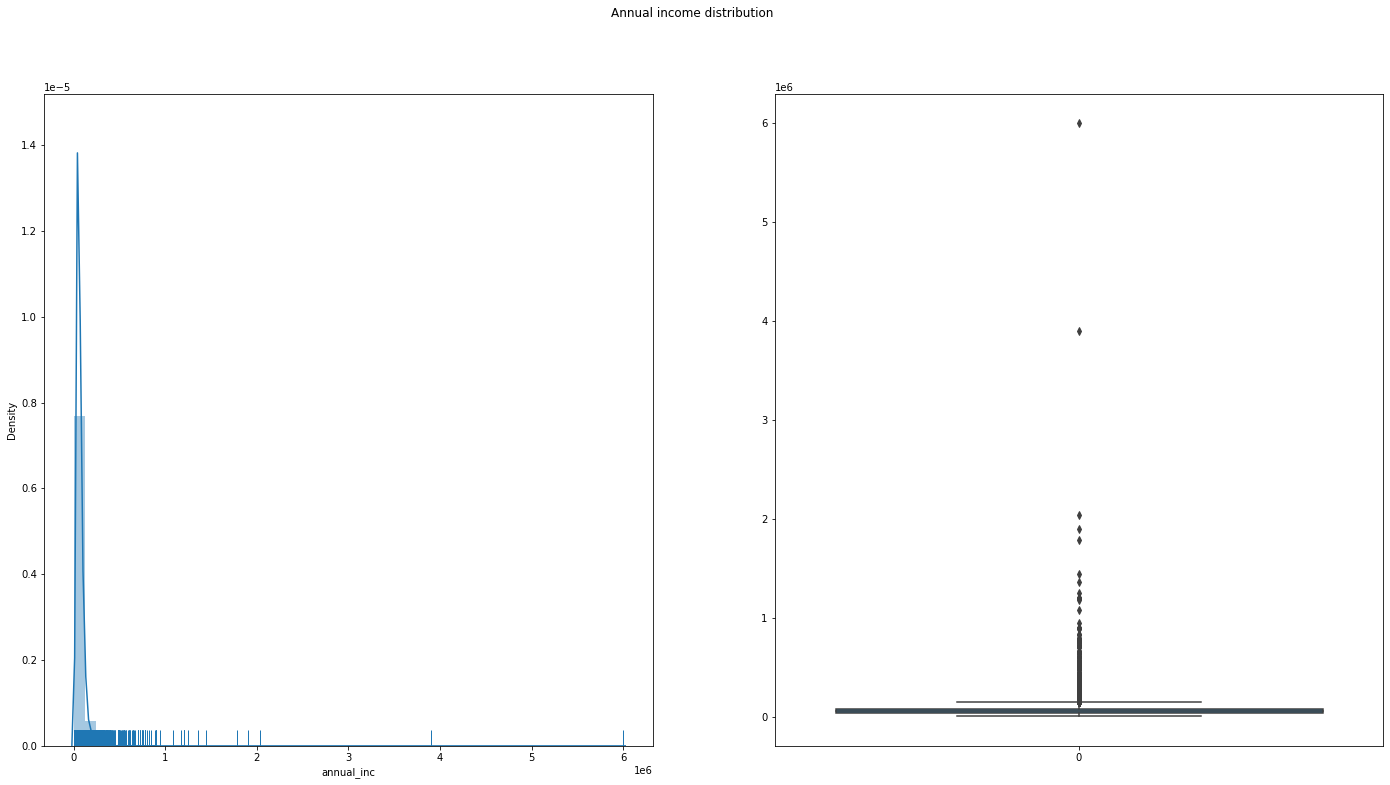

In [85]:
var_inc = data.annual_inc
plt.figure(figsize=(24,12))
plt.subplot(1,2,1)
sns.distplot(a=var_inc, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var_inc)
plt.suptitle('Annual income distribution')
plt.show()

In [86]:
data.annual_inc.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count     38577.00
mean      68777.97
std       64218.68
min        4000.00
5%        24000.00
10%       30000.00
25%       40000.00
50%       58868.00
75%       82000.00
90%      115000.00
95%      140004.00
99%      234144.00
max     6000000.00
Name: annual_inc, dtype: float64

# dti
A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

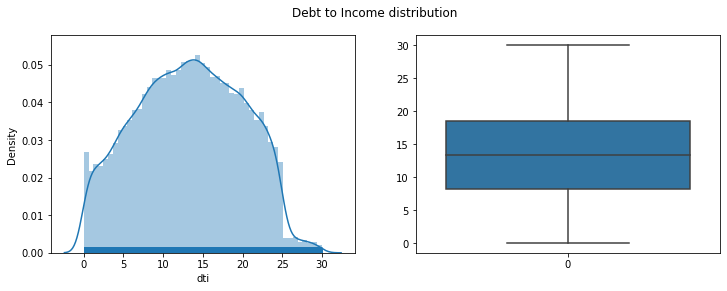

In [87]:
var1 = data.dti

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)
plt.suptitle('Debt to Income distribution')
plt.show()

Observations:
Looks like there are no outliers and the distribution is very much similar to normal distribution. This is good sign that all the loans are given to barrower's who have Debt to Income ration less than 30.

# Pub rec
Number of Public derogatory records



Text(0.5, 1.0, 'pub_rec Distribution')

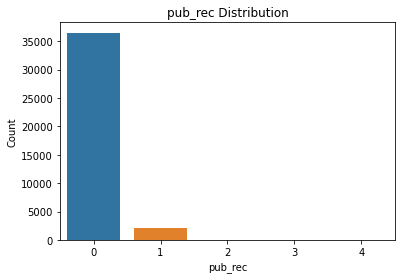

In [88]:
x = 'pub_rec'

prob_df = data[x].value_counts().reset_index()
sns.barplot(x='index', y=x, data=prob_df)
plt.xlabel(x)
plt.ylabel('Count')
plt.title(x +' Distribution')

In [89]:
data[x].value_counts()

0    36507
1     2013
2       48
3        7
4        2
Name: pub_rec, dtype: int64

# pub_rec_bankruptcies
Number of public record bankruptcies

In [90]:
data['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

Text(0.5, 1.0, 'pub_rec_bankruptcies Distribution')

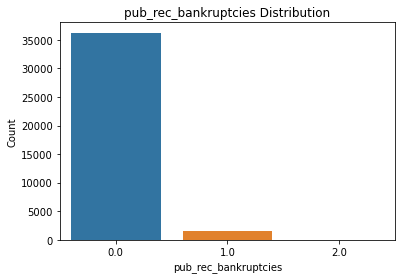

In [91]:
x = 'pub_rec_bankruptcies'
#Probability / Percentage of each values
prob_df = data[x].value_counts().reset_index()
sns.barplot(x='index', y=x, data=prob_df)
plt.xlabel(x)
plt.ylabel('Count')
plt.title(x +' Distribution')

In [92]:
data[x].value_counts()

0.00    36238
1.00     1637
2.00        5
Name: pub_rec_bankruptcies, dtype: int64

# Loan issue date (issue_d)

In [93]:
df_Loan_issue_date_Year = data['issue_d_year'].value_counts()

In [94]:
df_Loan_issue_date_Year

2011    20516
2010    11532
2009     4716
2008     1562
2007      251
Name: issue_d_year, dtype: int64

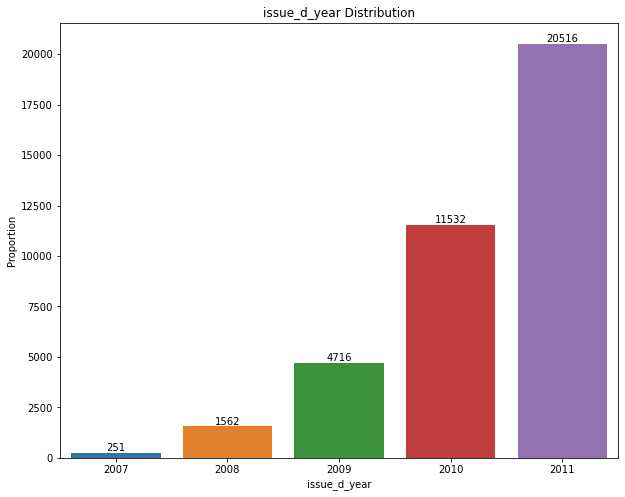

In [95]:
var = 'issue_d_year'
#Probability / Percentage of each values
prob_df = data[var].value_counts().reset_index()

plt.figure(figsize=(10,8))
#plt.subplot(2,2,1)
ax= sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

for i in ax.containers:
    ax.bar_label(i,)

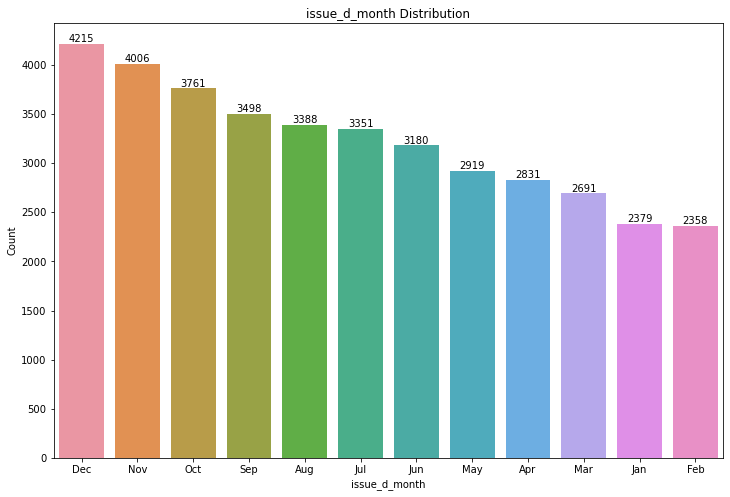

In [96]:
plt.figure(figsize=(12,8))

var = 'issue_d_month'

prob_df = data[var].value_counts().reset_index()

ax= sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Count')
plt.title(var+' Distribution')

for i in ax.containers:
    ax.bar_label(i,)

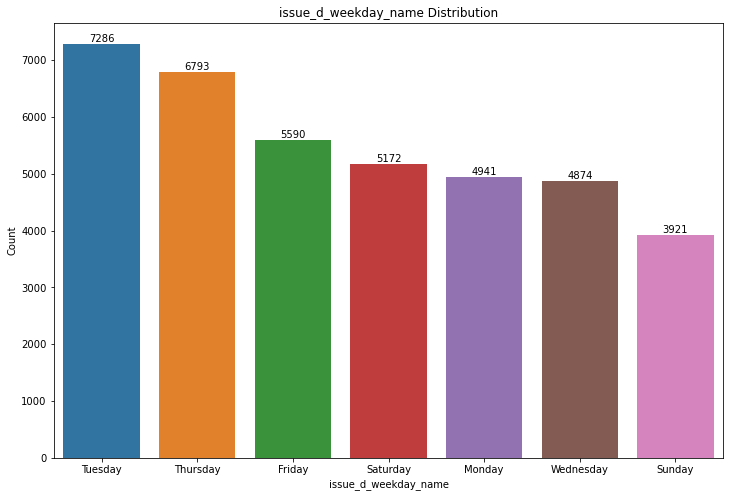

In [97]:
plt.figure(figsize=(12,8))

var = 'issue_d_weekday_name'

prob_df = data[var].value_counts().reset_index()

ax= sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Count')
plt.title(var+' Distribution')


for i in ax.containers:
    ax.bar_label(i,)



Observations:
The lending club(LC) has doubling loan issues every year.
There are more issues of loan in last 3 months every end of the ear i.e., Oct, Nov and Dec.
LC has issued more loans on tuesday and Thursday than other week days.

# Erliest Credit line (earliest_cr_line)

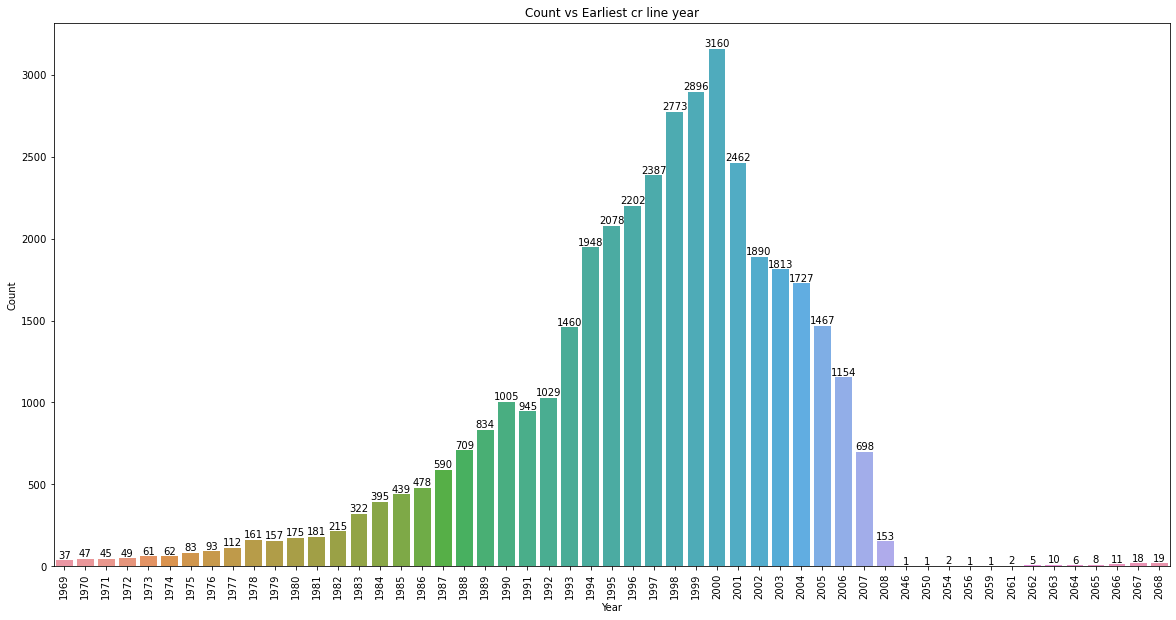

In [98]:
plt.figure(figsize=(20,10))

ax= sns.countplot(data.earliest_cr_line_year)

plt.title('Count vs Earliest cr line year')

plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Count')

for i in ax.containers:
    ax.bar_label(i,)



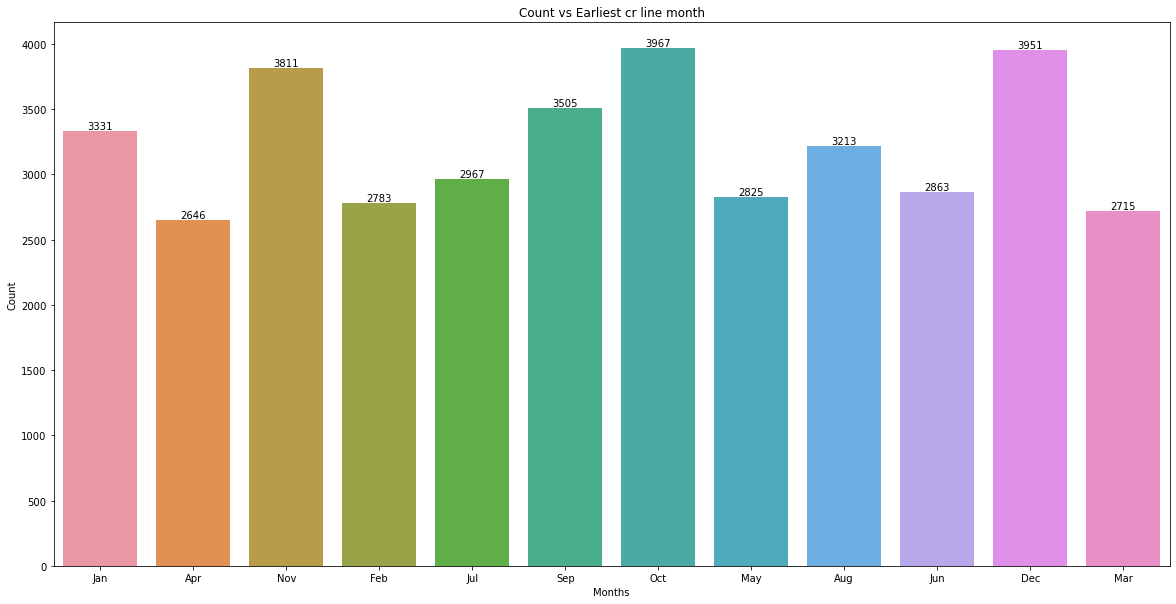

In [99]:
plt.figure(figsize=(20,10))

ax= sns.countplot(data.earliest_cr_line_month)

plt.title('Count vs Earliest cr line month')
plt.xlabel('Months')
plt.ylabel('Count')

for i in ax.containers:
    ax.bar_label(i,)


Observation:
    
    1. Max Erliest Credit Line in Year 2000,
    2. Max Erliest Credit Line in Month Oct, Nov and Dec

# Term

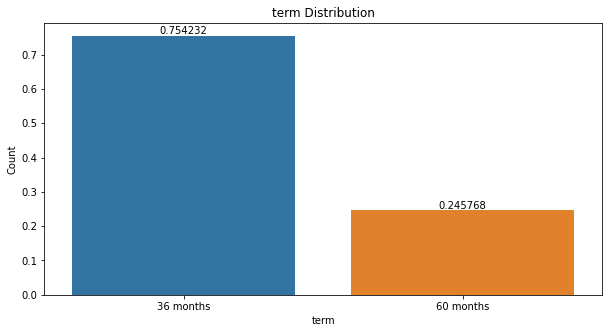

In [100]:
plt.figure(figsize=(10,5))

var = 'term'

df_Term = data[var].value_counts(normalize=True).reset_index()

ax= sns.barplot(x='index', y=var, data=df_Term)

plt.xlabel(var)
plt.ylabel('Count')
plt.title(var+' Distribution')

for i in ax.containers:
    ax.bar_label(i,)


plt.show()

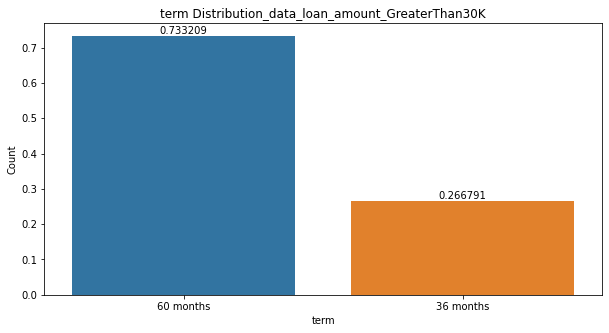

In [101]:
plt.figure(figsize=(10,5))

var = 'term'

df_Term1 = data_loan_amount_GreaterThan30K[var].value_counts(normalize=True).reset_index()

ax= sns.barplot(x='index', y=var, data=df_Term1)

plt.xlabel(var)
plt.ylabel('Count')
plt.title(var+' Distribution_data_loan_amount_GreaterThan30K')

for i in ax.containers:
    ax.bar_label(i,)


plt.show()

# Observations:
if we see the overall data, Borrowers have taken 36 months tenure more than 60 months but if we see the loan amount greater than 30K, that subset of data, borrower had taken 60 months tenure mostly.

# Grade

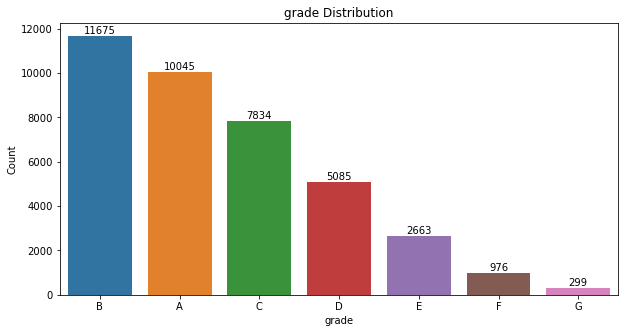

In [102]:
plt.figure(figsize=(10,5))

var = 'grade'

df_var= data[var].value_counts().reset_index()

ax= sns.barplot(x='index', y=var, data=df_var)
plt.xlabel(var)
plt.ylabel('Count')
plt.title(var+' Distribution')

for i in ax.containers:
    ax.bar_label(i,)


plt.show()

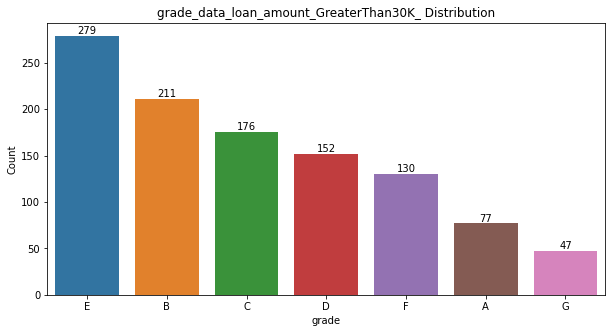

In [103]:
plt.figure(figsize=(10,5))

var = 'grade'

df_var= data_loan_amount_GreaterThan30K[var].value_counts().reset_index()

ax= sns.barplot(x='index', y=var, data=df_var)
plt.xlabel(var)
plt.ylabel('Count')
plt.title(var+'_data_loan_amount_GreaterThan30K_ Distribution')

for i in ax.containers:
    ax.bar_label(i,)


plt.show()

# Observations:
Most borrowers fall under A and B grades then other grades but if the loan amount greater than 30K, then most of the borrowers fall in Grade E

# Employment length

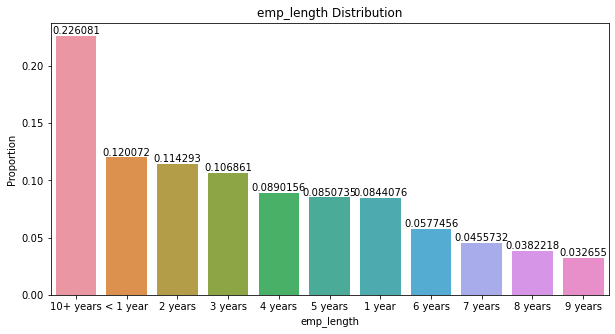

In [104]:
plt.figure(figsize=(10,5))
var = 'emp_length'

prob_df = data[var].value_counts(normalize=True).reset_index()

ax= sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

for i in ax.containers:
    ax.bar_label(i,)


plt.show()

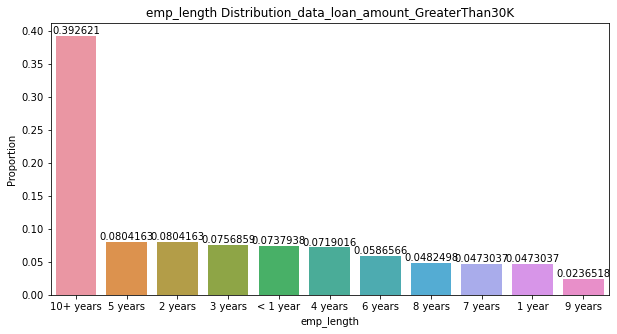

In [105]:
plt.figure(figsize=(10,5))
var = 'emp_length'

df_Emp_Length = data_loan_amount_GreaterThan30K[var].value_counts(normalize=True).reset_index()

ax= sns.barplot(x='index', y=var, data=df_Emp_Length)

plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution_data_loan_amount_GreaterThan30K')

for i in ax.containers:
    ax.bar_label(i,)


plt.show()

# Observation:

Borrowers are mostly 10+ years emploment length and for higher loan amount most of the borrowers are having higher employment length

# Home Ownership

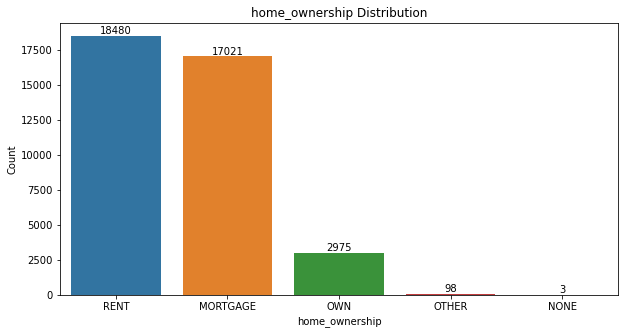

In [106]:

plt.figure(figsize=(10,5))

var = 'home_ownership'

prob_df = data[var].value_counts().reset_index()

ax= sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Count')
plt.title(var+' Distribution')



for i in ax.containers:
    ax.bar_label(i,)

plt.show()

# Observations:
The loan borrowers are mostly having rented and mortgage houses.

# Verification Status

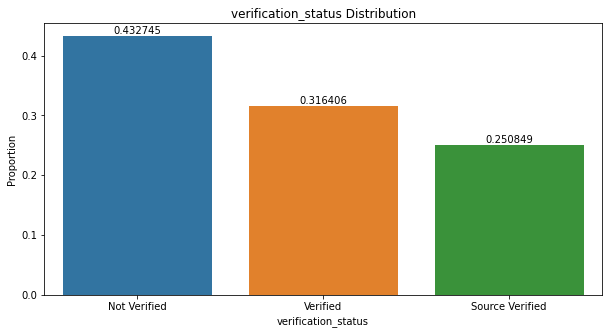

In [107]:

plt.figure(figsize=(10,5))

var = 'verification_status'

prob_df = data[var].value_counts(normalize=True).reset_index()

ax= sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')



for i in ax.containers:
    ax.bar_label(i,)

plt.show()

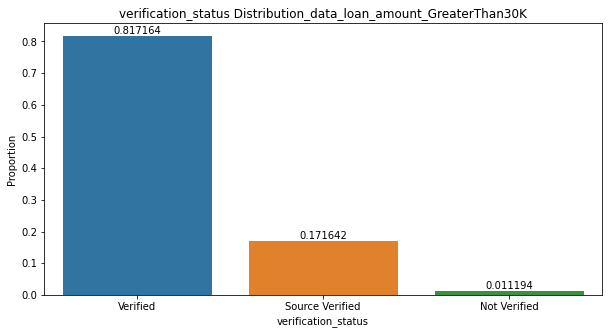

In [108]:
plt.figure(figsize=(10,5))

var = 'verification_status'

prob_df = data_loan_amount_GreaterThan30K[var].value_counts(normalize=True).reset_index()

ax= sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution_data_loan_amount_GreaterThan30K')



for i in ax.containers:
    ax.bar_label(i,)

plt.show()

# Observation:

Most of the cases loans are not verified but in case of higher loan amount, applications are mostly verified

# Loan Status

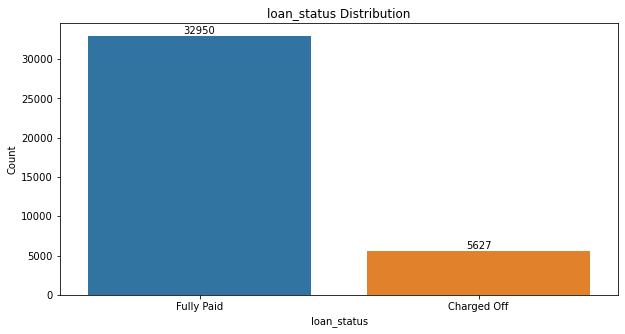

In [109]:

plt.figure(figsize=(10,5))

var = 'loan_status'

df = data[var].value_counts().reset_index()

ax= sns.barplot(x='index', y=var, data=df)
plt.xlabel(var)
plt.ylabel('Count')
plt.title(var+' Distribution')



for i in ax.containers:
    ax.bar_label(i,)

plt.show()

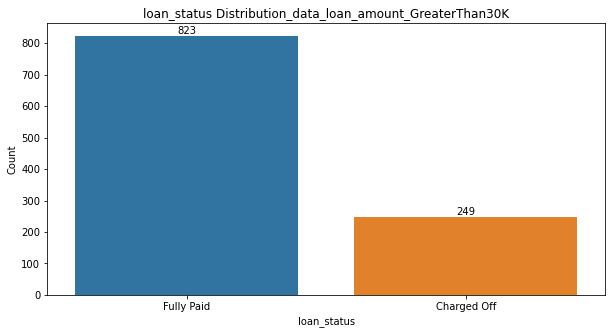

In [110]:
plt.figure(figsize=(10,5))

var = 'loan_status'

prob_df = data_loan_amount_GreaterThan30K[var].value_counts().reset_index()

ax= sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Count')
plt.title(var+' Distribution_data_loan_amount_GreaterThan30K')



for i in ax.containers:
    ax.bar_label(i,)

plt.show()

In [111]:
data['loan_status'].value_counts(normalize=True)

Fully Paid    0.85
Charged Off   0.15
Name: loan_status, dtype: float64

In [112]:
 data_loan_amount_GreaterThan30K['loan_status'].value_counts(normalize=True)

Fully Paid    0.77
Charged Off   0.23
Name: loan_status, dtype: float64

# Observations:
83% of borrowers has paid the loan fully. where are 14% are defaulted the loan.

# Borrower's State (add_state)

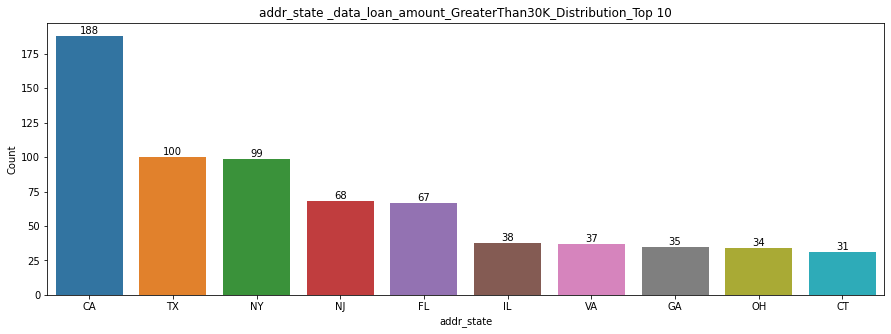

In [113]:
plt.figure(figsize=(15,5))

var = 'addr_state'

df = data_loan_amount_GreaterThan30K[var].value_counts().reset_index()

ax= sns.barplot(x='index', y=var, data=df.head(10))
plt.xlabel(var)
plt.ylabel('Count')
plt.title(var+' _data_loan_amount_GreaterThan30K_Distribution_Top 10')



for i in ax.containers:
    ax.bar_label(i,)

plt.show()

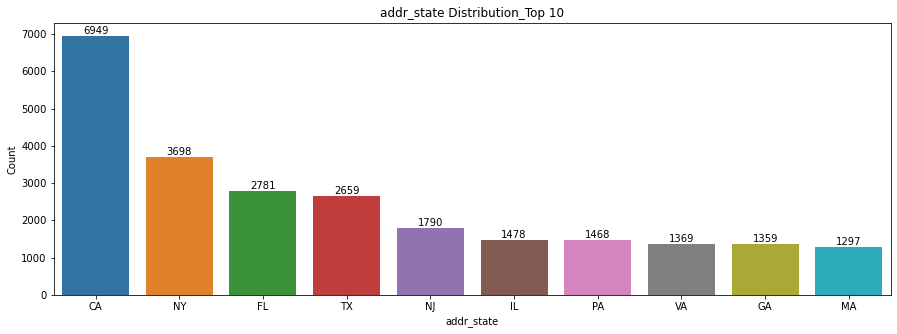

In [114]:
plt.figure(figsize=(15,5))

var = 'addr_state'

df = data[var].value_counts().reset_index()

ax= sns.barplot(x='index', y=var, data=df.head(10))
plt.xlabel(var)
plt.ylabel('Count')
plt.title(var+' Distribution_Top 10')



for i in ax.containers:
    ax.bar_label(i,)

plt.show()

# Observation:

1. For overall data set, top 3 loaction: 
    I) CA
    II)NY
    III)FL

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# SEGMENTED UNIVARIATE ANALYSIS

# Loan Amount

<AxesSubplot:title={'center':'Grade vs Loan Amount'}, xlabel='grade', ylabel='loan_amnt'>

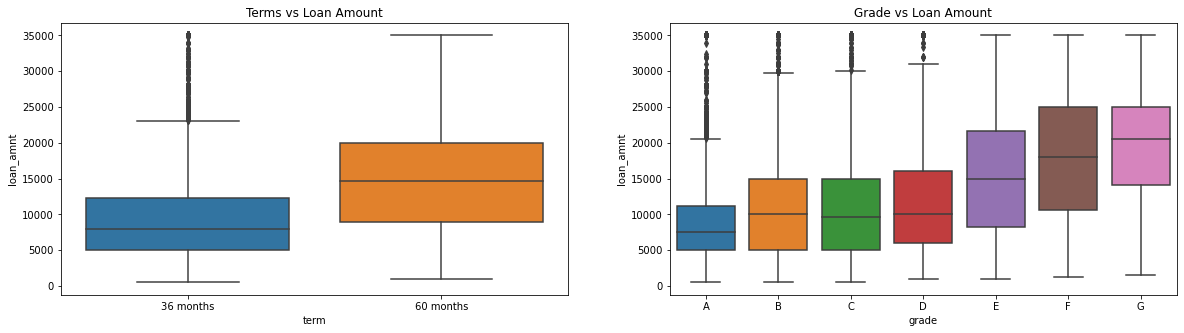

In [115]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.loan_amnt, data=data)
plt.title('Terms vs Loan Amount')
plt.subplot(122)
plt.title('Grade vs Loan Amount')
#Finding grades with sorted alphabetical order
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.loan_amnt, order = grade_ord, data=data)

# Observations:
Higher amount loans have high tenure i.e, 60 months.
Grade 'G'  have taken max loan amount. From A to G,the loan amount is increasing.

# Creating two subset of data set where Loan Status is Charged Off and Loan status is Fully Paid

In [116]:
data_loan_status_Chargedoff = data[data['loan_status']=='Charged Off']

In [117]:
data.shape

(38577, 37)

In [118]:
data_loan_status_Chargedoff

id  loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  \
1      1077430       2500         2500          2500.00  60 months     15.27   
8      1071795       5600         5600          5600.00  60 months     21.28   
9      1071570       5375         5375          5350.00  60 months     12.69   
12     1064687       9000         9000          9000.00  36 months     13.49   
14     1069057      10000        10000         10000.00  36 months     10.65   
...        ...        ...          ...              ...        ...       ...   
39667   118823       2500         2500           675.00  36 months     12.80   
39668   118533       2500         2500           825.00  36 months      9.64   
39669   118523       6500         6500           225.00  36 months     15.01   
39678   113179       1000         1000           950.00  36 months     10.59   
39688   111227      20000        20000          2800.00  36 months     13.43   

       installment grade sub_grade emp_length home_ownership  annual_inc  \
1            59.83     C        C4   < 1 year           RENT    30000.00   
8           152.39     F        F2    4 years            OWN    40000.00   
9           121.45     B        B5   < 1 year           RENT    15000.00   
12          305.38     C        C1   < 1 year           RENT    30000.00   
14          325.74     B        B2    3 years           RENT   100000.00   
...            ...   ...       ...        ...            ...         ...   
39667        84.00     D        D4   < 1 year       MORTGAGE    32000.00   
39668        80.26     B        B4   < 1 year       MORTGAGE    75000.00   
39669       225.37     F        F1    9 years       MORTGAGE   213000.00   
39678        32.55     C        C2    2 years       MORTGAGE    33990.00   
39688       678.08     E        E1    6 years       MORTGAGE   145000.00   

      verification_status    issue_d  loan_status             purpose  \
1         Source Verified 2011-12-01  Charged Off                 car   
8         Source Verified 2011-12-01  Charged Off      small_business   
9                Verified 2011-12-01  Charged Off               other   
12        Source Verified 2011-12-01  Charged Off  debt_consolidation   
14        Source Verified 2011-12-01  Charged Off               other   
...                   ...        ...          ...                 ...   
39667        Not Verified 2007-08-01  Charged Off    home_improvement   
39668        Not Verified 2007-08-01  Charged Off    home_improvement   
39669        Not Verified 2007-08-01  Charged Off      small_business   
39678        Not Verified 2007-08-01  Charged Off             wedding   
39688        Not Verified 2007-08-01  Charged Off         credit_card   

      addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
1             GA  1.00            0       1999-04-01               5   
8             CA  5.55            0       2004-04-01               2   
9             TX 18.08            0       2004-09-01               0   
12            VA 10.08            0       2004-04-01               1   
14            CA  7.06            0       1991-05-01               2   
...          ...   ...          ...              ...             ...   
39667         NE 20.00            0       1992-07-01               1   
39668         NE 20.00            0       1994-02-01               3   
39669         GA  6.45            0       1990-07-01               0   
39678         VA 14.47            0       2004-07-01               1   
39688         FL 10.15            0       1996-01-01               0   

       open_acc  pub_rec  revol_bal  revol_util  total_acc  total_pymnt  \
1             3        0       1687        9.40          4      1008.71   
8            11        0       5210       32.60         13       646.02   
9             2        0       9279       36.50          3      1476.19   
12            4        0      10452       91.70          9      2270.70   
14           14      

In [119]:
data_loan_status_Fully_Paid = data[data['loan_status']=='Fully Paid']

In [120]:
data_loan_status_Fully_Paid.shape

(32950, 37)

Text(0.5, 1.0, 'Terms vs Loan Amount_Charged Off')

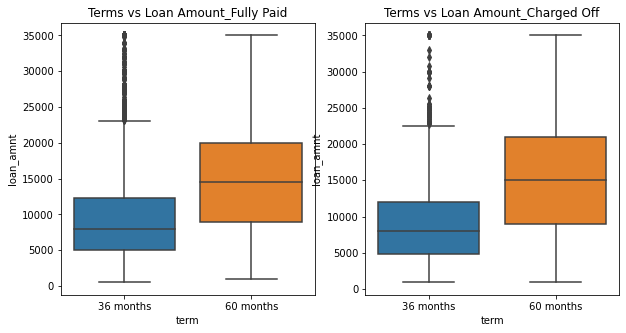

In [121]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.boxplot(x='term', y=data_loan_status_Fully_Paid.loan_amnt, data=data)
plt.title('Terms vs Loan Amount_Fully Paid')



plt.subplot(122)
sns.boxplot(x='term', y=data_loan_status_Chargedoff.loan_amnt, data=data)
plt.title('Terms vs Loan Amount_Charged Off')





<AxesSubplot:xlabel='grade', ylabel='loan_amnt'>

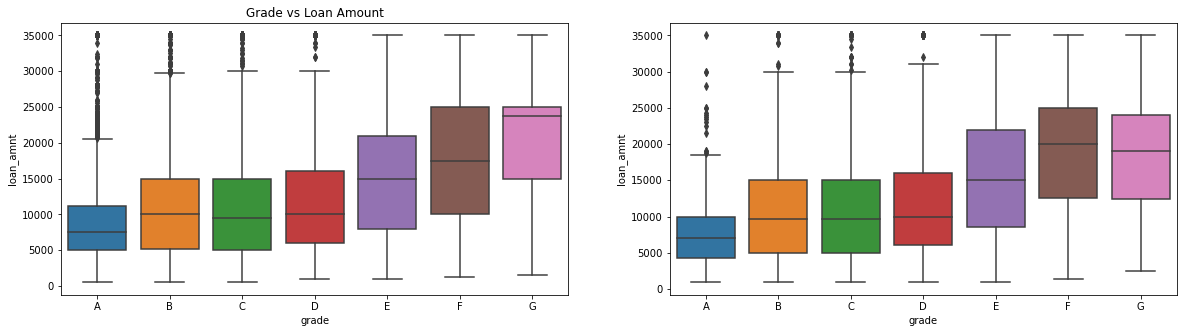

In [122]:
plt.figure(figsize=(20,5))
plt.subplot(121)

plt.title('Grade vs Loan Amount')

grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data_loan_status_Fully_Paid.loan_amnt, order = grade_ord, data=data)


plt.title('Grade vs Loan Amount')
plt.subplot(122)
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data_loan_status_Chargedoff.loan_amnt, order = grade_ord, data=data)

# Observations:
Higher amount loans have high tenure i.e, 60 months.

# Home Ownership & Verification Status vs Loan Amount

<AxesSubplot:title={'center':'verification_status vs Loan Amount'}, xlabel='verification_status', ylabel='loan_amnt'>

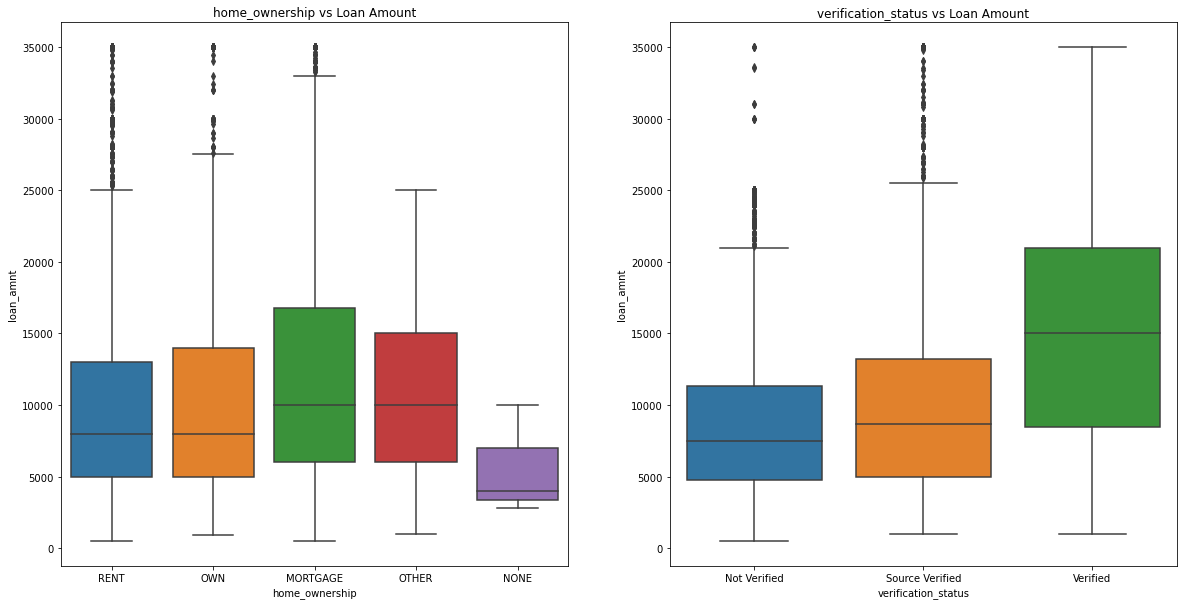

In [123]:
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.loan_amnt, data=data)
plt.title('home_ownership vs Loan Amount')
plt.subplot(122)
plt.title('verification_status vs Loan Amount')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.loan_amnt, order = verification_status_ord, data=data)

# Observations:
more borrowers are from MORTAGE and also the median loan amount also high for MORTAGE owned borrowers.
And most of borrowers are verified for borrowing loan >9k

Text(0.5, 1.0, 'loan_status vs Loan Amount')

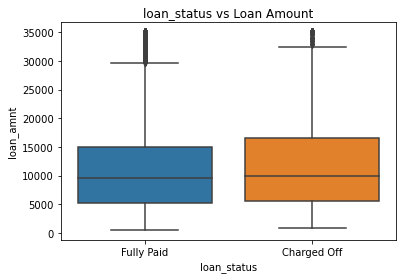

In [124]:
sns.boxplot(x='loan_status', y=data.loan_amnt, data=data)
plt.title('loan_status vs Loan Amount')

# Observations:
Charged Off loans have higher amounts than Fully Paid ones.

# Purpose vs Loan Amount

Text(0.5, 1.0, 'purpose vs Loan Amount')

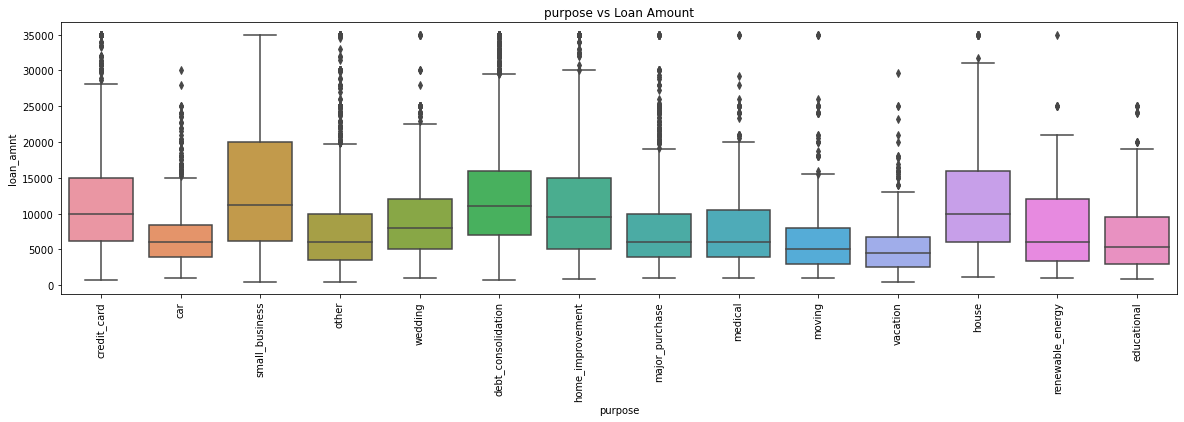

In [125]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.loan_amnt, data=data)
#Rotating x values 90 for better visibility
plt.xticks(rotation=90)
plt.title('purpose vs Loan Amount')

In [126]:
pivot = data.pivot_table(index =['purpose'],
                       values =['loan_amnt'],aggfunc='mean').sort_values(by=['loan_amnt'],ascending=False)
                       
print(pivot)

                    loan_amnt
purpose                      
small_business       13365.11
house                12753.41
debt_consolidation   12503.46
credit_card          11571.41
home_improvement     11308.00
wedding               9755.86
renewable_energy      8537.99
medical               8122.76
major_purchase        8072.60
other                 7936.42
educational           6810.46
car                   6746.73
moving                6568.01
vacation              5417.60


# Observation:
    1. Highest mean value for Loan taken for Small business, followed by house, debt_consolidation

# Emp Length vs Loan Amount

Text(0.5, 1.0, 'emp_length vs Loan Amount')

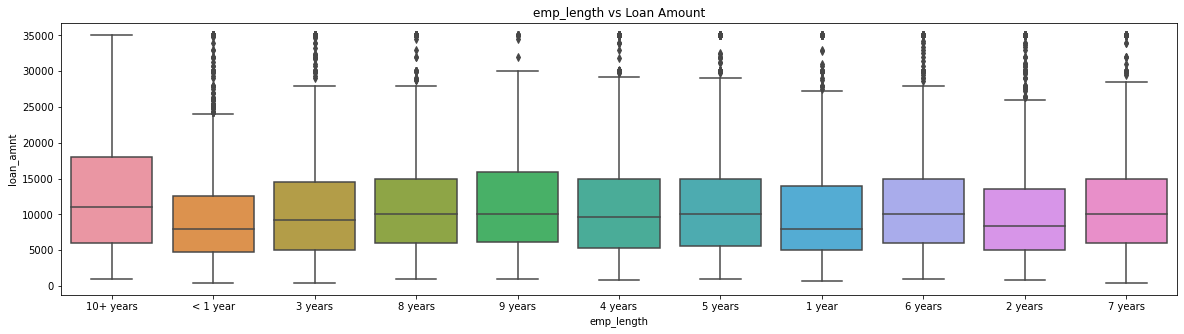

In [127]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.loan_amnt, data=data)
plt.title('emp_length vs Loan Amount')

In [128]:
pivot = data.pivot_table(index =['emp_length'],
                       values =['loan_amnt'],aggfunc='mean').sort_values(by=['loan_amnt'],ascending=False)
                       
print(pivot)

            loan_amnt
emp_length           
10+ years    12808.10
9 years      11903.30
8 years      11741.55
7 years      11565.11
6 years      11372.50
5 years      11114.08
4 years      10839.33
3 years      10636.75
2 years      10124.56
1 year       10056.82
< 1 year      9571.94


In [129]:
pivot = data.pivot_table(index =['emp_length'],
                       values =['loan_amnt'],aggfunc='sum').sort_values(by=['loan_amnt'],ascending=False)
                       
print(pivot)

            loan_amnt
emp_length           
10+ years   108715150
2 years      43444475
< 1 year     43150325
3 years      42674625
4 years      36225050
5 years      35498375
1 year       31870075
6 years      24655575
7 years      19787900
8 years      16849125
9 years      14593450


In [130]:
data['emp_length'].value_counts(normalize= True)

10+ years   0.23
< 1 year    0.12
2 years     0.11
3 years     0.11
4 years     0.09
5 years     0.09
1 year      0.08
6 years     0.06
7 years     0.05
8 years     0.04
9 years     0.03
Name: emp_length, dtype: float64

# Observation:
    1. with higher employment length borrower have high tendency to take high loan amount.
    2. In total data, 23% borrower having employment length more than 10 year

# Issued year and Issued Month Vs Loan Amount 

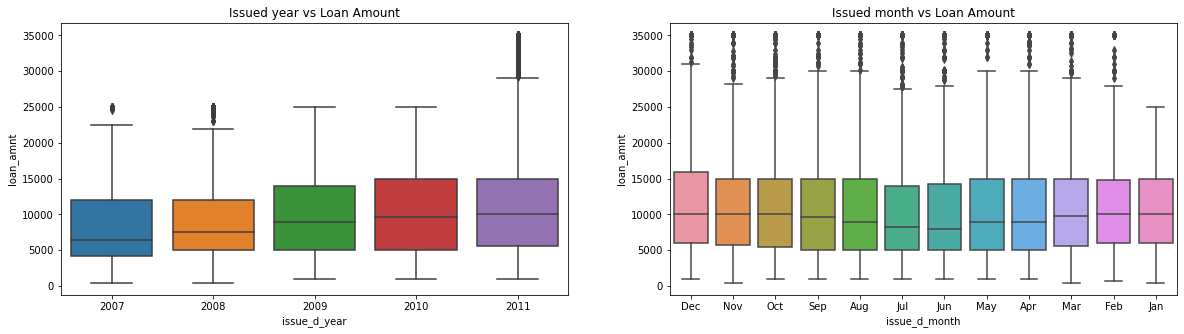

In [131]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=data.issue_d_year, y=data.loan_amnt, data=data)
plt.title('Issued year vs Loan Amount')
plt.subplot(122)
sns.boxplot(x=data.issue_d_month, y=data.loan_amnt, data=data)
plt.title('Issued month vs Loan Amount')
plt.show()

# Observations:

The meadian loan amount in each year did not change much but the distribution is more spread as the years increase, which means people have taken different loan amounts in each year.
Few Loan borrowers took heigher loan amount in 2008 and 2011 which are plotted as ouliers.
Loan borrowers took almost similar amounts in all the months except in December, people have taken heigher amounts as distribution is high above median.

# Earliest Credit Line year vs Earliest Credit Line month

In [132]:
data['earliest_cr_line_year'].dtypes

dtype('O')

In [133]:
data['earliest_cr_line_year'].unique()

array([1985, 1999, 2001, 1996, 2004, 2005, 2007, 1998, 1989, 2003, 1991,
       1993, 1997, 1983, 2002, 1984, 2006, 1987, 1981, 2000, 1994, 1995,
       1992, 1986, 1990, 1988, 1980, 2008, 1979, 1978, 1971, 1972, 1970,
       1969, 1975, 1982, 1976, 1977, 2062, 1973, 2068, 1974, 2067, 2065,
       2063, 2054, 2066, 2064, 2059, 2056, 2046, 2050, 2061], dtype=object)

In [134]:
data['earliest_cr_line_year'] = data['earliest_cr_line_year'].astype(int)

In [135]:
data['earliest_cr_line_year'].dtypes

dtype('int32')

In [136]:
data1= data[data['earliest_cr_line_year']<=2008]

In [137]:
data1

id  loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  \
0      1077501       5000         5000          4975.00  36 months     10.65   
1      1077430       2500         2500          2500.00  60 months     15.27   
2      1077175       2400         2400          2400.00  36 months     15.96   
3      1076863      10000        10000         10000.00  36 months     13.49   
5      1075269       5000         5000          5000.00  36 months      7.90   
...        ...        ...          ...              ...        ...       ...   
39712    92187       2500         2500          1075.00  36 months      8.07   
39713    90665       8500         8500           875.00  36 months     10.28   
39714    90395       5000         5000          1325.00  36 months      8.07   
39715    90376       5000         5000           650.00  36 months      7.43   
39716    87023       7500         7500           800.00  36 months     13.75   

       installment grade sub_grade emp_length home_ownership  annual_inc  \
0           162.87     B        B2  10+ years           RENT    24000.00   
1            59.83     C        C4   < 1 year           RENT    30000.00   
2            84.33     C        C5  10+ years           RENT    12252.00   
3           339.31     C        C1  10+ years           RENT    49200.00   
5           156.46     A        A4    3 years           RENT    36000.00   
...            ...   ...       ...        ...            ...         ...   
39712        78.42     A        A4    4 years       MORTGAGE   110000.00   
39713       275.38     C        C1    3 years           RENT    18000.00   
39714       156.84     A        A4   < 1 year       MORTGAGE   100000.00   
39715       155.38     A        A2   < 1 year       MORTGAGE   200000.00   
39716       255.43     E        E2   < 1 year            OWN    22000.00   

      verification_status    issue_d  loan_status             purpose  \
0                Verified 2011-12-01   Fully Paid         credit_card   
1         Source Verified 2011-12-01  Charged Off                 car   
2            Not Verified 2011-12-01   Fully Paid      small_business   
3         Source Verified 2011-12-01   Fully Paid               other   
5         Source Verified 2011-12-01   Fully Paid             wedding   
...                   ...        ...          ...                 ...   
39712        Not Verified 2007-07-01   Fully Paid    home_improvement   
39713        Not Verified 2007-07-01   Fully Paid         credit_card   
39714        Not Verified 2007-07-01   Fully Paid  debt_consolidation   
39715        Not Verified 2007-07-01   Fully Paid               other   
39716        Not Verified 2007-06-01   Fully Paid  debt_consolidation   

      addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0             AZ 27.65            0       1985-01-01               1   
1             GA  1.00            0       1999-04-01               5   
2             IL  8.72            0       2001-11-01               2   
3             CA 20.00            0       1996-02-01               1   
5             AZ 11.20            0       2004-11-01               3   
...          ...   ...          ...              ...             ...   
39712         CO 11.33            0       1990-11-01               0   
39713         NC  6.40            1       1986-12-01               1   
39714         MA  2.30            0       1998-10-01               0   
39715         MD  3.72            0       1988-11-01               0   
39716         MA 14.29            1       2003-10-01               0   

       open_acc  pub_rec  revol_bal  revol_util  total_acc  total_pymnt  \
0             3        0      13648       83.70          9      5863.16   
1             3        0       1687        9.40          4      1008.71   
2             2        0       2956       98.50         10      3005.67   
3            10        0       5598       21.00         37     12231.89   
5             9      

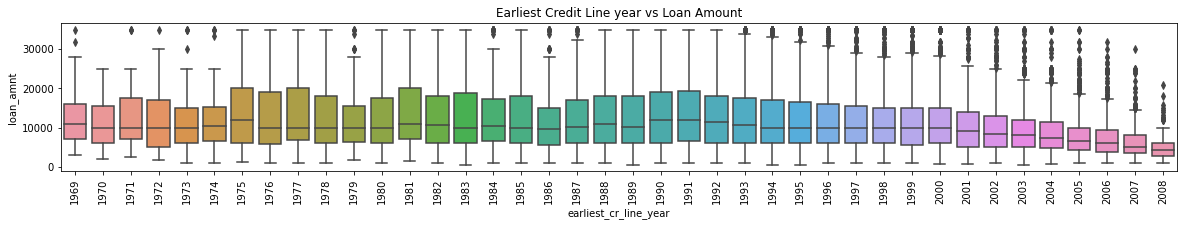

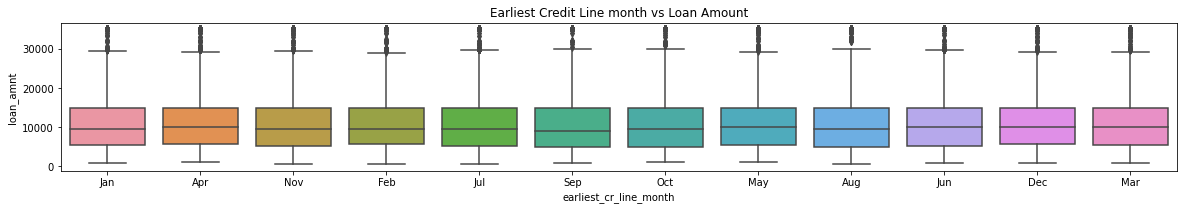

In [138]:
#earliest_cr_line
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x=data1.earliest_cr_line_year, y=data.loan_amnt, data=data)
plt.xticks(rotation=90)
plt.title('Earliest Credit Line year vs Loan Amount')
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.boxplot(x=data1.earliest_cr_line_month, y=data.loan_amnt, data=data)
plt.title('Earliest Credit Line month vs Loan Amount')
plt.show()

# Observation:
    1. After credit line year 1991, distribution of loan amount has beend decreased.

# funded_amnt

<AxesSubplot:title={'center':'Grade vs funded amount'}, xlabel='grade', ylabel='funded_amnt'>

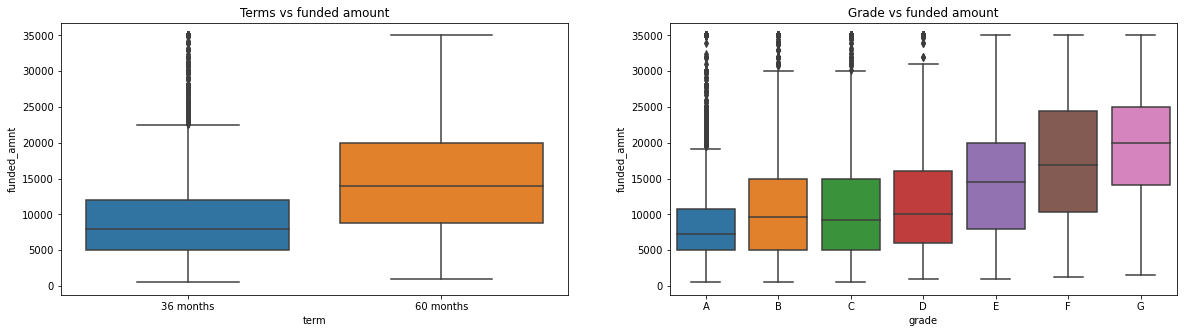

In [139]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.funded_amnt, data=data)
plt.title('Terms vs funded amount')
plt.subplot(122)
plt.title('Grade vs funded amount')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.funded_amnt, order = grade_ord, data=data)

# Observation:
    1. For 36 terms , there are few borrowers who received high loan amount which are shown as outliers.
    2. Higher grade people got higher funded amount

Text(0.5, 1.0, 'loan_status vs Funded amnt')

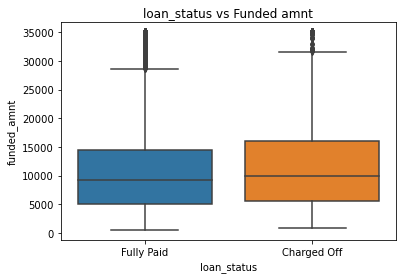

In [140]:
sns.boxplot(x='loan_status', y=data.funded_amnt, data=data)
plt.title('loan_status vs Funded amnt')

Text(0.5, 1.0, 'emp_length vs funded amount')

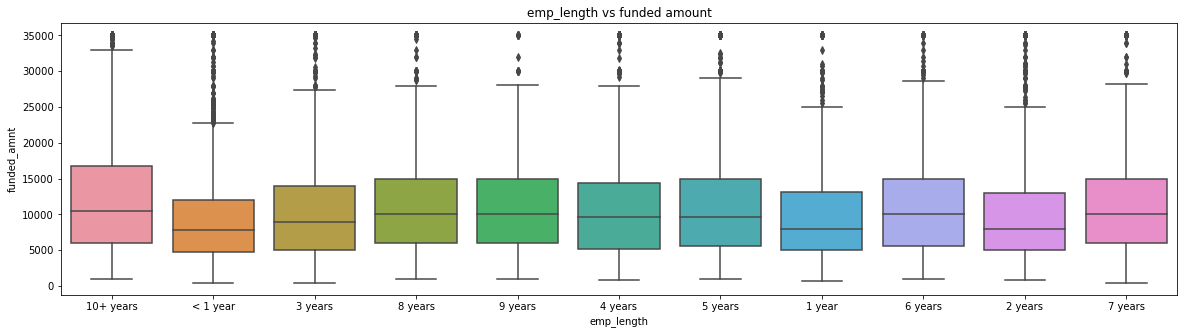

In [141]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.funded_amnt, data=data)
plt.title('emp_length vs funded amount')

Observation:
    1. Loan amount and funded amount both have similar kind of trend across different variable

# int_rate

# Term vs Interest Rate

Text(0.5, 1.0, 'Term vs Interest Rate')

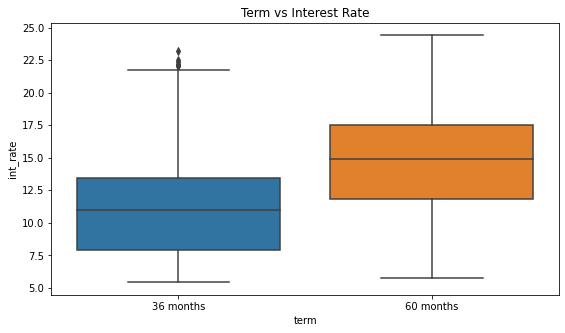

In [142]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.int_rate, data=data)
plt.title('Term vs Interest Rate')


Observation:
The interest rates are higher for Higher tenure loans.

# home_ownership vs Interest Rate

Text(0.5, 1.0, 'home_ownership vs Interest Rate')

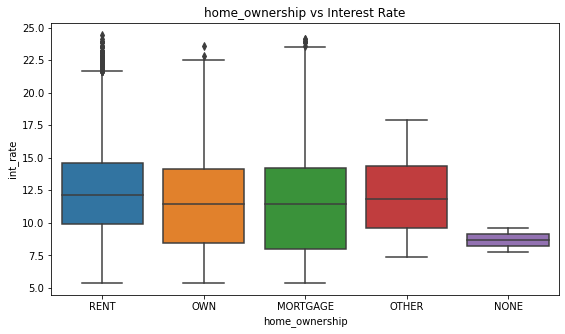

In [143]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.int_rate, data=data)
plt.title('home_ownership vs Interest Rate')

In [144]:
pivot = data.pivot_table(index =['home_ownership'],
                       values =['int_rate'],aggfunc='mean').sort_values(by=['int_rate'],ascending=False)
                       
print(pivot)

                int_rate
home_ownership          
RENT               12.22
OTHER              12.04
OWN                11.69
MORTGAGE           11.66
NONE                8.70


Observation:
    1. Borrowers having own house or kept mortgage for loan, they got less interest rate, as Bank have the security.

# Verification Status vs Interest Rate

<AxesSubplot:title={'center':'verification_status vs Interest Rate'}, xlabel='verification_status', ylabel='int_rate'>

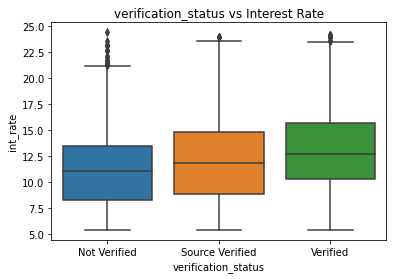

In [145]:
plt.title('verification_status vs Interest Rate')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.int_rate, order = verification_status_ord, data=data)

In [146]:
pivot = data.pivot_table(index =['verification_status'],
                       values =['int_rate'],aggfunc='mean').sort_values(by=['int_rate'],ascending=False)
                       
print(pivot)

                     int_rate
verification_status          
Verified                12.91
Source Verified         12.01
Not Verified            11.17


Observation:
    1. Not verified loan applications get less interest which may be risky for the Bank.

Text(0.5, 1.0, 'loan_status vs Interest Rate')

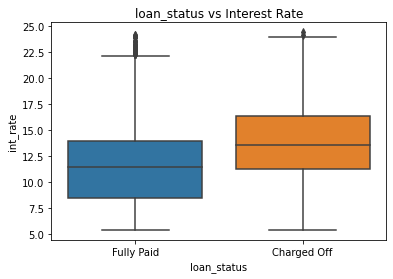

In [147]:
sns.boxplot(x='loan_status', y=data.int_rate, data=data)
plt.title('loan_status vs Interest Rate')

Observation:
    1. Most of the charged off borrowers had higher int_rate

Text(0.5, 1.0, 'Issued year vs Interest Rate')

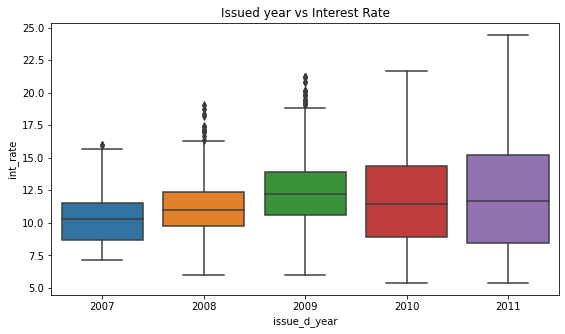

In [148]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=data.issue_d_year, y=data.int_rate, data=data)
plt.title('Issued year vs Interest Rate')


Observations:
As the years of business increase the interest rates are getting more diversed but median of of interest rate is quite same in all the years.

# annual_inc

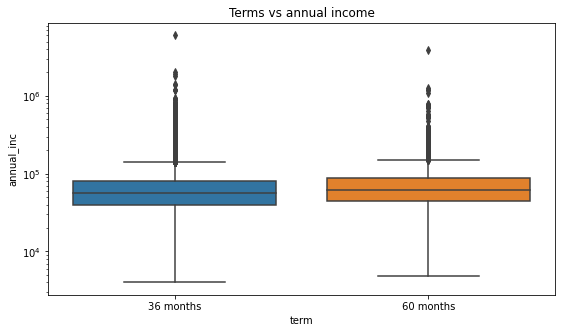

In [149]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.annual_inc, data=data)
plt.title('Terms vs annual income')
plt.yscale('log')

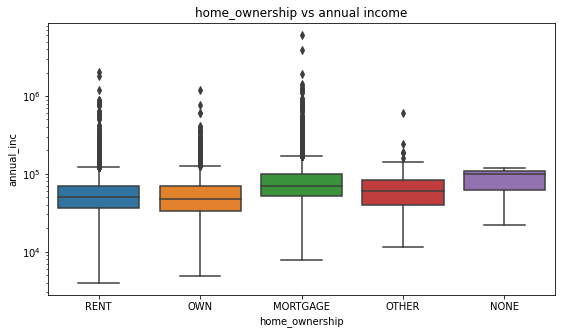

In [150]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.annual_inc, data=data)
plt.title('home_ownership vs annual income')
plt.yscale('log')

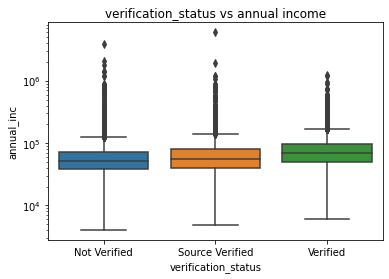

In [151]:
plt.title('verification_status vs annual income')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.annual_inc, order = verification_status_ord, data=data)
plt.yscale('log')

Observations:
The home ownership status for MORTAGE has higher income.
The income source was verfied for most of the borrower's who had higher annual incomes.

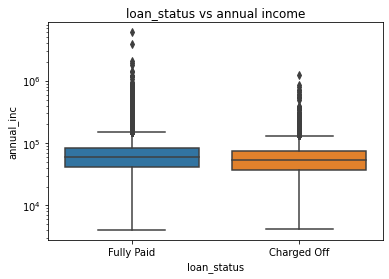

In [152]:
sns.boxplot(x='loan_status', y=data.annual_inc, data=data)
plt.title('loan_status vs annual income')
plt.yscale('log')

Observations:
Current status of the loan is Fully paid for most of the borrower's who had higher annual incomes.

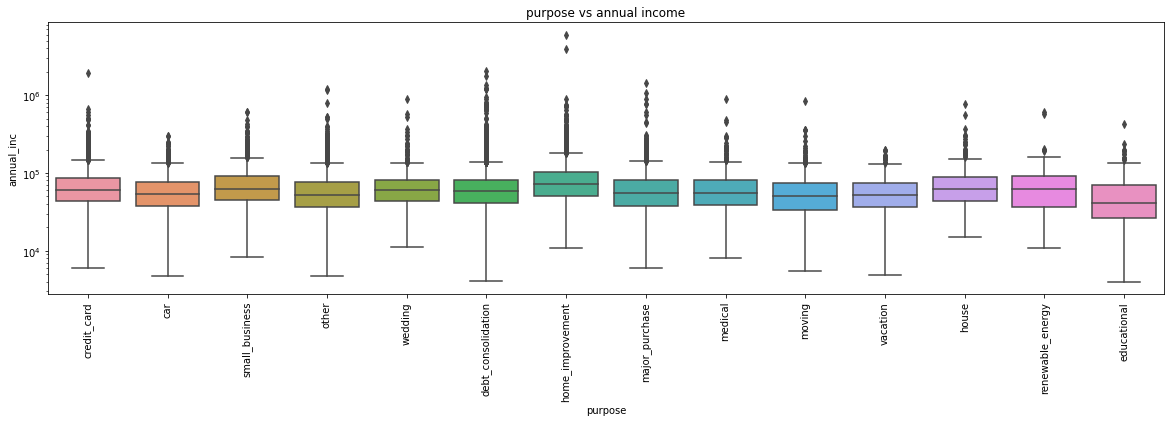

In [153]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.annual_inc, data=data)
plt.xticks(rotation=90)
plt.title('purpose vs annual income')
plt.yscale('log')

Observations:
A category belonging to Renewable energy, small business and home improvements have higher annual income provided by the borrower for the loan request.

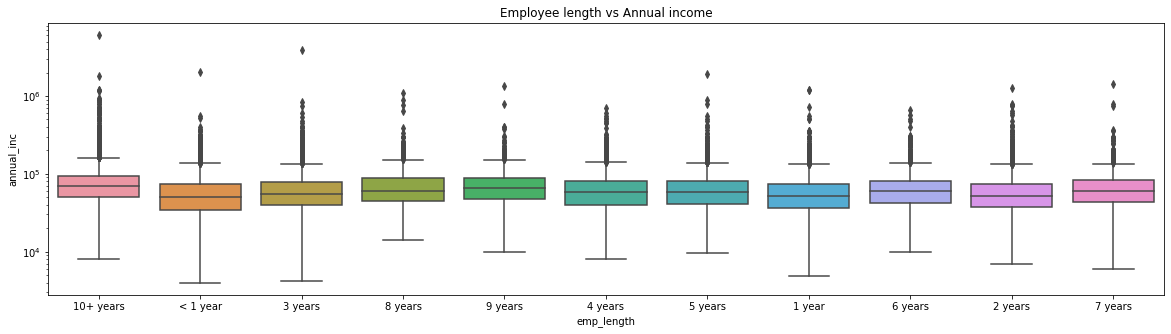

In [154]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.annual_inc, data=data)
plt.title('Employee length vs Annual income')
plt.yscale('log')

Observations:
The borrower's who has higer income have taken loans for 10+ years of duration.

# DTI-
A low debt-to-income (DTI) ratio demonstrates a good balance between debt and income. Conversely, a high DTI ratio can signal that an individual has too much debt for the amount of income earned each month. Typically, borrowers with low debt-to-income ratios are likely to manage their monthly debt payments effectively. As a result, banks and financial credit providers want to see low DTI ratios before issuing loans to a potential borrower.

<AxesSubplot:title={'center':'Grade vs dti'}, xlabel='grade', ylabel='dti'>

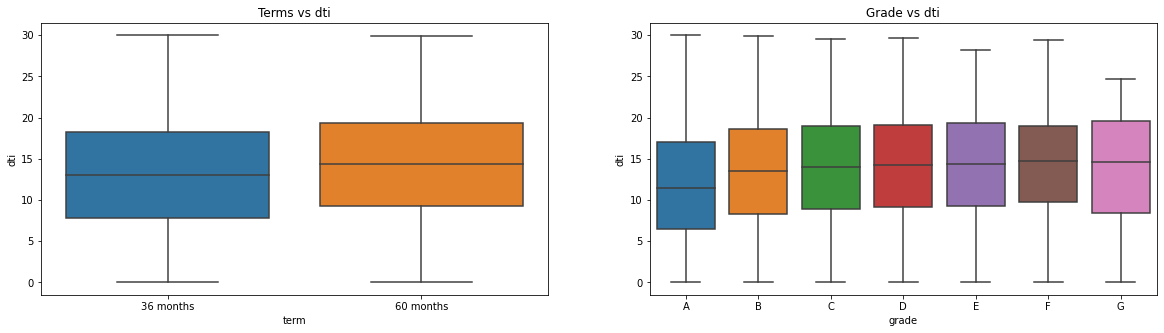

In [155]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.dti, data=data)
plt.title('Terms vs dti')
plt.subplot(122)
plt.title('Grade vs dti')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.dti, order = grade_ord, data=data)

Observation:
DTI is bit high for people who got more tenure i.e., 60 months.
A Grade barrowers are having low DTI than Other grades. DTI should be low for having high repayment percentage.

Text(0.5, 1.0, 'loan_status vs dti')

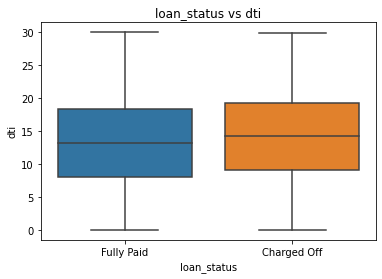

In [156]:
sns.boxplot(x='loan_status', y=data.dti, data=data)
plt.title('loan_status vs dti')

Observations
Borrowers with high DTI has bit more probability to default

Text(0.5, 1.0, 'purpose vs dti')

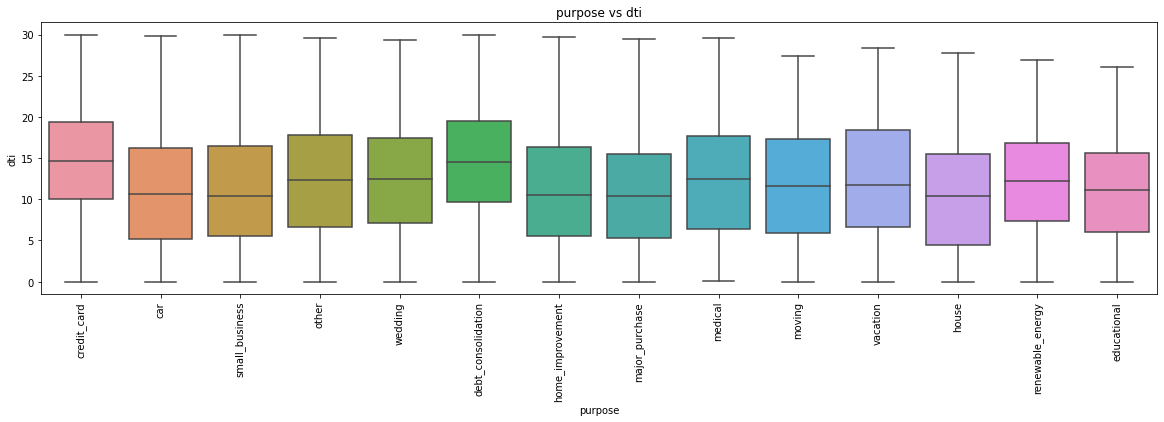

In [157]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.dti, data=data)
plt.xticks(rotation=90)
plt.title('purpose vs dti')

Observations:
People who took loan for credit card and debt consolidation purpose has more DTI than other purposes.

# pub_rec
Number of derogatory public records

In [158]:
data['pub_rec'].value_counts()

0    36507
1     2013
2       48
3        7
4        2
Name: pub_rec, dtype: int64

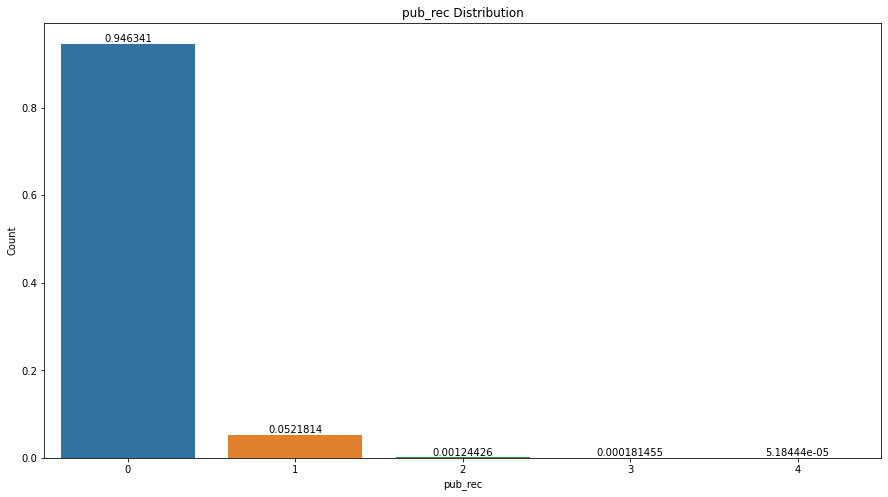

In [159]:
plt.figure(figsize=(15,8))

var = 'pub_rec'

df = data[var].value_counts(normalize=True).reset_index()

ax= sns.barplot(x='index', y=var, data=df)
plt.xlabel(var)
plt.ylabel('Count')
plt.title(var+' Distribution')



for i in ax.containers:
    ax.bar_label(i,)

plt.show()

In [160]:
pivot = data.pivot_table(index =['pub_rec'],
                       values = ['term'],aggfunc='count').sort_values(by=['term'],ascending=False)
                       
print(pivot)

          term
pub_rec       
0        36507
1         2013
2           48
3            7
4            2


In [161]:
df1 = data.groupby(['pub_rec', 'term'], as_index=True)['id'].count()

In [162]:
df1

pub_rec  term     
0        36 months    27582
         60 months     8925
1        36 months     1467
         60 months      546
2        36 months       38
         60 months       10
3        36 months        7
4        36 months        2
Name: id, dtype: int64

# Observation:
    1. Peopele with high no of derogatory public records  having more prone to repay the loan by 36 months

In [163]:
#Finding proportation of values in each value of category
df = data.groupby(['pub_rec', 'term'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
df

pub_rec       term     id  proportion
0        0  36 months  27582        0.76
1        0  60 months   8925        0.24
2        1  36 months   1467        0.73
3        1  60 months    546        0.27
4        2  36 months     38        0.79
5        2  60 months     10        0.21
6        3  36 months      7        1.00
7        4  36 months      2        1.00

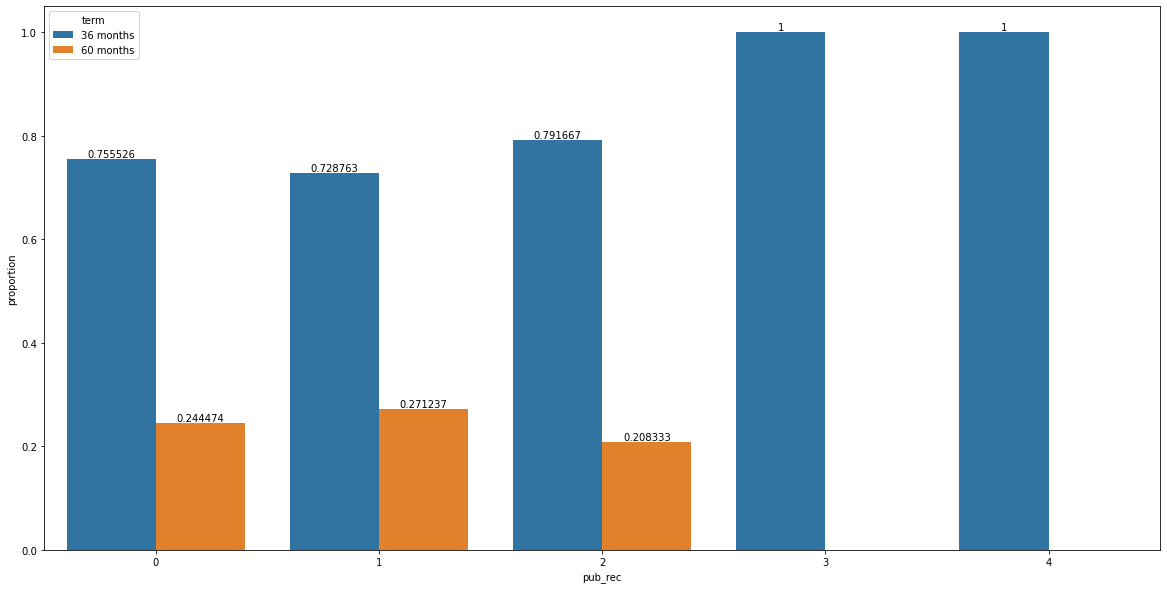

In [164]:
plt.figure(figsize=(20,10))



ax= sns.barplot(x='pub_rec', y='proportion', hue='term', data=df)

for i in ax.containers:
    ax.bar_label(i,)



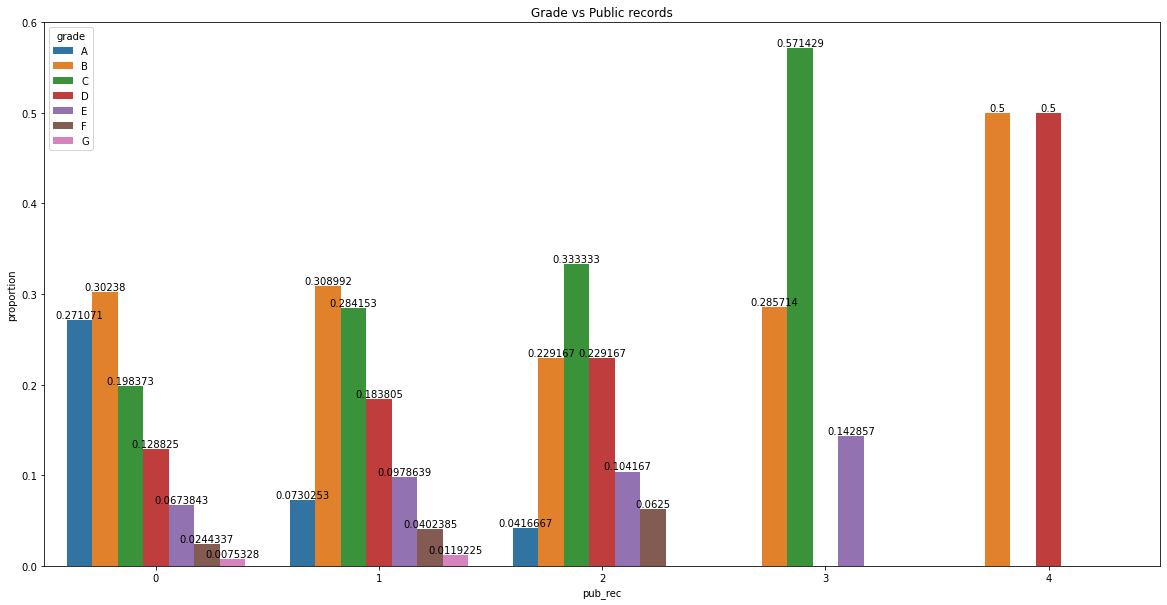

In [165]:
plt.figure(figsize=(20,10))

plt.title('Terms vs Public records')

df = data.groupby(['pub_rec', 'grade'], as_index=False)['id'].count()

df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())


plt.title('Grade vs Public records')


ax = sns.barplot(x='pub_rec', y='proportion', hue='grade', data=df)

for i in ax.containers:
    ax.bar_label(i,)

Observation:
    1. Grade B,C,D,E borrowers are having high no of derogatory records.

Text(0.5, 0.98, 'loan status vs Public records')

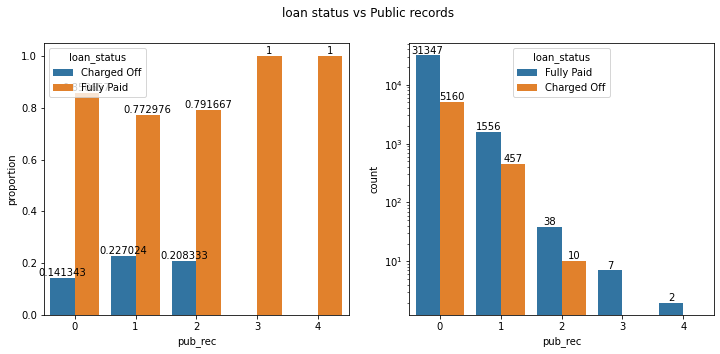

In [166]:
#Proportion of values for each category
df = data.groupby(['pub_rec', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())

plt.figure(figsize=(12,5))
plt.subplot(121)
ax= sns.barplot(x='pub_rec', y='proportion', hue='loan_status', data=df)

for i in ax.containers:
    ax.bar_label(i,)

plt.subplot(122)
ax= sns.countplot(data.pub_rec, hue='loan_status', data=data)
plt.yscale('log')

for i in ax.containers:
    ax.bar_label(i,)
    
plt.suptitle('loan status vs Public records')

Observations:
The there is increase in deafulted loans for people with derogatory records from 0 to 2 but it is not there for pub_rec 3 adn 4, this is because there very few people took loans in those pub_rec numbers where are as from most borrowers are in 0 pub_rec category.

# pub_rec_bankruptcies

In [167]:
data['pub_rec_bankruptcies'].value_counts(normalize = True)

0.00   0.96
1.00   0.04
2.00   0.00
Name: pub_rec_bankruptcies, dtype: float64

# Observation:

96% borrowers have 0 record of bankruptcies

Text(0.5, 1.0, 'loan status vs Public record bankruptcies')

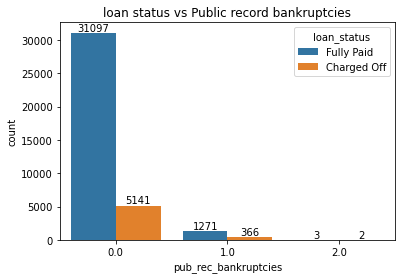

In [168]:
ax= sns.countplot(data.pub_rec_bankruptcies,  hue='loan_status',data=data)

for i in ax.containers:
    ax.bar_label(i,)

plt.title('loan status vs Public record bankruptcies')

In [169]:
df = data.groupby(['pub_rec_bankruptcies', 'loan_status'], as_index=False)['id'].count()

In [170]:
df

pub_rec_bankruptcies  loan_status     id
0                  0.00  Charged Off   5141
1                  0.00   Fully Paid  31097
2                  1.00  Charged Off    366
3                  1.00   Fully Paid   1271
4                  2.00  Charged Off      2
5                  2.00   Fully Paid      3

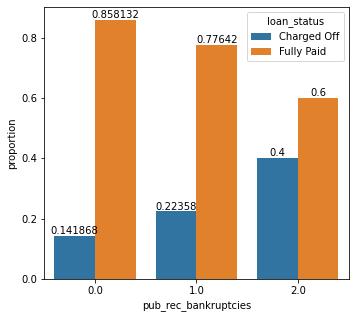

In [171]:
df = data.groupby(['pub_rec_bankruptcies', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec_bankruptcies').transform(lambda x: x/x.sum())

plt.figure(figsize=(12,5))
plt.subplot(121)
ax= sns.barplot(x='pub_rec_bankruptcies', y='proportion', hue='loan_status', data=df)

for i in ax.containers:
    ax.bar_label(i,)

Observation:
    1. Borrowers who are having 0 record of bankruptcies, but failed to pay the loan, are the risky borrowers.

Text(0.5, 1.0, 'Purpose vs Public record bankruptcies')

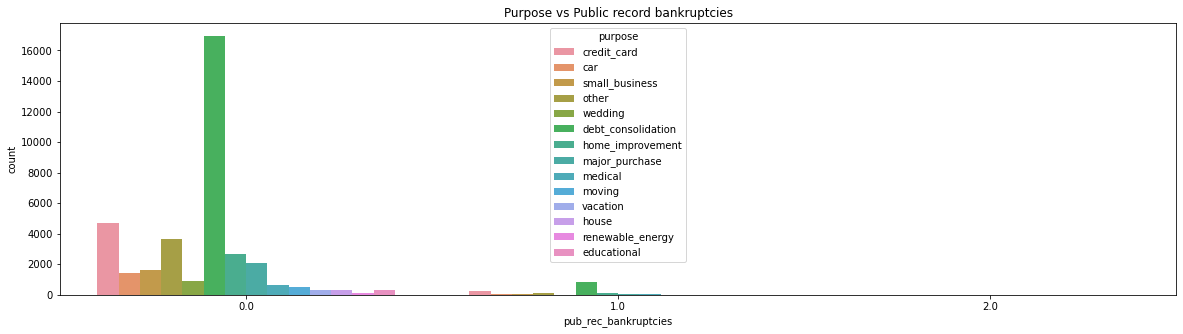

In [172]:
plt.figure(figsize=(20,5))
sns.countplot(data.pub_rec_bankruptcies, hue='purpose', data=data)
plt.title('Purpose vs Public record bankruptcies')

Text(0.5, 1.0, 'Employee length vs Public record bankruptcies')

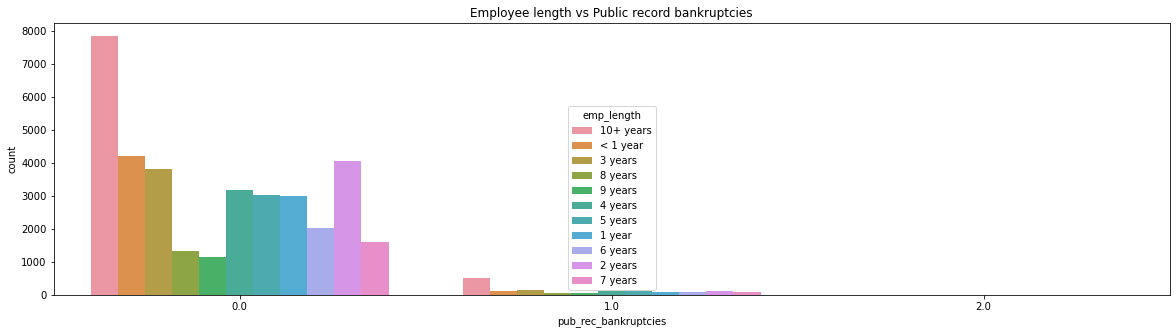

In [173]:

plt.figure(figsize=(20,5))
sns.countplot(data.pub_rec_bankruptcies, hue='emp_length', data=data)
plt.title('Employee length vs Public record bankruptcies')

# inq_last_6mths

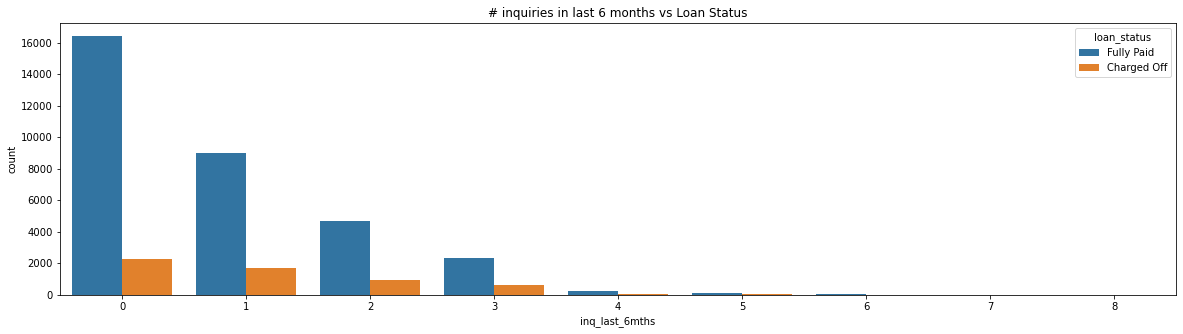

In [174]:
plt.figure(figsize=(20,5))
sns.countplot(data.inq_last_6mths, hue='loan_status', data=data)
plt.title('# inquiries in last 6 months vs Loan Status')
plt.show()

# Approval Loan Amount Ratio

In [175]:
pivot = data.pivot_table(index =['purpose'],
                       values = ['approved_loan_amnt_ratio'],aggfunc='mean').sort_values(by=['approved_loan_amnt_ratio'],ascending=False)
                       
print(pivot)

                    approved_loan_amnt_ratio
purpose                                     
vacation                               96.74
car                                    96.47
major_purchase                         95.49
moving                                 95.38
medical                                95.21
debt_consolidation                     94.03
home_improvement                       93.89
renewable_energy                       93.85
house                                  93.76
wedding                                93.73
other                                  93.45
credit_card                            93.02
small_business                         89.63
educational                            85.01


Observations:
The Funded amount by investors is lower than requested loan amount in education and small business purposes.

In [176]:
pivot = data.pivot_table(index =['home_ownership'],
                       values = ['approved_loan_amnt_ratio'],aggfunc='mean').sort_values(by=['approved_loan_amnt_ratio'],ascending=False)
                       
print(pivot)

                approved_loan_amnt_ratio
home_ownership                          
OWN                                94.71
RENT                               93.86
MORTGAGE                           93.68
OTHER                              72.43
NONE                               39.48


# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Bivariate Analysis

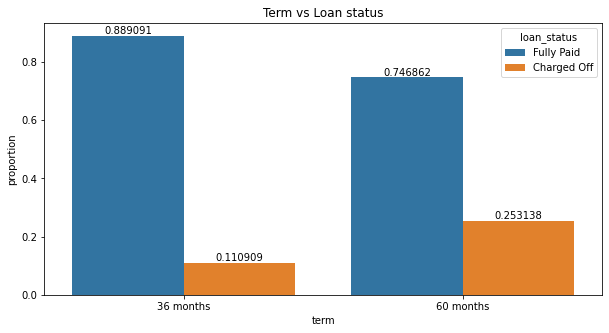

In [177]:
plt.figure(figsize=(10,5))

#Proportion of values for each category
df = data.groupby(['term', 'loan_status'], as_index=False)['id'].count()

df['proportion'] = df.groupby('term').transform(lambda x: x/x.sum())

ax= sns.barplot(x='term', y='proportion', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])

for i in ax.containers:
    ax.bar_label(i,)

plt.title('Term vs Loan status')
plt.show()

Observation:
    1. For 60 month tenure loan, more no of defaulted loan observed.

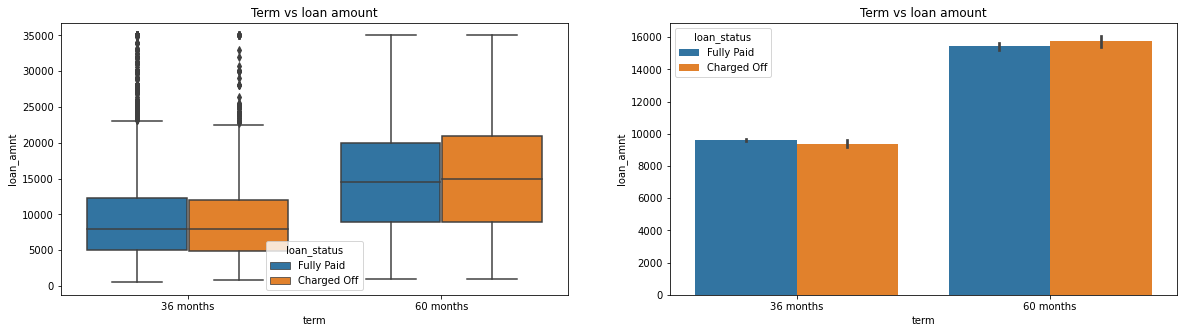

In [178]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=data)
plt.title('Term vs loan amount')

plt.subplot(122)

ax = sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=data)



plt.title('Term vs loan amount')
plt.show()

# Observations:
Loan amount is not a decider for defaults in both 36 and 60 months.
Borrowers have equal distribtion is both default and non default for 36 and 60 months tenures.

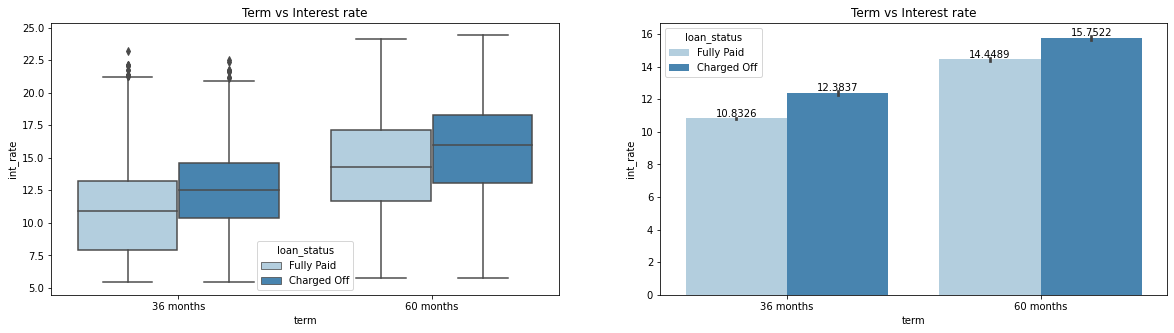

In [179]:
plt.figure(figsize=(20,5))
plt.subplot(121)

sns.boxplot(x='term', y='int_rate', hue='loan_status', data=data,palette = "Blues")



plt.title('Term vs Interest rate')
plt.subplot(122)


ax= sns.barplot(x='term', y='int_rate', hue='loan_status', data=data, estimator=np.mean,palette = "Blues")


for i in ax.containers:
    ax.bar_label(i,)

plt.title('Term vs Interest rate')
plt.show()

# Observations
For higher interest rates the deafult rate is higher in both 36 and 60 months tenure.

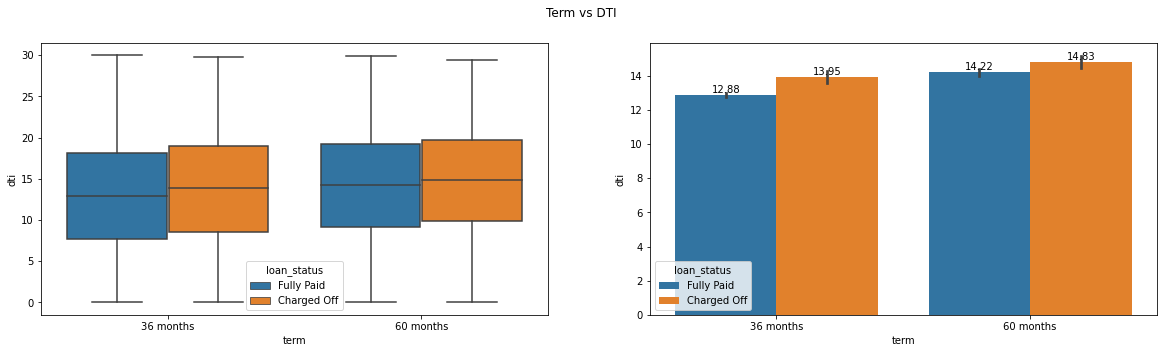

In [180]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='dti', hue='loan_status', data=data)
plt.subplot(122)


ax= sns.barplot(x='term', y='dti', hue='loan_status', data=data, estimator=np.median)


for i in ax.containers:
    ax.bar_label(i,)

plt.suptitle('Term vs DTI')
plt.show()

# Observation:
    
1. For both the tenure, DTI is high for Charged off loan

# Grade

Text(0.5, 1.0, 'Grade vs Loan status')

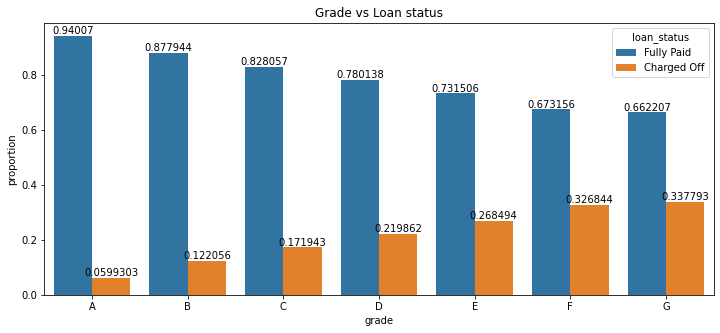

In [181]:
df = data.groupby(['grade', 'loan_status'], as_index=False)['id'].count()

#calculation proportion in each Grade Category

df['proportion'] = df.groupby('grade').transform(lambda x: x/x.sum())

plt.figure(figsize=(12,5))
ax= sns.barplot(x='grade', y='proportion', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])

for i in ax.containers:
    ax.bar_label(i,)
plt.title('Grade vs Loan status')

In [182]:
df

grade  loan_status     id  proportion
0      A  Charged Off    602        0.06
1      A   Fully Paid   9443        0.94
2      B  Charged Off   1425        0.12
3      B   Fully Paid  10250        0.88
4      C  Charged Off   1347        0.17
5      C   Fully Paid   6487        0.83
6      D  Charged Off   1118        0.22
7      D   Fully Paid   3967        0.78
8      E  Charged Off    715        0.27
9      E   Fully Paid   1948        0.73
10     F  Charged Off    319        0.33
11     F   Fully Paid    657        0.67
12     G  Charged Off    101        0.34
13     G   Fully Paid    198        0.66

# Observation:
    1. With increasing Grade, Charged Off Loan is high

In [183]:
#Sorting Grades from A to G
grade_ord = data.grade.unique()
grade_ord.sort()

In [184]:
grade_ord

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

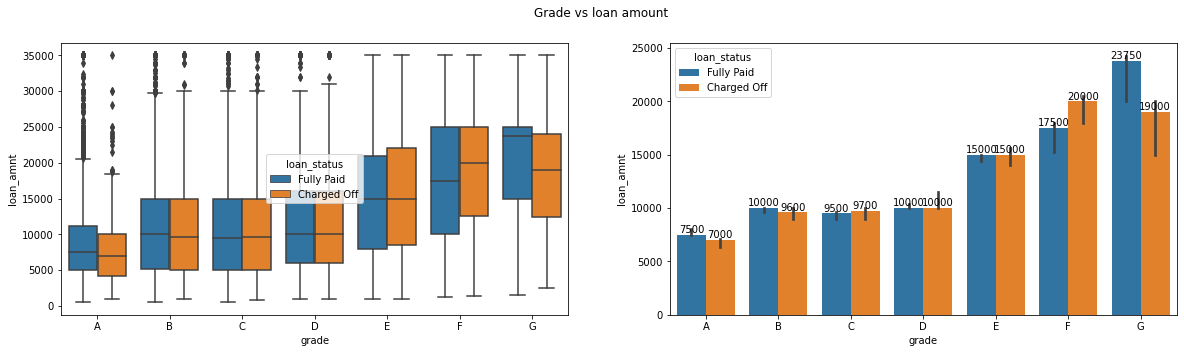

In [185]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='loan_amnt', hue='loan_status', data=data,order = grade_ord)



plt.subplot(122)
ax= sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=data, estimator=np.median,order = grade_ord)


for i in ax.containers:
    ax.bar_label(i,)
    
plt.suptitle('Grade vs loan amount')
plt.show()

# Observations:

For  grades 'F' and 'G' there are more difference between charged-off and fully paid.
For Grade A to G, High amount of loan has been taken and they are more prone to default.

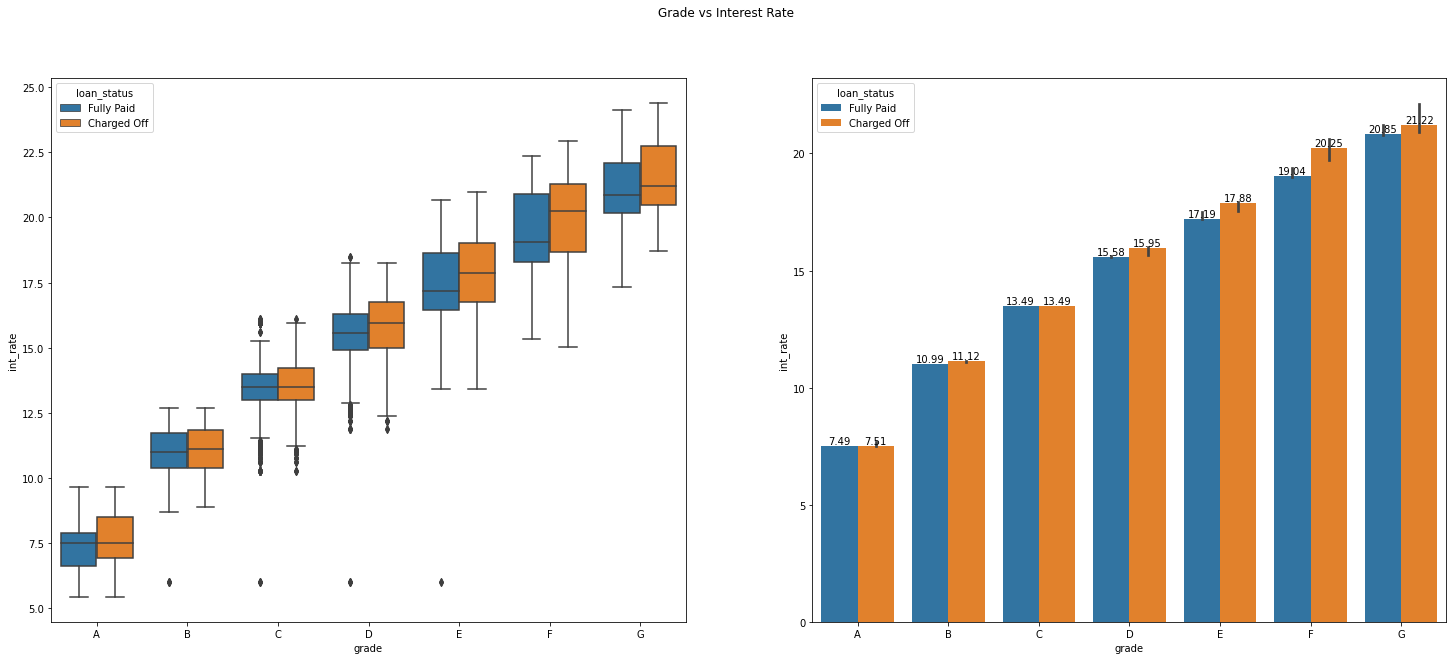

In [186]:
plt.figure(figsize=(25,10))
plt.subplot(121)
sns.boxplot(x='grade', y='int_rate', hue='loan_status', data=data, order = grade_ord)

plt.subplot(122)


ax= sns.barplot(x='grade', y='int_rate', hue='loan_status', data=data, order = grade_ord, estimator=np.median)

for i in ax.containers:
    ax.bar_label(i,)


plt.suptitle('Grade vs Interest Rate')
plt.show()

# Observations:
From grade A to G, Loan amount and the interest rate gradually increases. and they are more and more prone to default the loan.

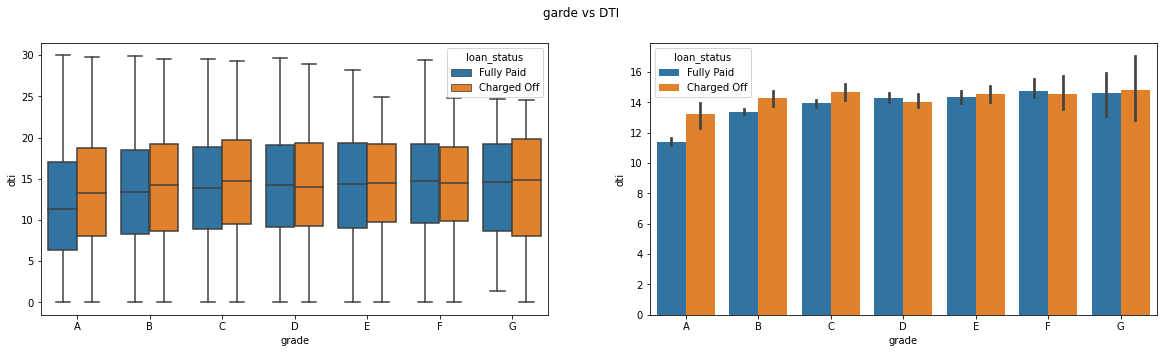

In [187]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='dti', hue='loan_status', data=data, order=grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='dti', hue='loan_status', data=data, estimator=np.median, order = grade_ord)
plt.suptitle('garde vs DTI')
plt.show()

# Observations:
No trend observed

# Employment Length

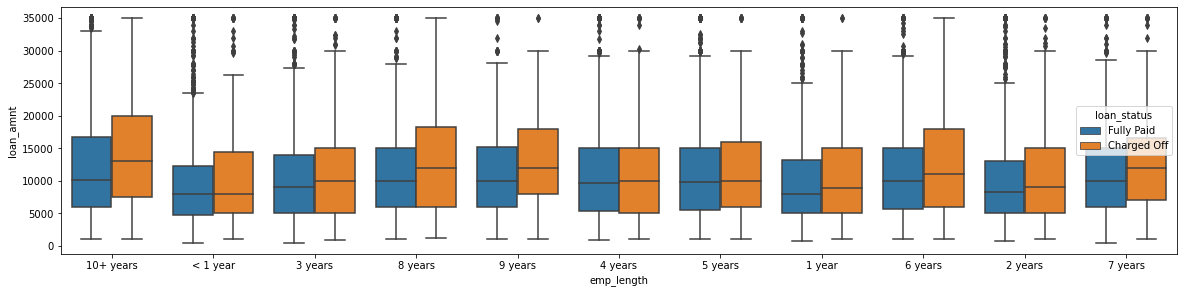

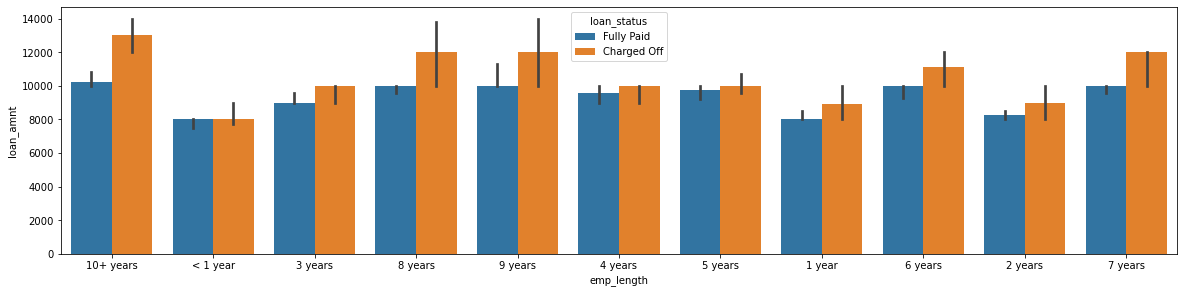

In [188]:
plt.figure(figsize=(20,10))
plt.subplot(211)
sns.boxplot(x='emp_length', y='loan_amnt', hue='loan_status', data=data)
plt.figure(figsize=(20,10))
plt.subplot(212)
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.show()

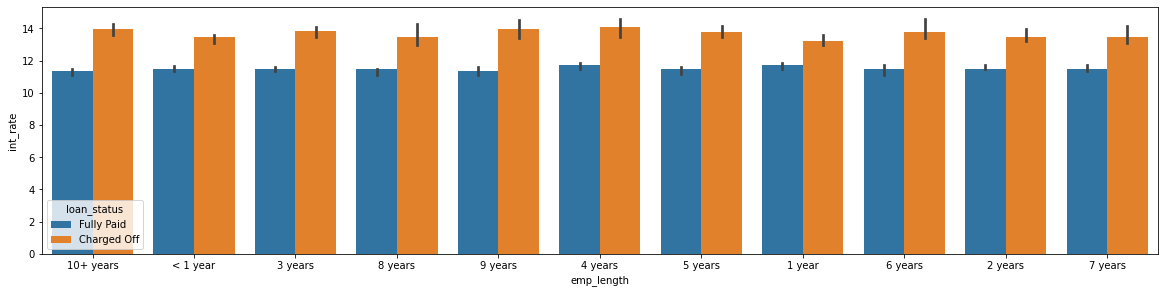

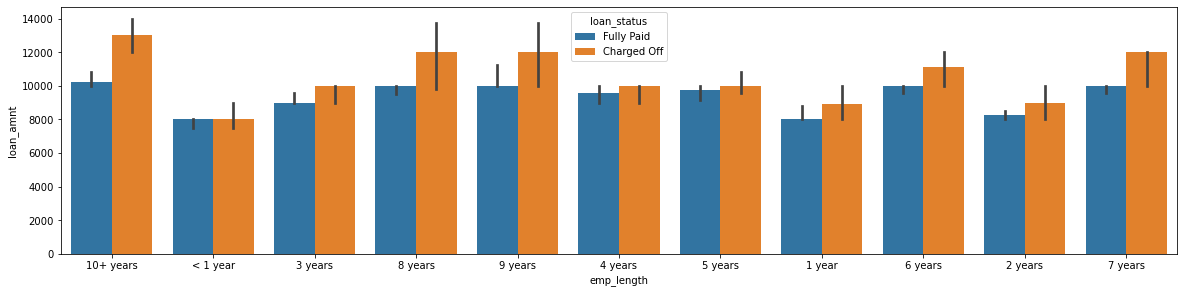

In [189]:
plt.figure(figsize=(20,10))
plt.subplot(211)
sns.barplot(x='emp_length', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.figure(figsize=(20,10))
plt.subplot(212)
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.show()

# Observation:
    though for in any emp length group,loan amount difference is not much higher for Fully paid and Charged off loans but   interest rate for all emp length group for charged off loan is high.Irrespictive of employment length loans with more interest rates got defaulted more.

# Home Ownership

Text(0.5, 1.0, 'Home Ownership vs Loan status')

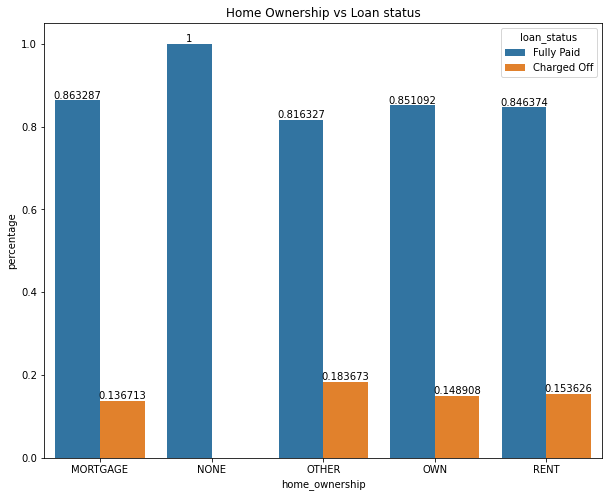

In [190]:
df = data.groupby(['home_ownership', 'loan_status'], as_index=False)['id'].count()

df['percentage'] = df.groupby('home_ownership').transform(lambda x: x/x.sum())

plt.figure(figsize=(10,8))
ax= sns.barplot(x='home_ownership', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])

for i in ax.containers:
    ax.bar_label(i,)

plt.title('Home Ownership vs Loan status')

# Observation:
    1. Home Ownership other is having high charged off loan percentage

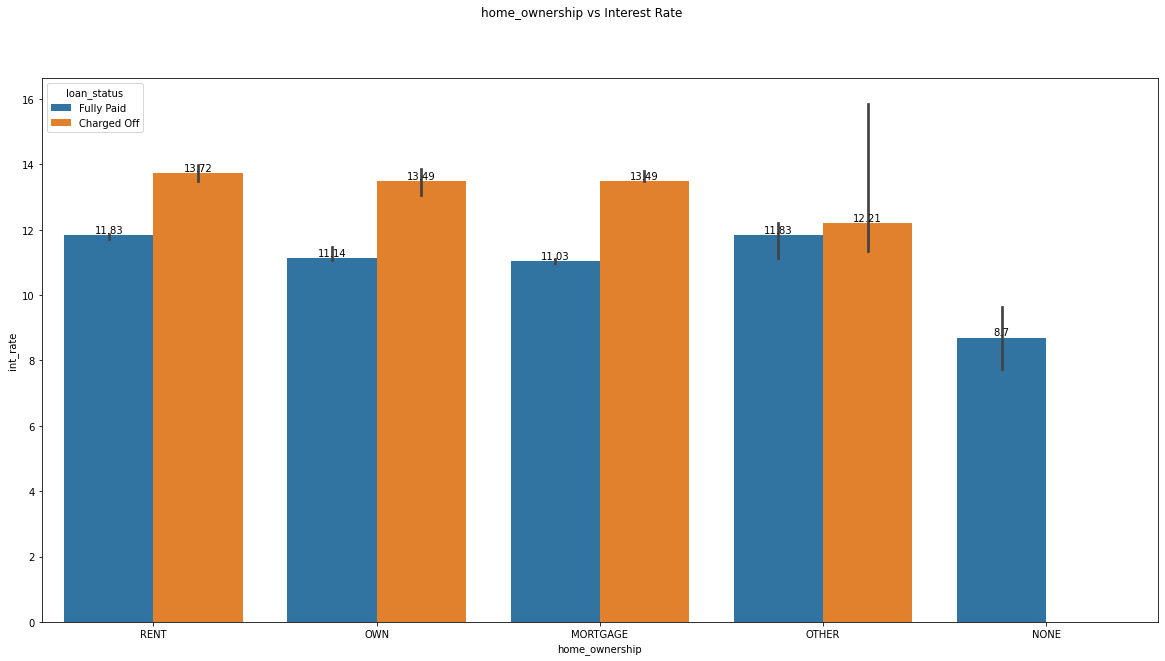

In [191]:
plt.figure(figsize=(20,10))

ax= sns.barplot(x='home_ownership', y='int_rate', hue='loan_status', data=data, estimator=np.median)
for i in ax.containers:
    ax.bar_label(i,)

plt.suptitle('home_ownership vs Interest Rate')
plt.show()

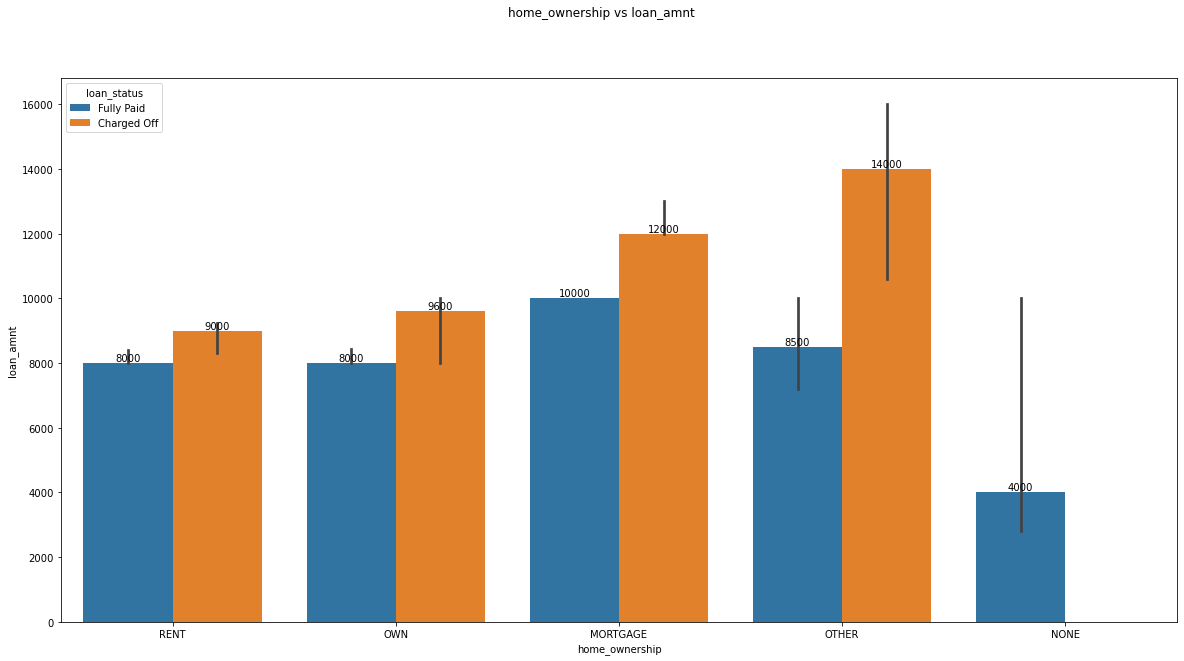

In [192]:
plt.figure(figsize=(20,10))

ax= sns.barplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)

for i in ax.containers:
    ax.bar_label(i,)

plt.suptitle('home_ownership vs loan_amnt')
plt.show()

# Observation:
    
    1. Loan amount difference value between Home ownership:other group is most also default amount is also highest

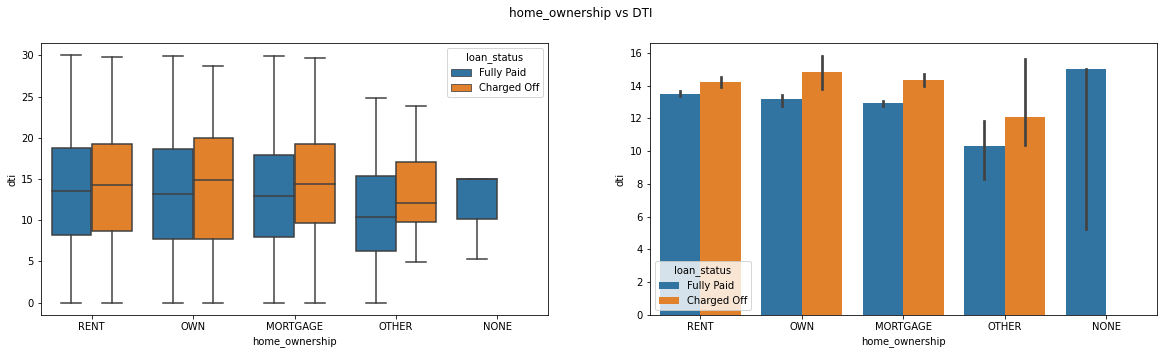

In [193]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='dti', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='home_ownership', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('home_ownership vs DTI')
plt.show()

# Observations:

1. Borrowers in other home ownership category has less dti than other categories.A low debt-to-income (DTI) ratio demonstrates a good balance between debt and income.But other Home ownership group has more amount of defaulted loan amount
2. There is equal posibility of home owners defaulting for all the home ownerships.

# Address State

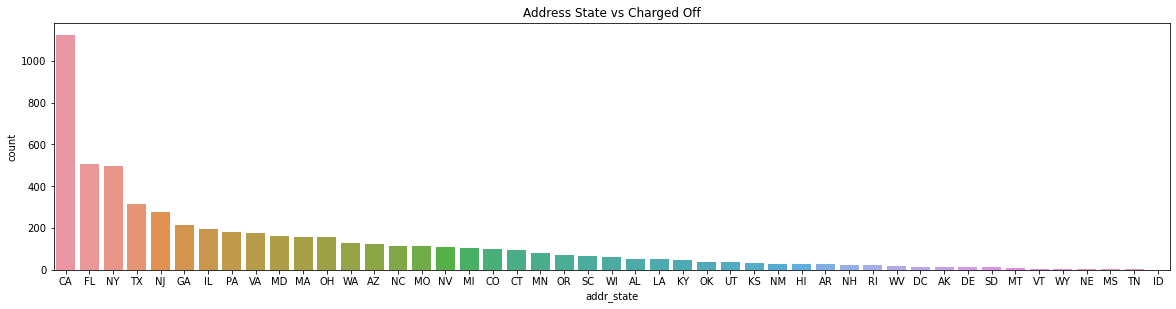

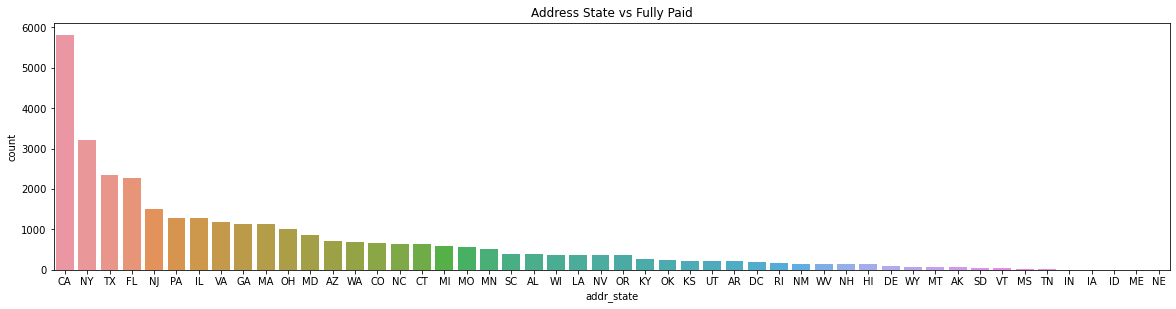

In [194]:
charged_off_df = data[data.loan_status.values == 'Charged Off']
plt.figure(figsize=(20,10))
plt.subplot(211)
sns.countplot(x='addr_state', data=charged_off_df, order=charged_off_df.addr_state.value_counts().index)
plt.title('Address State vs Charged Off')

fp_df = data[data.loan_status.values == 'Fully Paid']
plt.figure(figsize=(20,10))
plt.subplot(212)
sns.countplot(x='addr_state', data=fp_df, order=fp_df.addr_state.value_counts().index)
plt.title('Address State vs Fully Paid')
plt.show()

# Observations:
More number of borrowers defaulted in CA , FL and NY states.

# Verfication Status

Text(0.5, 1.0, 'Grade vs Loan status')

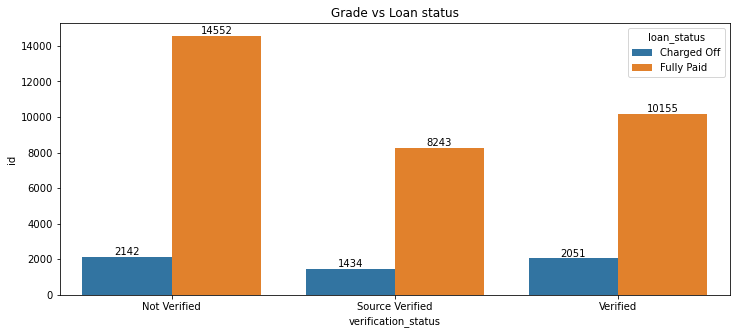

In [195]:
df = data.groupby(['verification_status', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('verification_status').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
ax= sns.barplot(x='verification_status', y='id', hue='loan_status', data=df)


for i in ax.containers:
    ax.bar_label(i,)


plt.title('Grade vs Loan status')

In [196]:
df

verification_status  loan_status     id  percentage
0        Not Verified  Charged Off   2142        0.13
1        Not Verified   Fully Paid  14552        0.87
2     Source Verified  Charged Off   1434        0.15
3     Source Verified   Fully Paid   8243        0.85
4            Verified  Charged Off   2051        0.17
5            Verified   Fully Paid  10155        0.83

# Observation:
    1. Not much difference observed for charged off loans in each verification status group.

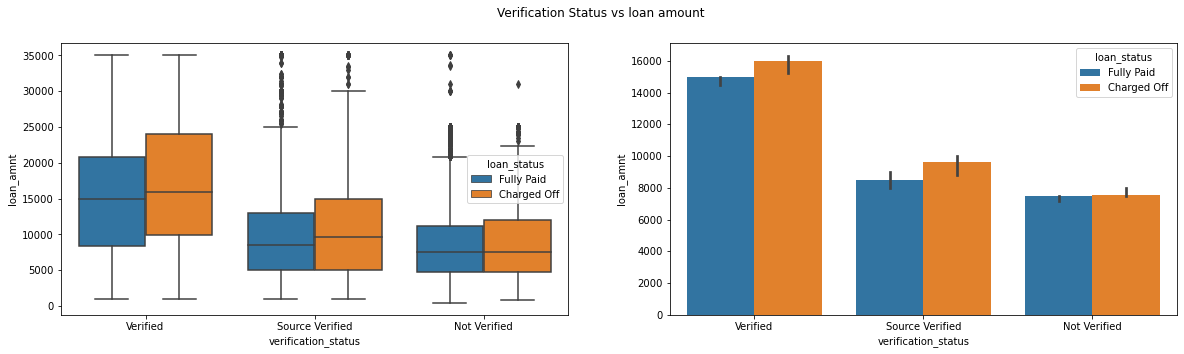

In [197]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='loan_amnt', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='verification_status', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('Verification Status vs loan amount')
plt.show()

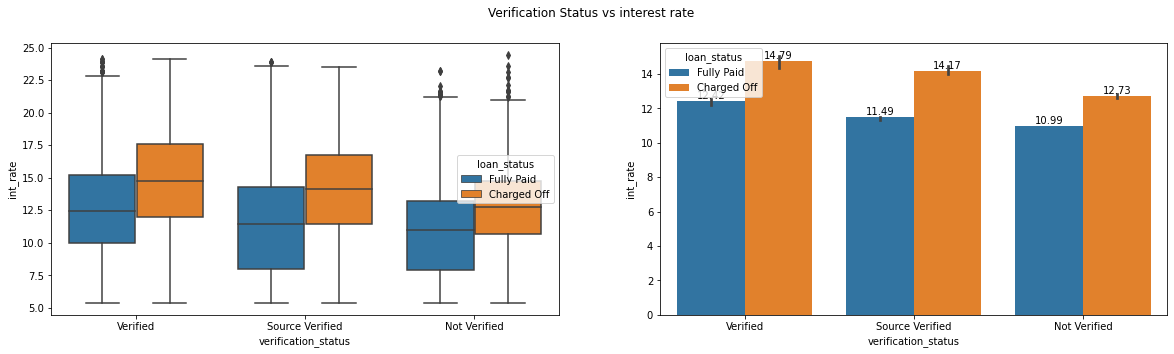

In [198]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='int_rate', hue='loan_status', data=data)
plt.subplot(122)
ax= sns.barplot(x='verification_status', y='int_rate', hue='loan_status', data=data, estimator=np.median)


for i in ax.containers:
    ax.bar_label(i,)

plt.suptitle('Verification Status vs interest rate')
plt.show()

# Observations:
Irrespective of verification status higher interest rates are incurring default of loan.

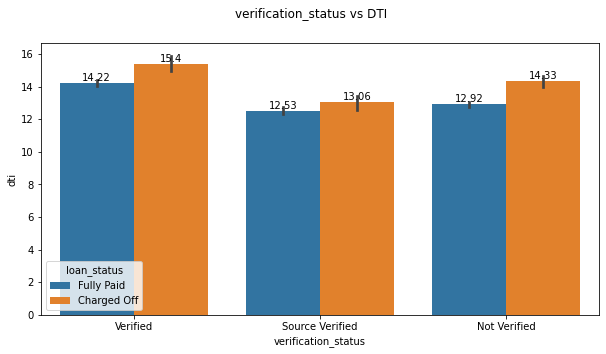

In [199]:
plt.figure(figsize=(10,5))

ax= sns.barplot(x='verification_status', y='dti', hue='loan_status', data=data, estimator=np.median)

for i in ax.containers:
    ax.bar_label(i,)
    
plt.suptitle('verification_status vs DTI')
plt.show()

# Observations:
There is slight increase in the dti mean for defaulted laons for all the verification status categories.

# Purpose

Text(0.5, 1.0, 'Purpose vs Loan status (Charged Off)')

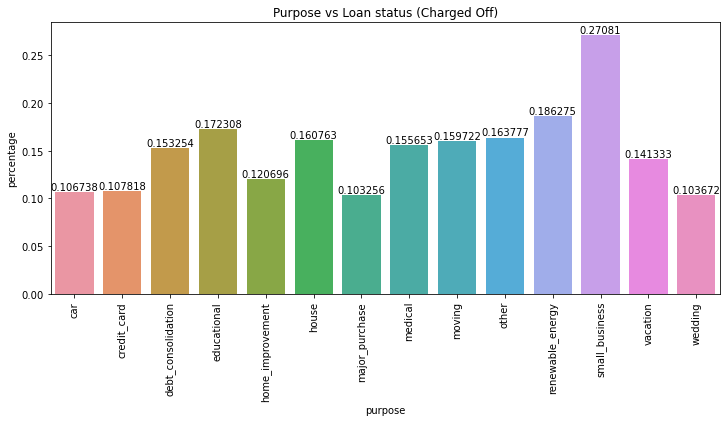

In [200]:
df = data.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('purpose').transform(lambda x: x/x.sum())
df = df[df.loan_status == 'Charged Off']

plt.figure(figsize=(12,5))
ax= sns.barplot(x='purpose', y='percentage', data=df)

for i in ax.containers:
    ax.bar_label(i,)

plt.xticks(rotation=90)
plt.title('Purpose vs Loan status (Charged Off)')

Text(0.5, 1.0, 'Purpose vs Loan status (Fully Paid)')

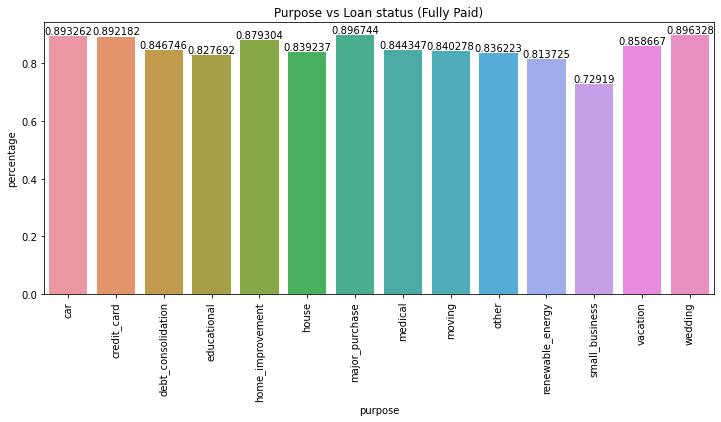

In [201]:
df = data.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('purpose').transform(lambda x: x/x.sum())
df = df[df.loan_status == 'Fully Paid']

plt.figure(figsize=(12,5))
ax= sns.barplot(x='purpose', y='percentage', data=df)

for i in ax.containers:
    ax.bar_label(i,)

plt.xticks(rotation=90)
plt.title('Purpose vs Loan status (Fully Paid)')

# Observations:
Charged-off are higher for small_business comparitively.

<Figure size 432x288 with 0 Axes>

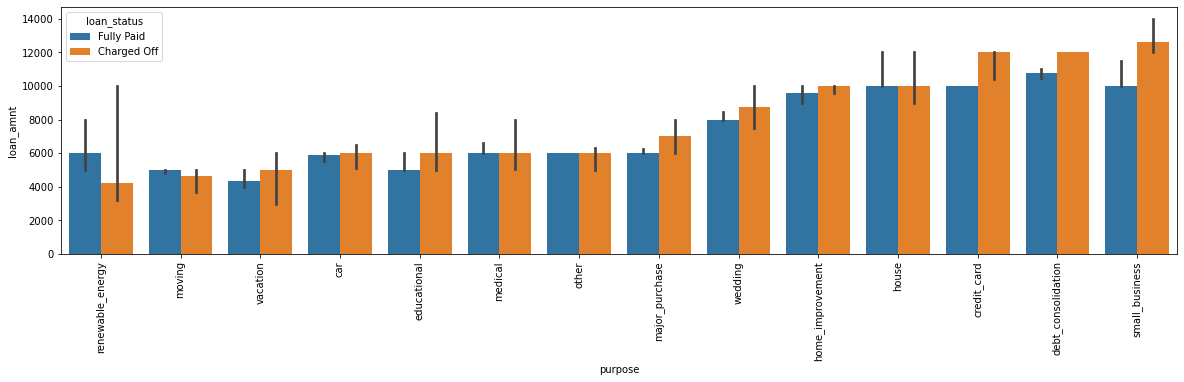

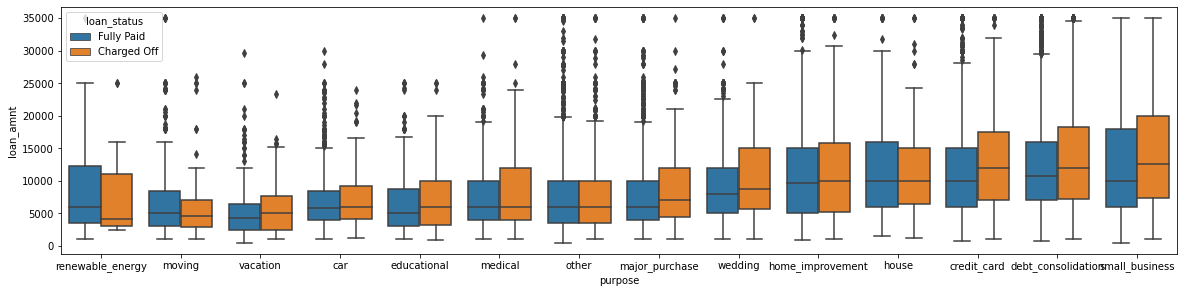

In [202]:
df = data.groupby(['purpose', 'loan_status'], as_index=False)['loan_amnt'].median()

plt.suptitle('Purpose vs loan amount')
plt.figure(figsize=(20,10))
plt.subplot(211)
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', data= data, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose, estimator=np.median)
plt.xticks(rotation=90)

plt.figure(figsize=(20,10))
plt.subplot(212)
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data= data, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose)
plt.show()

# Observations:
Small Business has more defaults when the loan amount is also high.

<Figure size 432x288 with 0 Axes>

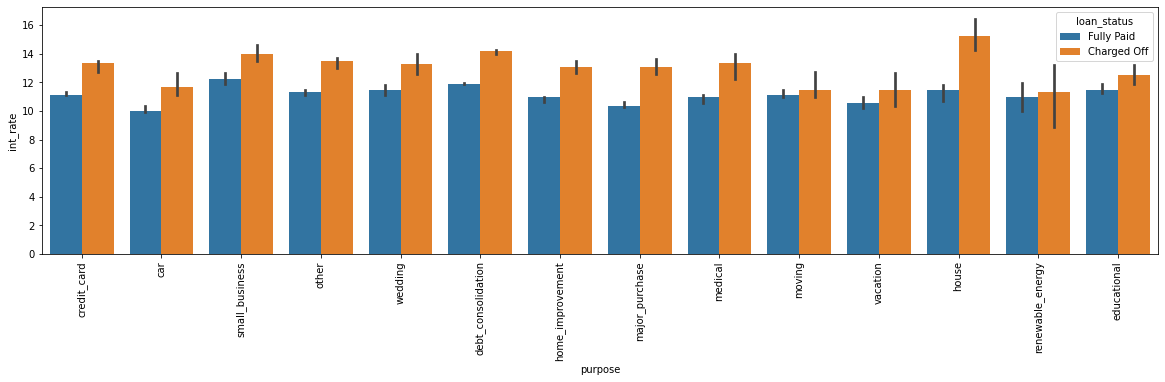

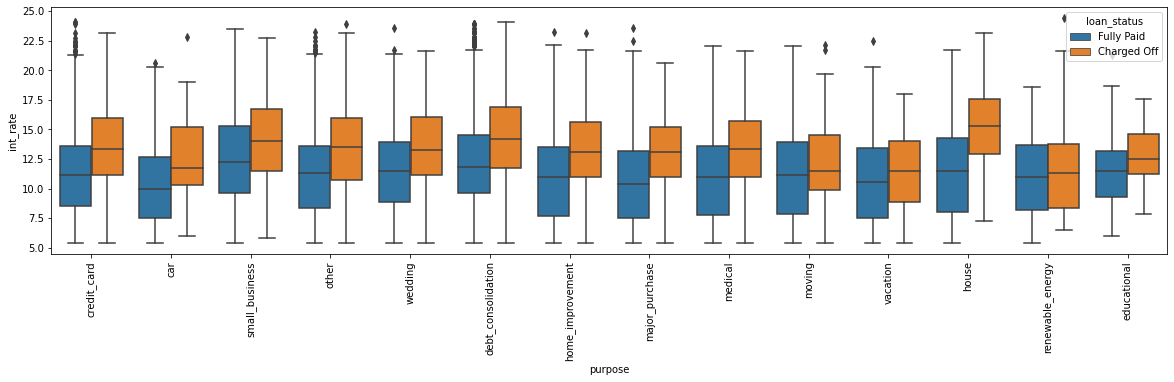

In [203]:
#df = data.groupby(['purpose', 'loan_status'], as_index=False)['int_rate'].median()
#purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='int_rate').purpose

plt.suptitle('Purpose vs interest rate')
plt.figure(figsize=(20,10))
plt.subplot(211)
sns.barplot(x='purpose', y='int_rate', hue='loan_status', data= data, estimator=np.median)
plt.xticks(rotation=90)

plt.figure(figsize=(20,10))
plt.subplot(212)
sns.boxplot(x='purpose', y='int_rate', hue='loan_status', data= data)
plt.xticks(rotation=90)
plt.show()

# Observations:
Home loans with high interest rates are mostly defaulted. Even small business and debt consolidation has similar observation.

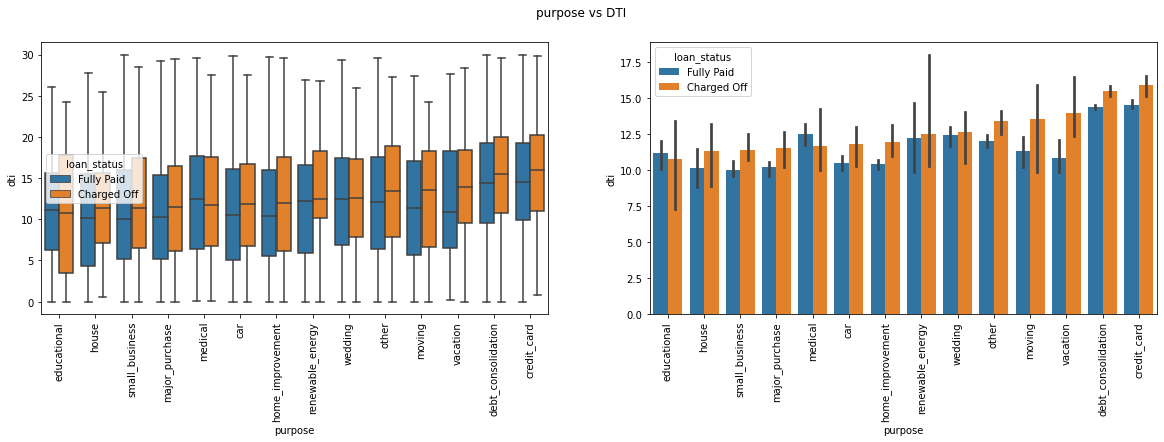

In [204]:
df = data.groupby(['purpose', 'loan_status'], as_index=False)['dti'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='dti').purpose

plt.figure(figsize=(20,5))
plt.suptitle('purpose vs DTI')
plt.subplot(121)
sns.boxplot(x='purpose', y='dti', hue='loan_status', data=data, order=purpose_ord)
plt.xticks(rotation=90)
plt.subplot(122)
sns.barplot(x='purpose', y='dti', hue='loan_status', data=data, estimator=np.median, order = purpose_ord)
plt.xticks(rotation=90)
plt.show()

# Loan Amount vs Interest Rate

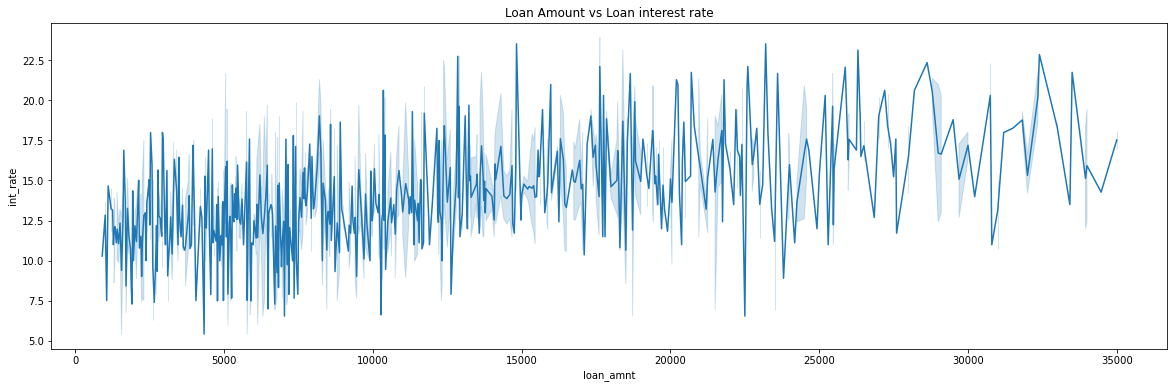

In [205]:
plt.figure(figsize=(20,6))
#scatter plot for analysing distribution
sns.lineplot(x='loan_amnt', y='int_rate', data=data[data.loan_status == 'Charged Off'])
plt.title('Loan Amount vs Loan interest rate')
plt.show()

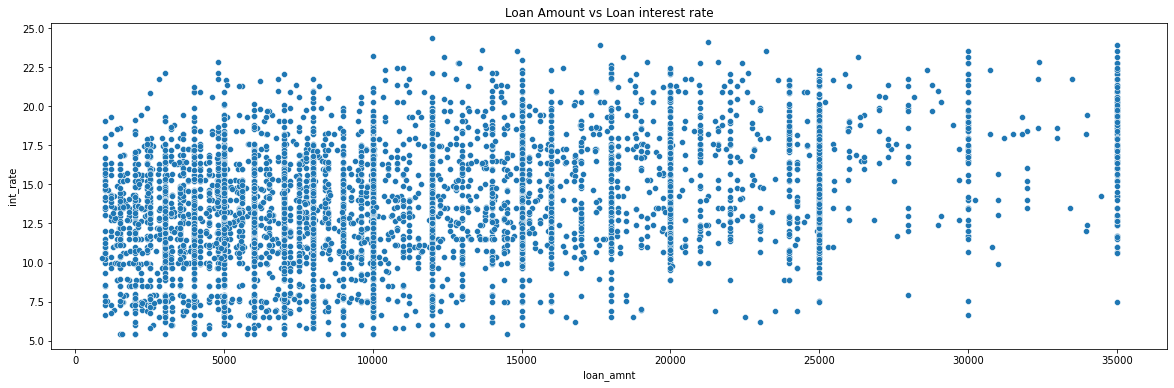

In [206]:
plt.figure(figsize=(20,6))
#scatter plot for analysing distribution
sns.scatterplot(x='loan_amnt', y='int_rate', data=data[data.loan_status == 'Charged Off'])
plt.title('Loan Amount vs Loan interest rate')
plt.show()

# Observartions:
Values are pretty much spread accross all the space. There is not specific pattern found in the spread.

# Loan Amount vs Annual income

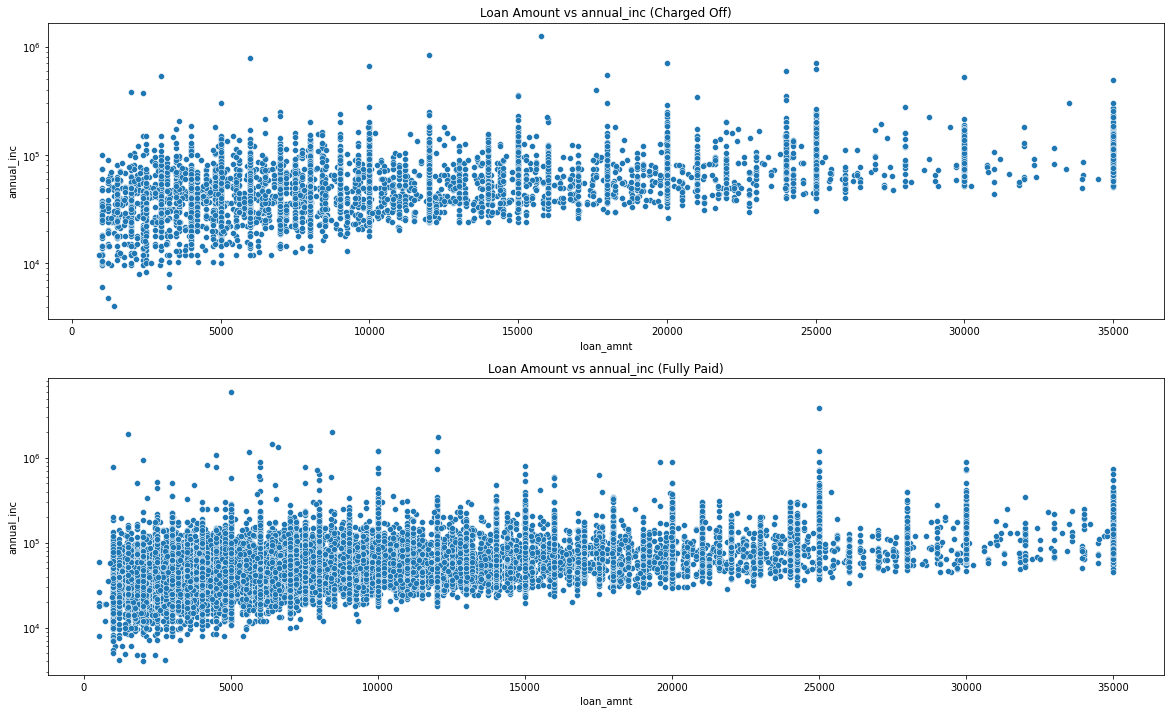

In [207]:
plt.figure(figsize=(20,12))
plt.subplot(211)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=data[data.loan_status == 'Charged Off'])
plt.yscale('log')
plt.title('Loan Amount vs annual_inc (Charged Off)')
plt.subplot(212)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=data[data.loan_status == 'Fully Paid'])
plt.yscale('log')
plt.title('Loan Amount vs annual_inc (Fully Paid)')
plt.show()

# Observations
Both Fully paid and Charged Off loans are having similar pattern versus Annual income

# Loan Amount vs int rate

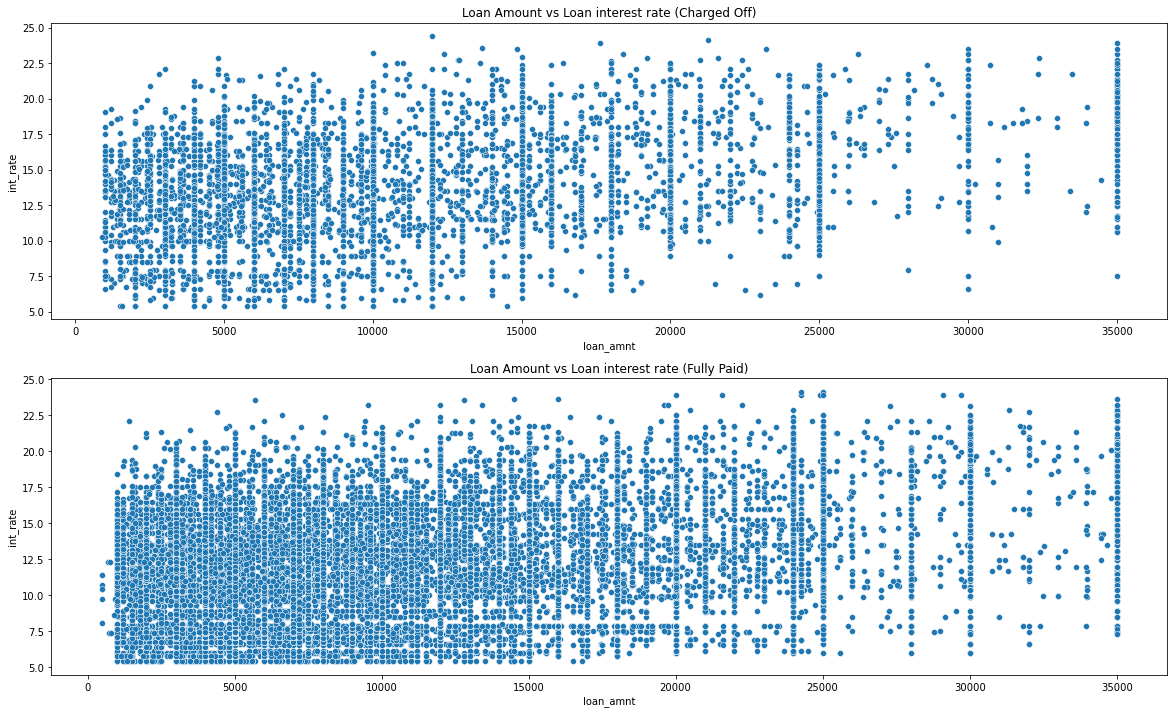

In [208]:
plt.figure(figsize=(20,12))
plt.subplot(211)
sns.scatterplot(x='loan_amnt', y='int_rate', data=data[data.loan_status == 'Charged Off'])
#plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Charged Off)')
plt.subplot(212)
sns.scatterplot(x='loan_amnt', y='int_rate', data=data[data.loan_status == 'Fully Paid'])
#plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Fully Paid)')
plt.show()

# Observations
Both Fully paid and Charged Off loans are having similar pattern versus int_rate

# Loan Amount vs DTI

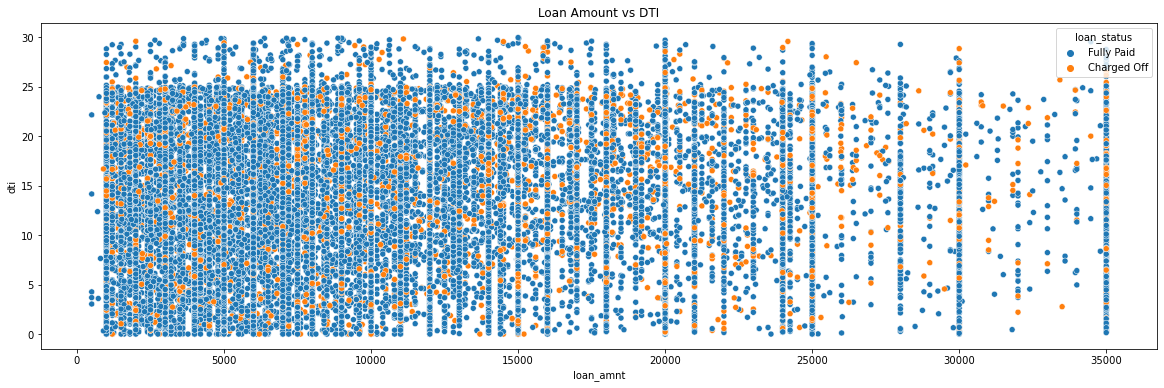

In [209]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='loan_amnt', y='dti', data=data, hue='loan_status')
plt.title('Loan Amount vs DTI')
plt.show()

# Observation:
    1.There is not specific pattern found in the spread

# Interest Rate vs DTI

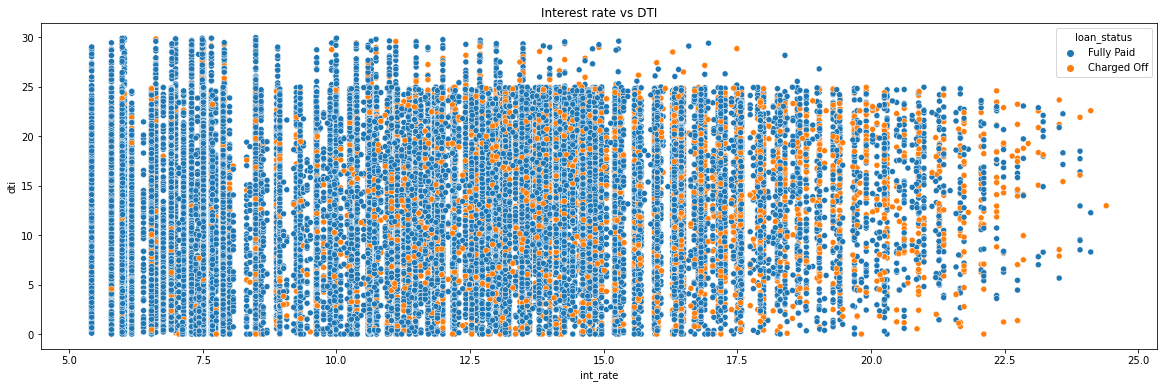

In [210]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='int_rate', y='dti', data=data, hue='loan_status')
plt.title('Interest rate vs DTI')
plt.show()

# Observation:
    1.irrespective of DTI when interest rates are high charged off loans are high.

# Correlation Matrix
Let's find the correlation between the variables/columns of out data set

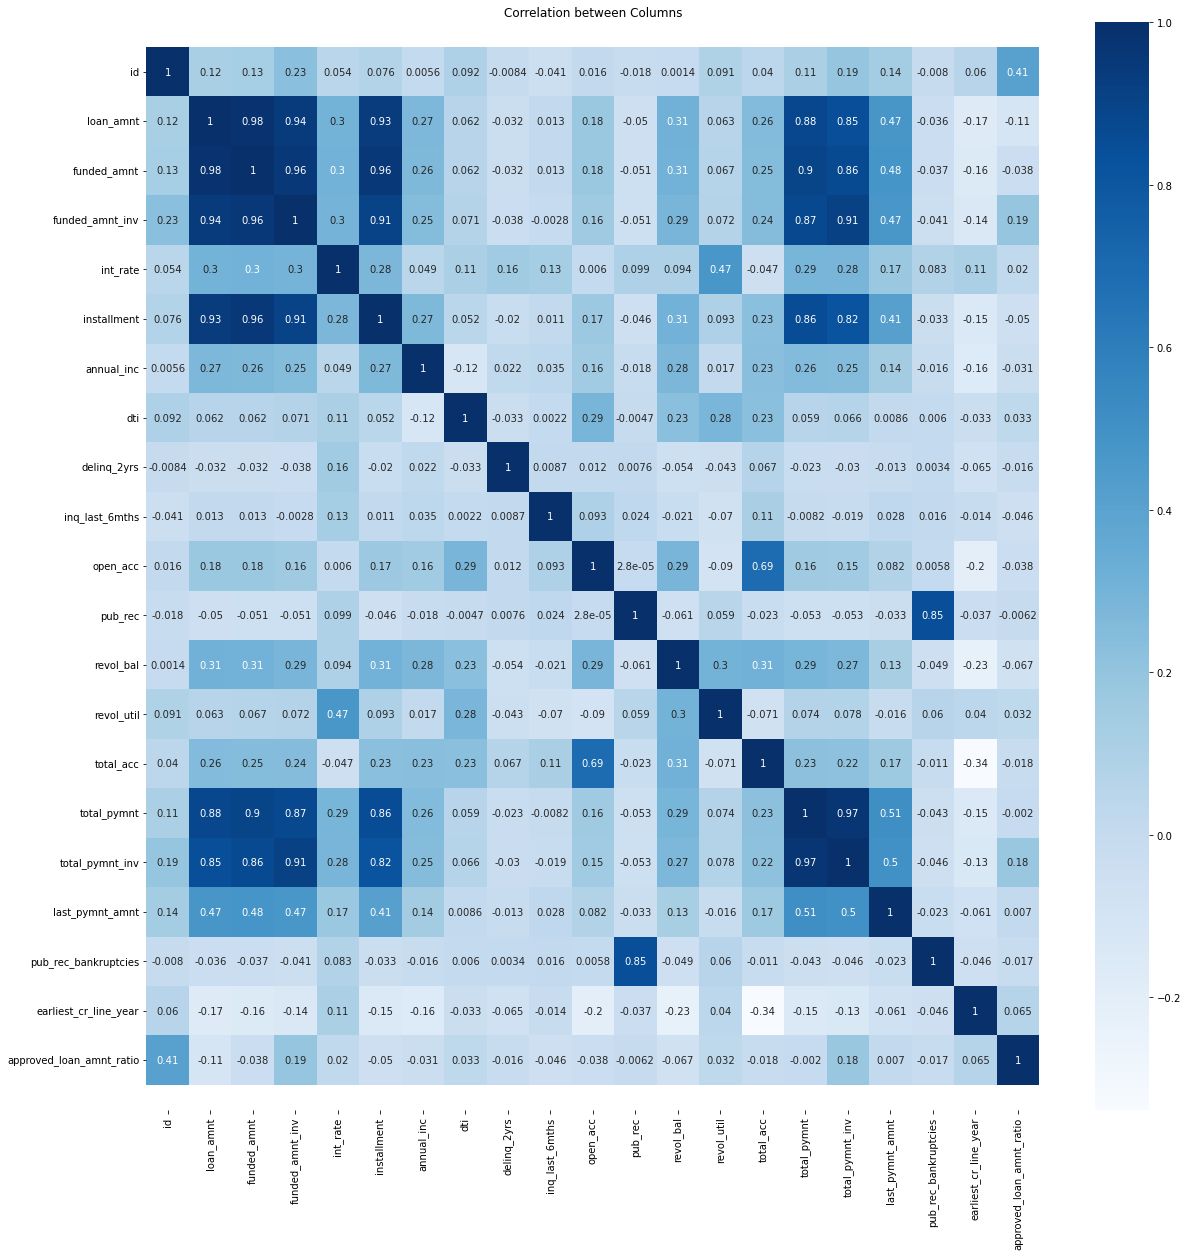

In [211]:
#Finding correlation matric
corr_matrix = data.corr()
plt.figure(figsize=(20,20))
#plotting correlatioon matric on a heat map
ax = sns.heatmap(corr_matrix, annot = True, cmap='Blues')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()

# Observations:

The public derogatory records colummn is highly (+ve) correlated with public bankruptcies records.
Interest rates are high for people with high revol utilisation.

In [212]:
corr_matrix

id  loan_amnt  funded_amnt  funded_amnt_inv  \
id                        1.00       0.12         0.13             0.23   
loan_amnt                 0.12       1.00         0.98             0.94   
funded_amnt               0.13       0.98         1.00             0.96   
funded_amnt_inv           0.23       0.94         0.96             1.00   
int_rate                  0.05       0.30         0.30             0.30   
installment               0.08       0.93         0.96             0.91   
annual_inc                0.01       0.27         0.26             0.25   
dti                       0.09       0.06         0.06             0.07   
delinq_2yrs              -0.01      -0.03        -0.03            -0.04   
inq_last_6mths           -0.04       0.01         0.01            -0.00   
open_acc                  0.02       0.18         0.18             0.16   
pub_rec                  -0.02      -0.05        -0.05            -0.05   
revol_bal                 0.00       0.31         0.31             0.29   
revol_util                0.09       0.06         0.07             0.07   
total_acc                 0.04       0.26         0.25             0.24   
total_pymnt               0.11       0.88         0.90             0.87   
total_pymnt_inv           0.19       0.85         0.86             0.91   
last_pymnt_amnt           0.14       0.47         0.48             0.47   
pub_rec_bankruptcies     -0.01      -0.04        -0.04            -0.04   
earliest_cr_line_year     0.06      -0.17        -0.16            -0.14   
approved_loan_amnt_ratio  0.41      -0.11        -0.04             0.19   

                          int_rate  installment  annual_inc   dti  \
id                            0.05         0.08        0.01  0.09   
loan_amnt                     0.30         0.93        0.27  0.06   
funded_amnt                   0.30         0.96        0.26  0.06   
funded_amnt_inv               0.30         0.91        0.25  0.07   
int_rate                      1.00         0.28        0.05  0.11   
installment                   0.28         1.00        0.27  0.05   
annual_inc                    0.05         0.27        1.00 -0.12   
dti                           0.11         0.05       -0.12  1.00   
delinq_2yrs                   0.16        -0.02        0.02 -0.03   
inq_last_6mths                0.13         0.01        0.04  0.00   
open_acc                      0.01         0.17        0.16  0.29   
pub_rec                       0.10        -0.05       -0.02 -0.00   
revol_bal                     0.09         0.31        0.28  0.23   
revol_util                    0.47         0.09        0.02  0.28   
total_acc                    -0.05         0.23        0.23  0.23   
total_pymnt                   0.29         0.86        0.26  0.06   
total_pymnt_inv               0.28         0.82        0.25  0.07   
last_pymnt_amnt               0.17         0.41        0.14  0.01   
pub_rec_bankruptcies          0.08        -0.03       -0.02  0.01   
earliest_cr_line_year         0.11        -0.15       -0.16 -0.03   
approved_loan_amnt_ratio      0.02        -0.05       -0.03  0.03   

                          delinq_2yrs  inq_last_6mths  open_acc  pub_rec  \
id                              -0.01           -0.04      0.02    -0.02   
loan_amnt                       -0.03            0.01      0.18    -0.05   
funded_amnt                     -0.03            0.01      0.18    -0.05   
funded_amnt_inv                 -0.04           -0.00      0.16    -0.05   
int_rate                         0.16            0.13      0.01     0.10   
installment                     -0.02            0.01      0.17    -0.05   
annual_inc                       0.02            0.04      0.16    -0.02   
dti                             -0.03            0.00      0.29    -0.00   
delinq_2yrs                      1.00            0.01      0.01     0.01   
inq_last_6mths                   0.01            1.00      0.09     0.02   
open_acc              